In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
train_df = pd.read_csv('./drive/MyDrive/open/train.csv')
test_df = pd.read_csv('./drive/MyDrive/open/test.csv')
import warnings
warnings.filterwarnings(action='ignore')

Mounted at /content/drive


In [ ]:
train_df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN
595,TRAIN_595,0,0.521289,2022-09-08 22:47,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_dfs = train_df[['PRODUCT_ID','Y_Class','Y_Quality']]
test_dfs=test_df['PRODUCT_ID'] #원래 CLASS와 QUALITY는 없었음

In [ ]:
test_df.insert(1,'Y_Quality',0)
test_df.insert(1,'Y_Class',0)


In [ ]:
len(test_df.columns)


2881

In [ ]:
len(train_df.columns)#맞춰줌

2881

In [ ]:
train_df.columns

Index(['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'TIMESTAMP', 'LINE',
       'PRODUCT_CODE', 'X_1', 'X_2', 'X_3', 'X_4',
       ...
       'X_2866', 'X_2867', 'X_2868', 'X_2869', 'X_2870', 'X_2871', 'X_2872',
       'X_2873', 'X_2874', 'X_2875'],
      dtype='object', length=2881)

In [ ]:
test_df.columns

Index(['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'TIMESTAMP', 'LINE',
       'PRODUCT_CODE', 'X_1', 'X_2', 'X_3', 'X_4',
       ...
       'X_2866', 'X_2867', 'X_2868', 'X_2869', 'X_2870', 'X_2871', 'X_2872',
       'X_2873', 'X_2874', 'X_2875'],
      dtype='object', length=2881)

In [ ]:
train_df['month'] = pd.to_datetime(train_df['TIMESTAMP']).dt.strftime('%m')
train_df=train_df.drop(columns=['TIMESTAMP'])
test_df['month'] = pd.to_datetime(test_df['TIMESTAMP']).dt.strftime('%m')
test_df=test_df.drop(columns=['TIMESTAMP'])
train_df['month']=train_df['month'].astype(int)
test_df['month']=test_df['month'].astype(int)

In [ ]:
groups_lines=train_df.groupby('LINE')
line=0
for name, group in groups_lines:
    line+=1
    globals()['group_line{}_df'.format(line)] = groups_lines.get_group(name)

#1번라인: T010305, 59개, A_31

In [ ]:
group_line1_df

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,...,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875,month
28,TRAIN_028,0,0.521249,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
33,TRAIN_033,1,0.526656,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
39,TRAIN_039,1,0.531583,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
40,TRAIN_040,1,0.530829,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
41,TRAIN_041,1,0.528270,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
48,TRAIN_048,1,0.533273,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
52,TRAIN_052,2,0.555514,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
57,TRAIN_057,2,0.535741,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
58,TRAIN_058,2,0.537122,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
59,TRAIN_059,2,0.536859,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [ ]:
non_null_counts_1 = group_line1_df.notnull().sum()
non_null_counts_1

PRODUCT_ID      59
Y_Class         59
Y_Quality       59
LINE            59
PRODUCT_CODE    59
                ..
X_2872           0
X_2873           0
X_2874           0
X_2875           0
month           59
Length: 2881, dtype: int64

In [ ]:
non_null_cols_1 = non_null_counts_1[non_null_counts_1 > 0].index.tolist()
non_null_cols_1#얘네는 하나라도 nan값이 아니라 값이 실제로 존재하는 칼럼들

['PRODUCT_ID',
 'Y_Class',
 'Y_Quality',
 'LINE',
 'PRODUCT_CODE',
 'X_246',
 'X_247',
 'X_248',
 'X_249',
 'X_250',
 'X_251',
 'X_252',
 'X_253',
 'X_254',
 'X_255',
 'X_256',
 'X_257',
 'X_258',
 'X_259',
 'X_260',
 'X_261',
 'X_262',
 'X_263',
 'X_264',
 'X_265',
 'X_266',
 'X_267',
 'X_268',
 'X_269',
 'X_270',
 'X_271',
 'X_272',
 'X_273',
 'X_274',
 'X_275',
 'X_276',
 'X_277',
 'X_278',
 'X_279',
 'X_280',
 'X_281',
 'X_282',
 'X_283',
 'X_284',
 'X_285',
 'X_286',
 'X_287',
 'X_288',
 'X_289',
 'X_290',
 'X_291',
 'X_292',
 'X_293',
 'X_294',
 'X_295',
 'X_296',
 'X_297',
 'X_298',
 'X_299',
 'X_300',
 'X_301',
 'X_302',
 'X_303',
 'X_304',
 'X_305',
 'X_306',
 'X_307',
 'X_308',
 'X_309',
 'X_310',
 'X_311',
 'X_312',
 'X_313',
 'X_314',
 'X_315',
 'X_316',
 'X_317',
 'X_318',
 'X_319',
 'X_320',
 'X_321',
 'X_322',
 'X_323',
 'X_324',
 'X_325',
 'X_326',
 'X_327',
 'X_328',
 'X_329',
 'X_330',
 'X_331',
 'X_332',
 'X_333',
 'X_334',
 'X_335',
 'X_336',
 'X_337',
 'X_338',
 'X

In [ ]:
len(non_null_cols_1)

892

In [ ]:
group_line1_df.loc[:,non_null_cols_1]

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_246,X_247,X_248,X_249,X_250,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,month
28,TRAIN_028,0,0.521249,T010305,A_31,1.0,89.0,0.0,45.0,11.0,...,186.8,182.758621,175.7,182.0,174.727586,160.5,446.0,429.716981,413.0,6
33,TRAIN_033,1,0.526656,T010305,A_31,1.0,95.0,0.0,45.0,11.0,...,195.0,184.365517,171.4,175.7,168.258621,158.3,446.0,429.301887,413.0,6
39,TRAIN_039,1,0.531583,T010305,A_31,1.0,95.0,0.0,45.0,11.0,...,198.2,173.068965,163.7,184.1,173.479310,165.8,447.0,427.867925,407.0,6
40,TRAIN_040,1,0.530829,T010305,A_31,1.0,95.0,0.0,45.0,11.0,...,192.0,180.396429,152.7,191.8,178.832143,168.6,446.0,428.403846,413.0,6
41,TRAIN_041,1,0.528270,T010305,A_31,1.0,87.0,0.0,45.0,11.0,...,183.6,172.751724,146.9,182.4,170.379310,162.9,446.0,429.094340,406.0,6
48,TRAIN_048,1,0.533273,T010305,A_31,1.0,91.0,0.0,45.0,11.0,...,208.6,194.879310,175.1,183.1,174.758621,160.6,446.0,428.000000,413.0,6
52,TRAIN_052,2,0.555514,T010305,A_31,2.0,87.0,0.0,45.0,11.0,...,191.0,184.613793,156.7,184.0,172.241379,164.7,445.0,428.679245,413.0,6
57,TRAIN_057,2,0.535741,T010305,A_31,2.0,87.0,0.0,45.0,11.0,...,217.9,204.203448,183.2,197.5,189.206897,181.8,437.0,418.660377,396.0,6
58,TRAIN_058,2,0.537122,T010305,A_31,1.0,88.0,0.0,45.0,11.0,...,218.0,202.289286,187.9,193.0,185.900000,181.0,436.0,418.807692,394.0,6
59,TRAIN_059,2,0.536859,T010305,A_31,2.0,88.0,0.0,45.0,11.0,...,209.0,198.242857,166.9,197.1,194.014286,188.6,436.0,419.134615,403.0,6


In [ ]:
grouped = group_line1_df.groupby(group_line1_df.isnull().apply(tuple, axis=1))
cnt=0
for name, group in grouped:
    cnt+=1
    globals()['line1_{}_df'.format(cnt)] = grouped.get_group(name)

In [ ]:
cnt#같은 라인 내에 서로 다른 설명변수 집합을 가지는 애들이 총 3개 있다~

3

In [ ]:
non_null_cols1_1 = line1_1_df.columns[line1_1_df.notnull().any()].tolist()
len(non_null_cols1_1) #이 그룹의 경우 거의 대다수의 non-null col들을 가진다. 1번 라인을 지나가는 제품들의 경우 총 892개의 non-null column 들을 가지는데, 이 경우 887개의 non-null columns들을 가진다

887

In [ ]:
len(non_null_cols_1)

892

In [ ]:
non_null_cols1_2 = line1_2_df.columns[line1_2_df.notnull().any()].tolist()
len(non_null_cols1_2)

882

In [ ]:
non_null_cols1_3 = line1_3_df.columns[line1_3_df.notnull().any()].tolist()

# print the resulting list of non-null columns
len(non_null_cols1_3)

877

In [ ]:
print('1번그룹에서의 설명변수 개수는 총', len(non_null_cols1_1))
print('2번그룹에서의 설명변수 개수는 총', len(non_null_cols1_2))
print('3번그룹에서의 설명변수 개수는 총', len(non_null_cols1_3))


1번그룹에서의 설명변수 개수는 총 887
2번그룹에서의 설명변수 개수는 총 882
3번그룹에서의 설명변수 개수는 총 877


In [ ]:
print('1번과 2번이 공유하는 변수들 개수(교집합)',len(list(set(non_null_cols1_1).intersection(non_null_cols1_2))))
print('1번과 2번이 공유하는 변수 합집합',len(list(set(non_null_cols1_1).union(non_null_cols1_2))))
print()
print('1번과 3번이 공유하는 변수들 개수(교집합)',len(list(set(non_null_cols1_1).intersection(non_null_cols1_3))))
print('1번과 3번이 공유하는 변수 합집합',len(list(set(non_null_cols1_1).union(non_null_cols1_3))))
print()
print('2번과 3번이 공유하는 변수들 개수(교집합)',len(list(set(non_null_cols1_2).intersection(non_null_cols1_3))))
print('2번과 3번이 공유하는 변수 합집합',len(list(set(non_null_cols1_2).union(non_null_cols1_3))))


1번과 2번이 공유하는 변수들 개수(교집합) 877
1번과 2번이 공유하는 변수 합집합 892

1번과 3번이 공유하는 변수들 개수(교집합) 877
1번과 3번이 공유하는 변수 합집합 887

2번과 3번이 공유하는 변수들 개수(교집합) 877
2번과 3번이 공유하는 변수 합집합 882


#2번 T010305, 70개, A_31

In [ ]:
non_null_counts_2 = group_line2_df.notnull().sum()

# select only those columns with non-null values
non_null_cols_2 = non_null_counts_2[non_null_counts_2 > 0].index.tolist()

# print the resulting list of non-null columns
print(non_null_cols_2)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_246', 'X_247', 'X_248', 'X_249', 'X_250', 'X_251', 'X_252', 'X_253', 'X_254', 'X_255', 'X_256', 'X_257', 'X_258', 'X_259', 'X_260', 'X_261', 'X_262', 'X_263', 'X_264', 'X_265', 'X_266', 'X_267', 'X_268', 'X_269', 'X_270', 'X_271', 'X_272', 'X_273', 'X_274', 'X_275', 'X_276', 'X_277', 'X_278', 'X_279', 'X_280', 'X_281', 'X_282', 'X_283', 'X_284', 'X_285', 'X_286', 'X_287', 'X_288', 'X_289', 'X_290', 'X_291', 'X_292', 'X_293', 'X_294', 'X_295', 'X_296', 'X_297', 'X_298', 'X_299', 'X_300', 'X_301', 'X_302', 'X_303', 'X_304', 'X_305', 'X_306', 'X_307', 'X_308', 'X_309', 'X_310', 'X_311', 'X_312', 'X_313', 'X_314', 'X_315', 'X_316', 'X_317', 'X_318', 'X_319', 'X_320', 'X_321', 'X_322', 'X_323', 'X_324', 'X_325', 'X_326', 'X_327', 'X_328', 'X_329', 'X_330', 'X_331', 'X_332', 'X_333', 'X_334', 'X_335', 'X_336', 'X_340', 'X_341', 'X_342', 'X_343', 'X_344', 'X_345', 'X_346', 'X_347', 'X_348', 'X_349', 'X_350', 'X_351', 'X_352', '

In [ ]:
len(non_null_cols_2)

892

In [ ]:
group_line2_df.loc[:,non_null_cols_2]

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_246,X_247,X_248,X_249,X_250,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,month
27,TRAIN_027,2,0.540002,T010306,A_31,1.0,87.0,144.0,45.0,12.0,...,186.2,169.907143,156.5,188.4,175.225000,159.9,446.0,430.442308,413.0,6
31,TRAIN_031,2,0.536206,T010306,A_31,4.0,93.0,150.0,45.0,12.0,...,207.8,191.775862,166.0,195.1,188.696552,181.7,446.0,429.245283,413.0,6
32,TRAIN_032,2,0.548592,T010306,A_31,1.0,89.0,152.0,45.0,12.0,...,190.7,181.686207,172.7,180.0,168.775862,154.1,446.0,429.981132,415.0,6
38,TRAIN_038,2,0.536616,T010306,A_31,2.0,91.0,158.0,45.0,11.0,...,200.3,187.339286,180.1,184.3,177.528571,166.6,446.0,426.250000,404.0,6
47,TRAIN_047,1,0.533230,T010306,A_31,1.0,95.0,166.0,45.0,11.0,...,203.7,188.434483,165.3,185.9,173.596552,157.2,447.0,429.905660,413.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,TRAIN_479,1,0.534716,T010306,A_31,1.0,93.0,107.0,45.0,11.0,...,222.6,193.278571,177.5,183.3,169.553571,154.2,456.0,438.132075,413.0,8
501,TRAIN_501,1,0.533079,T010306,A_31,2.0,95.0,124.0,45.0,11.0,...,211.1,197.392857,173.1,187.6,182.142857,175.1,466.0,445.307692,425.0,8
523,TRAIN_523,1,0.534640,T010306,A_31,1.0,89.0,136.0,45.0,12.0,...,205.1,194.860714,183.9,189.2,181.700000,172.7,466.0,444.615385,423.0,8
531,TRAIN_531,2,0.560317,T010306,A_31,1.0,90.0,142.0,45.0,11.0,...,201.3,190.407143,181.1,192.6,185.207143,173.2,466.0,446.038461,427.0,8


In [ ]:
grouped2 = group_line2_df.groupby(group_line2_df.isnull().apply(tuple, axis=1))
cnt=0
for name, group in grouped2:
    cnt+=1
    globals()['line2_{}_df'.format(cnt)] = grouped2.get_group(name)

In [ ]:
non_null_cols2_1 = line2_1_df.columns[line2_1_df.notnull().any()].tolist()

# print the resulting list of non-null columns
print(non_null_cols2_1)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_246', 'X_247', 'X_248', 'X_249', 'X_250', 'X_251', 'X_252', 'X_253', 'X_254', 'X_255', 'X_256', 'X_257', 'X_258', 'X_259', 'X_260', 'X_261', 'X_262', 'X_263', 'X_264', 'X_265', 'X_266', 'X_267', 'X_268', 'X_269', 'X_270', 'X_271', 'X_272', 'X_273', 'X_274', 'X_275', 'X_276', 'X_277', 'X_278', 'X_279', 'X_280', 'X_281', 'X_282', 'X_283', 'X_284', 'X_285', 'X_286', 'X_287', 'X_288', 'X_289', 'X_290', 'X_291', 'X_292', 'X_293', 'X_294', 'X_295', 'X_296', 'X_297', 'X_298', 'X_299', 'X_300', 'X_301', 'X_302', 'X_303', 'X_304', 'X_305', 'X_306', 'X_307', 'X_308', 'X_309', 'X_310', 'X_311', 'X_312', 'X_313', 'X_314', 'X_315', 'X_316', 'X_317', 'X_318', 'X_319', 'X_320', 'X_321', 'X_322', 'X_323', 'X_324', 'X_325', 'X_326', 'X_327', 'X_328', 'X_329', 'X_330', 'X_331', 'X_332', 'X_333', 'X_334', 'X_335', 'X_336', 'X_340', 'X_341', 'X_342', 'X_343', 'X_344', 'X_345', 'X_346', 'X_347', 'X_348', 'X_349', 'X_350', 'X_351', 'X_352', '

In [ ]:
len(non_null_cols2_1) #이 그룹의 경우 거의 대다수의 non-null col들을 가진다. 2번 라인을 지나가는 제품들의 경우 총 892개의 non-null column 들을 가지는데, 이 경우 887개의 non-null columns들을 가진다

892

In [ ]:
non_null_cols2_2 = line2_2_df.columns[line2_2_df.notnull().any()].tolist()

# print the resulting list of non-null columns
print(non_null_cols2_2)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_246', 'X_247', 'X_248', 'X_249', 'X_250', 'X_251', 'X_252', 'X_253', 'X_254', 'X_255', 'X_256', 'X_257', 'X_258', 'X_259', 'X_260', 'X_261', 'X_262', 'X_263', 'X_264', 'X_265', 'X_266', 'X_267', 'X_268', 'X_269', 'X_270', 'X_271', 'X_272', 'X_273', 'X_274', 'X_275', 'X_276', 'X_277', 'X_278', 'X_279', 'X_280', 'X_281', 'X_282', 'X_283', 'X_284', 'X_285', 'X_286', 'X_287', 'X_288', 'X_289', 'X_290', 'X_291', 'X_292', 'X_293', 'X_294', 'X_295', 'X_296', 'X_297', 'X_298', 'X_299', 'X_300', 'X_301', 'X_302', 'X_303', 'X_304', 'X_305', 'X_306', 'X_307', 'X_308', 'X_309', 'X_310', 'X_311', 'X_312', 'X_313', 'X_314', 'X_315', 'X_316', 'X_317', 'X_318', 'X_319', 'X_320', 'X_321', 'X_322', 'X_323', 'X_324', 'X_325', 'X_326', 'X_327', 'X_328', 'X_329', 'X_330', 'X_331', 'X_332', 'X_333', 'X_334', 'X_335', 'X_336', 'X_340', 'X_341', 'X_342', 'X_343', 'X_344', 'X_345', 'X_346', 'X_347', 'X_348', 'X_349', 'X_350', 'X_351', 'X_352', '

In [ ]:
len(non_null_cols2_2)

887

In [ ]:
non_null_cols2_3 = line2_3_df.columns[line2_3_df.notnull().any()].tolist()

# print the resulting list of non-null columns
len(non_null_cols2_3)

877

In [ ]:
len(non_null_cols1_3)

877

In [ ]:
non_null_cols2_3

['PRODUCT_ID',
 'Y_Class',
 'Y_Quality',
 'LINE',
 'PRODUCT_CODE',
 'X_246',
 'X_247',
 'X_248',
 'X_249',
 'X_250',
 'X_251',
 'X_252',
 'X_253',
 'X_254',
 'X_255',
 'X_256',
 'X_257',
 'X_258',
 'X_259',
 'X_260',
 'X_261',
 'X_262',
 'X_263',
 'X_264',
 'X_265',
 'X_266',
 'X_267',
 'X_268',
 'X_269',
 'X_270',
 'X_271',
 'X_272',
 'X_273',
 'X_274',
 'X_275',
 'X_276',
 'X_277',
 'X_278',
 'X_279',
 'X_280',
 'X_281',
 'X_282',
 'X_283',
 'X_284',
 'X_285',
 'X_286',
 'X_287',
 'X_288',
 'X_289',
 'X_290',
 'X_291',
 'X_292',
 'X_293',
 'X_294',
 'X_295',
 'X_296',
 'X_297',
 'X_298',
 'X_299',
 'X_300',
 'X_301',
 'X_302',
 'X_303',
 'X_304',
 'X_305',
 'X_306',
 'X_307',
 'X_308',
 'X_309',
 'X_310',
 'X_311',
 'X_312',
 'X_313',
 'X_314',
 'X_315',
 'X_316',
 'X_317',
 'X_318',
 'X_319',
 'X_320',
 'X_321',
 'X_322',
 'X_323',
 'X_324',
 'X_325',
 'X_326',
 'X_327',
 'X_328',
 'X_329',
 'X_330',
 'X_331',
 'X_332',
 'X_333',
 'X_334',
 'X_335',
 'X_336',
 'X_340',
 'X_341',
 'X

In [ ]:
non_null_cols1_3

['PRODUCT_ID',
 'Y_Class',
 'Y_Quality',
 'LINE',
 'PRODUCT_CODE',
 'X_246',
 'X_247',
 'X_248',
 'X_249',
 'X_250',
 'X_251',
 'X_252',
 'X_253',
 'X_254',
 'X_255',
 'X_256',
 'X_257',
 'X_258',
 'X_259',
 'X_260',
 'X_261',
 'X_262',
 'X_263',
 'X_264',
 'X_265',
 'X_266',
 'X_267',
 'X_268',
 'X_269',
 'X_270',
 'X_271',
 'X_272',
 'X_273',
 'X_274',
 'X_275',
 'X_276',
 'X_277',
 'X_278',
 'X_279',
 'X_280',
 'X_281',
 'X_282',
 'X_283',
 'X_284',
 'X_285',
 'X_286',
 'X_287',
 'X_288',
 'X_289',
 'X_290',
 'X_291',
 'X_292',
 'X_293',
 'X_294',
 'X_295',
 'X_296',
 'X_297',
 'X_298',
 'X_299',
 'X_300',
 'X_301',
 'X_302',
 'X_303',
 'X_304',
 'X_305',
 'X_306',
 'X_307',
 'X_308',
 'X_309',
 'X_310',
 'X_311',
 'X_312',
 'X_313',
 'X_314',
 'X_315',
 'X_316',
 'X_317',
 'X_318',
 'X_319',
 'X_320',
 'X_321',
 'X_322',
 'X_323',
 'X_324',
 'X_325',
 'X_326',
 'X_327',
 'X_328',
 'X_329',
 'X_330',
 'X_331',
 'X_332',
 'X_333',
 'X_334',
 'X_335',
 'X_336',
 'X_337',
 'X_338',
 'X

In [ ]:
len(list(set(non_null_cols2_3).intersection(non_null_cols1_3)))#877개로 같은데, 그중 869개의 변수가 일치함

869

In [ ]:
len(list(set(non_null_cols1_1).intersection(non_null_cols2_2)))

879

In [ ]:
len(list(set(non_null_cols1_1).intersection(non_null_cols2_3)))

869

In [ ]:
non_null_cols12 = list(set(non_null_cols1_1).intersection(non_null_cols2_3))
non_null_cols12

['X_1102',
 'X_273',
 'X_269',
 'X_1657',
 'X_969',
 'X_1069',
 'X_1664',
 'X_1588',
 'X_1445',
 'X_1144',
 'X_1347',
 'X_1566',
 'X_344',
 'X_982',
 'X_1552',
 'X_1045',
 'X_1109',
 'X_1116',
 'X_1614',
 'X_998',
 'X_1378',
 'X_1053',
 'X_1484',
 'X_1505',
 'X_951',
 'X_2865',
 'X_1119',
 'X_279',
 'X_1135',
 'X_1559',
 'X_1638',
 'X_1082',
 'X_1238',
 'X_1176',
 'X_1322',
 'X_984',
 'X_1327',
 'X_1658',
 'X_264',
 'X_1016',
 'X_1097',
 'X_1252',
 'X_1355',
 'X_940',
 'X_1585',
 'X_1436',
 'X_1449',
 'X_1478',
 'X_1640',
 'X_267',
 'X_308',
 'X_1509',
 'X_1317',
 'X_368',
 'X_314',
 'X_1298',
 'X_1437',
 'X_1193',
 'X_1599',
 'X_1328',
 'X_1596',
 'X_1672',
 'X_1497',
 'X_1215',
 'X_983',
 'X_1516',
 'X_959',
 'X_1528',
 'X_1090',
 'X_1506',
 'X_1460',
 'X_355',
 'X_1208',
 'X_967',
 'X_1020',
 'X_1125',
 'X_1173',
 'X_1546',
 'X_1374',
 'X_321',
 'X_254',
 'X_1465',
 'X_1678',
 'X_1700',
 'Y_Quality',
 'PRODUCT_ID',
 'X_1101',
 'X_1645',
 'X_1544',
 'X_1149',
 'X_1514',
 'X_1628',
 '

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.2 MB/s eta 0:00:00


In [ ]:
train_x = train_df[non_null_cols12]

test_x=test_df[non_null_cols12]
train_x

,X_1102,X_273,X_269,X_1657,X_969,X_1069,X_1664,X_1588,X_1445,X_1144,...,X_1503,X_297,X_2847,X_1414,X_1207,X_1371,X_1564,X_939,X_1029,X_263
0,383.0,NaN,NaN,10.1,1.0,191.0,12.900000,507.0,64.760870,0.0,...,0.0,NaN,47.0,10.561290,2.0,18.0,8.0,3.930968,2289.0,NaN
1,383.0,NaN,NaN,10.1,1.0,190.0,12.928125,507.0,65.021739,0.0,...,0.0,NaN,47.0,10.568750,3.0,12.0,8.0,3.921875,2291.0,NaN
2,383.0,NaN,NaN,9.9,1.0,191.0,13.003226,506.0,64.804348,0.0,...,0.0,NaN,47.0,10.600000,3.0,13.0,8.0,3.896774,2289.0,NaN
3,384.0,NaN,NaN,9.8,1.0,191.0,13.168750,507.0,64.695652,0.0,...,0.0,NaN,46.9,10.631250,3.0,14.0,0.0,3.856562,2290.0,NaN
4,383.0,NaN,NaN,9.6,1.0,191.0,12.806452,499.0,64.847826,0.0,...,0.0,NaN,47.0,10.441935,4.0,22.0,9.0,4.250968,2293.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,384.0,NaN,NaN,8.8,1.0,191.0,15.277419,506.0,64.304348,0.0,...,0.0,NaN,47.1,11.680645,4.0,18.0,9.0,4.035806,2319.0,NaN
595,383.0,NaN,NaN,9.0,1.0,191.0,14.822581,507.0,64.617021,0.0,...,0.0,NaN,47.1,11.377419,3.0,10.0,9.0,4.260968,2315.0,NaN
596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_x12 = train_x[train_x['LINE'].isin(['T010305','T010306'])]
train_x12

,X_1102,X_273,X_269,X_1657,X_969,X_1069,X_1664,X_1588,X_1445,X_1144,...,X_1503,X_297,X_2847,X_1414,X_1207,X_1371,X_1564,X_939,X_1029,X_263
27,446.0,149.0,0.20,0.0,1.0,320.0,1.348387,50.0,74.955556,53.0,...,0.0,80.8,2.5,9.841935,17.0,19.0,4.0,0.470000,2399.0,246.7
28,446.0,150.0,0.20,0.0,1.0,319.0,1.370968,50.0,74.822222,52.0,...,0.0,74.2,2.4,9.825806,22.0,10.0,0.0,0.470000,2397.0,246.2
31,446.0,150.0,0.20,0.0,1.0,319.0,1.374194,48.0,75.977778,50.0,...,0.0,80.8,2.4,9.909677,23.0,12.0,4.0,0.470000,2411.0,246.2
32,446.0,149.0,0.20,0.0,1.0,318.0,1.364516,50.0,75.688889,50.0,...,0.0,80.8,2.4,9.919355,27.0,15.0,4.0,0.470000,2403.0,245.9
33,446.0,149.0,0.20,0.0,1.0,320.0,1.361290,50.0,76.333333,54.0,...,0.0,74.2,2.5,9.800000,25.0,12.0,0.0,0.470000,2418.0,246.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,466.0,149.0,0.20,0.0,1.0,321.0,1.390625,51.0,77.622222,45.0,...,0.0,80.3,2.5,9.993750,16.0,12.0,4.0,0.550312,2422.0,245.9
553,466.0,149.0,0.21,0.0,1.0,320.0,1.393548,50.0,76.800000,44.0,...,0.0,74.2,2.5,10.048387,25.0,13.0,0.0,0.551613,2425.0,246.6
554,465.0,149.0,0.21,0.0,1.0,320.0,1.371875,48.0,76.733333,45.0,...,0.0,74.2,2.4,9.843750,18.0,15.0,3.0,0.569375,2417.0,246.4
584,466.0,149.0,0.20,0.0,1.0,318.0,1.362500,51.0,76.911111,42.0,...,0.0,74.2,2.5,9.896875,17.0,11.0,3.0,0.566875,2422.0,246.6


In [ ]:
train_x12['month']

27     6
28     6
31     6
32     6
33     6
      ..
531    8
553    8
554    8
584    9
585    9
Name: month, Length: 129, dtype: int64

In [ ]:
non_null_cols12.remove('PRODUCT_ID')

In [ ]:
non_null_cols12

['X_1102',
 'X_273',
 'X_269',
 'X_1657',
 'X_969',
 'X_1069',
 'X_1664',
 'X_1588',
 'X_1445',
 'X_1144',
 'X_1347',
 'X_1566',
 'X_344',
 'X_982',
 'X_1552',
 'X_1045',
 'X_1109',
 'X_1116',
 'X_1614',
 'X_998',
 'X_1378',
 'X_1053',
 'X_1484',
 'X_1505',
 'X_951',
 'X_2865',
 'X_1119',
 'X_279',
 'X_1135',
 'X_1559',
 'X_1638',
 'X_1082',
 'X_1238',
 'X_1176',
 'X_1322',
 'X_984',
 'X_1327',
 'X_1658',
 'X_264',
 'X_1016',
 'X_1097',
 'X_1252',
 'X_1355',
 'X_940',
 'X_1585',
 'X_1436',
 'X_1449',
 'X_1478',
 'X_1640',
 'X_267',
 'X_308',
 'X_1509',
 'X_1317',
 'X_368',
 'X_314',
 'X_1298',
 'X_1437',
 'X_1193',
 'X_1599',
 'X_1328',
 'X_1596',
 'X_1672',
 'X_1497',
 'X_1215',
 'X_983',
 'X_1516',
 'X_959',
 'X_1528',
 'X_1090',
 'X_1506',
 'X_1460',
 'X_355',
 'X_1208',
 'X_967',
 'X_1020',
 'X_1125',
 'X_1173',
 'X_1546',
 'X_1374',
 'X_321',
 'X_254',
 'X_1465',
 'X_1678',
 'X_1700',
 'Y_Quality',
 'X_1101',
 'X_1645',
 'X_1544',
 'X_1149',
 'X_1514',
 'X_1628',
 'X_2863',
 'X_20

In [ ]:
from sklearn.model_selection import train_test_split
x_train12, x_val12= train_test_split(train_x12[non_null_cols12], test_size=0.2,random_state=37,stratify=train_x12['Y_Class'])
x_val12

,X_1102,X_273,X_269,X_1657,X_969,X_1069,X_1664,X_1588,X_1445,X_1144,...,X_1503,X_297,X_2847,X_1414,X_1207,X_1371,X_1564,X_939,X_1029,X_263
179,466.0,149.0,0.21,0.0,1.0,321.0,1.370968,49.0,77.155556,55.0,...,0.0,74.2,2.5,9.851613,22.0,26.0,4.0,0.542903,2424.0,246.7
584,466.0,149.0,0.20,0.0,1.0,318.0,1.362500,51.0,76.911111,42.0,...,0.0,74.2,2.5,9.896875,17.0,11.0,3.0,0.566875,2422.0,246.6
31,446.0,150.0,0.20,0.0,1.0,319.0,1.374194,48.0,75.977778,50.0,...,0.0,80.8,2.4,9.909677,23.0,12.0,4.0,0.470000,2411.0,246.2
436,466.0,149.0,0.21,0.0,1.0,320.0,1.374194,50.0,77.155556,43.0,...,0.0,74.2,2.4,9.951613,18.0,13.0,3.0,0.500000,2427.0,246.4
390,456.0,150.0,0.20,0.0,1.0,317.0,1.338710,49.0,77.355556,45.0,...,0.0,80.9,2.3,9.838710,22.0,16.0,2.0,0.500000,2425.0,246.4
40,446.0,149.0,0.20,0.0,1.0,319.0,1.387097,50.0,75.409091,51.0,...,0.0,74.2,2.3,9.961290,20.0,19.0,4.0,0.500000,2401.0,246.6
219,466.0,149.0,0.20,0.0,1.0,320.0,1.341935,49.0,76.288889,43.0,...,0.0,81.6,2.3,9.900000,16.0,14.0,5.0,0.545806,2419.0,245.7
72,466.0,149.0,0.20,0.0,1.0,321.0,1.358065,49.0,75.266667,53.0,...,0.0,80.8,2.4,9.767742,19.0,11.0,4.0,0.502258,2406.0,245.8
311,466.0,150.0,0.20,0.0,1.0,319.0,1.354839,48.0,77.377778,44.0,...,0.0,80.9,2.5,9.793548,13.0,15.0,4.0,0.500000,2434.0,245.8
178,456.0,150.0,0.20,0.0,1.0,318.0,1.387097,50.0,78.333333,48.0,...,0.0,80.7,2.3,9.993548,14.0,14.0,4.0,0.539677,2422.0,245.8


In [ ]:
x_val12['Y_Quality']

179    0.526741
584    0.519519
31     0.536206
436    0.526241
390    0.530940
40     0.530829
219    0.535394
72     0.538095
311    0.530606
178    0.538502
140    0.531997
333    0.524487
293    0.535279
223    0.529808
41     0.528270
54     0.545925
299    0.536951
145    0.525859
139    0.533122
491    0.524808
224    0.528687
76     0.527735
95     0.536041
102    0.531062
404    0.500856
91     0.529202
Name: Y_Quality, dtype: float64

In [ ]:
x_train12, x_val12= train_test_split(x_train12, test_size=0.2,random_state=37)
yy_train12 = x_train12['Y_Class']
y_train12 = x_train12['Y_Quality']
x_train12 = x_train12.drop(columns=['Y_Quality','Y_Class'])

yy_val12 = x_val12['Y_Class']
y_val12 = x_val12['Y_Quality']
x_val12 = x_val12.drop(columns=['Y_Quality','Y_Class'])

In [ ]:
x_train12

,X_1102,X_273,X_269,X_1657,X_969,X_1069,X_1664,X_1588,X_1445,X_1144,...,X_1503,X_297,X_2847,X_1414,X_1207,X_1371,X_1564,X_939,X_1029,X_263
456,456.0,150.0,0.21,0.0,1.0,318.0,1.351613,49.0,77.409091,46.0,...,0.0,74.2,2.5,9.870968,18.0,14.0,3.0,0.500000,2422.0,246.4
501,466.0,149.0,0.20,0.0,1.0,320.0,1.390625,50.0,78.088889,46.0,...,0.0,80.9,2.5,9.812500,16.0,13.0,4.0,0.501250,2425.0,246.0
554,465.0,149.0,0.21,0.0,1.0,320.0,1.371875,48.0,76.733333,45.0,...,0.0,74.2,2.4,9.843750,18.0,15.0,3.0,0.569375,2417.0,246.4
48,446.0,149.0,0.20,0.0,1.0,320.0,1.383871,49.0,75.911111,53.0,...,0.0,74.2,2.4,10.061290,18.0,15.0,4.0,0.491613,2399.0,246.4
220,466.0,149.0,0.20,0.0,1.0,319.0,1.341935,49.0,76.955556,46.0,...,0.0,74.2,2.5,9.751613,16.0,13.0,4.0,0.557419,2425.0,246.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,437.0,149.0,0.20,0.0,1.0,320.0,1.403226,48.0,74.866667,50.0,...,0.0,74.4,2.3,10.222581,19.0,15.0,4.0,0.490000,2398.0,246.4
341,466.0,149.0,0.20,0.0,1.0,320.0,1.364516,49.0,77.931818,44.0,...,0.0,80.9,2.4,9.932258,14.0,12.0,0.0,0.500000,2440.0,245.7
84,466.0,150.0,0.20,0.0,1.0,319.0,1.383871,49.0,77.333333,53.0,...,0.0,74.4,2.5,9.916129,18.0,15.0,4.0,0.500000,2439.0,246.4
523,466.0,149.0,0.20,0.0,1.0,319.0,1.367742,50.0,76.822222,45.0,...,0.0,80.9,2.4,10.025806,24.0,12.0,1.0,0.555806,2417.0,245.7


In [ ]:
import catboost
clf12 = catboost.CatBoostRegressor(learning_rate=0.05, iterations=500, verbose=0)
clf12.fit(x_train12, y_train12, early_stopping_rounds=100, cat_features=['PRODUCT_CODE', 'LINE'])


In [ ]:
a = train_df[['Y_Class','Y_Quality']].groupby('Y_Class').agg(['mean', 'min', 'max', 'count'])
a

Y_Quality                          
             mean       min       max count
Y_Class                                    
0        0.520837  0.500856  0.525067    88
1        0.530253  0.525086  0.534843   407
2        0.542031  0.534951  0.578841   103

In [ ]:
from sklearn.metrics import f1_score

pre_preds = clf12.predict(x_val12)
print(clf12.score(x_val12,y_val12))

preds=[]
for p in pre_preds:
  if p<=a[('Y_Quality','max')][0]:
    preds.append(0)
  elif p<=a[('Y_Quality','min')][2]:
    preds.append(1)
  else:
    preds.append(2)
print(f1_score(yy_val12, preds, average='macro' ))

0.7246382970317085
0.6980842911877394


##TEST

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
train_x = train_df[non_null_cols12]
train_x122 = train_x[train_x['LINE'].isin(['T010305','T010306'])]
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

#결측대체
mode_list=[]
for c in train_x122.columns[~train_x122.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]:
  mode_list.append(train_x122[c].median())
for i,c in enumerate(train_x122.columns[~train_x122.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]):
  train_x122[c].fillna(mode_list[i],inplace=True)

yy_train122 = train_x122['Y_Class']
train_x122 = train_x122.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x122, yy_train122))):
    x_trn, x_val, y_trn, y_val = train_x122.iloc[train_index], train_x122.iloc[val_index], yy_train122.iloc[train_index], yy_train122.iloc[val_index]

    lgb = LGBMClassifier(verbose=0) # cpu -> thread_count=5
    lgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, lgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

0it [00:00, ?it/s]

[1]	training's multi_logloss: 0.916472	valid_1's multi_logloss: 0.983866
Training until validation scores don't improve for 100 rounds.
[2]	training's multi_logloss: 0.876835	valid_1's multi_logloss: 0.981817
[3]	training's multi_logloss: 0.842883	valid_1's multi_logloss: 0.983706
[4]	training's multi_logloss: 0.809113	valid_1's multi_logloss: 0.985473
[5]	training's multi_logloss: 0.778496	valid_1's multi_logloss: 0.988858
[6]	training's multi_logloss: 0.750839	valid_1's multi_logloss: 0.993832
[7]	training's multi_logloss: 0.727262	valid_1's multi_logloss: 0.996187
[8]	training's multi_logloss: 0.701469	valid_1's multi_logloss: 0.995727
[9]	training's multi_logloss: 0.677867	valid_1's multi_logloss: 0.99473
[10]	training's multi_logloss: 0.650523	valid_1's multi_logloss: 0.97099
[11]	training's multi_logloss: 0.626026	valid_1's multi_logloss: 0.978416
[12]	training's multi_logloss: 0.597872	valid_1's multi_logloss: 0.982266
[13]	training's multi_logloss: 0.573117	valid_1's multi_logl

1it [00:01,  1.90s/it]

[1]	training's multi_logloss: 0.920067	valid_1's multi_logloss: 0.962818
Training until validation scores don't improve for 100 rounds.
[2]	training's multi_logloss: 0.872488	valid_1's multi_logloss: 0.959553
[3]	training's multi_logloss: 0.836782	valid_1's multi_logloss: 0.931445
[4]	training's multi_logloss: 0.791831	valid_1's multi_logloss: 0.928444
[5]	training's multi_logloss: 0.749654	valid_1's multi_logloss: 0.926522
[6]	training's multi_logloss: 0.717193	valid_1's multi_logloss: 0.91233
[7]	training's multi_logloss: 0.682513	valid_1's multi_logloss: 0.917444
[8]	training's multi_logloss: 0.655492	valid_1's multi_logloss: 0.908126
[9]	training's multi_logloss: 0.62952	valid_1's multi_logloss: 0.899353
[10]	training's multi_logloss: 0.60327	valid_1's multi_logloss: 0.89986
[11]	training's multi_logloss: 0.577639	valid_1's multi_logloss: 0.906042
[12]	training's multi_logloss: 0.560537	valid_1's multi_logloss: 0.897284
[13]	training's multi_logloss: 0.538379	valid_1's multi_loglos

2it [00:03,  1.58s/it]

[95]	training's multi_logloss: 0.0311296	valid_1's multi_logloss: 1.1998
[96]	training's multi_logloss: 0.0302278	valid_1's multi_logloss: 1.2035
[97]	training's multi_logloss: 0.0292997	valid_1's multi_logloss: 1.20666
[98]	training's multi_logloss: 0.0283554	valid_1's multi_logloss: 1.20995
[99]	training's multi_logloss: 0.027522	valid_1's multi_logloss: 1.21711
[100]	training's multi_logloss: 0.0266585	valid_1's multi_logloss: 1.21412
Did not meet early stopping. Best iteration is:
[100]	training's multi_logloss: 0.0266585	valid_1's multi_logloss: 1.21412
[1]	training's multi_logloss: 0.929751	valid_1's multi_logloss: 0.927498
Training until validation scores don't improve for 100 rounds.
[2]	training's multi_logloss: 0.891078	valid_1's multi_logloss: 0.898653
[3]	training's multi_logloss: 0.847208	valid_1's multi_logloss: 0.888883
[4]	training's multi_logloss: 0.806572	valid_1's multi_logloss: 0.886834
[5]	training's multi_logloss: 0.77833	valid_1's multi_logloss: 0.86647
[6]	train

3it [00:04,  1.25s/it]

[92]	training's multi_logloss: 0.0392979	valid_1's multi_logloss: 0.938555
[93]	training's multi_logloss: 0.0380723	valid_1's multi_logloss: 0.943158
[94]	training's multi_logloss: 0.0371141	valid_1's multi_logloss: 0.941525
[95]	training's multi_logloss: 0.0359525	valid_1's multi_logloss: 0.945624
[96]	training's multi_logloss: 0.0349006	valid_1's multi_logloss: 0.955415
[97]	training's multi_logloss: 0.0338308	valid_1's multi_logloss: 0.961949
[98]	training's multi_logloss: 0.0327369	valid_1's multi_logloss: 0.960987
[99]	training's multi_logloss: 0.0317126	valid_1's multi_logloss: 0.969199
[100]	training's multi_logloss: 0.0307763	valid_1's multi_logloss: 0.965108
Did not meet early stopping. Best iteration is:
[100]	training's multi_logloss: 0.0307763	valid_1's multi_logloss: 0.965108
[1]	training's multi_logloss: 0.929176	valid_1's multi_logloss: 0.934566
Training until validation scores don't improve for 100 rounds.
[2]	training's multi_logloss: 0.892934	valid_1's multi_logloss: 

4it [00:05,  1.16s/it]

[93]	training's multi_logloss: 0.0335997	valid_1's multi_logloss: 0.907788
[94]	training's multi_logloss: 0.0325405	valid_1's multi_logloss: 0.912004
[95]	training's multi_logloss: 0.0315484	valid_1's multi_logloss: 0.920411
[96]	training's multi_logloss: 0.0307219	valid_1's multi_logloss: 0.92945
[97]	training's multi_logloss: 0.0296981	valid_1's multi_logloss: 0.934169
[98]	training's multi_logloss: 0.0288177	valid_1's multi_logloss: 0.933881
[99]	training's multi_logloss: 0.0281181	valid_1's multi_logloss: 0.937512
[100]	training's multi_logloss: 0.0272759	valid_1's multi_logloss: 0.939665
Did not meet early stopping. Best iteration is:
[100]	training's multi_logloss: 0.0272759	valid_1's multi_logloss: 0.939665
[1]	training's multi_logloss: 0.909503	valid_1's multi_logloss: 0.981313
Training until validation scores don't improve for 100 rounds.
[2]	training's multi_logloss: 0.859216	valid_1's multi_logloss: 0.991321
[3]	training's multi_logloss: 0.816123	valid_1's multi_logloss: 1.0

5it [00:06,  1.11s/it]

[96]	training's multi_logloss: 0.0277972	valid_1's multi_logloss: 1.4599
[97]	training's multi_logloss: 0.0268682	valid_1's multi_logloss: 1.46633
[98]	training's multi_logloss: 0.0259366	valid_1's multi_logloss: 1.47587
[99]	training's multi_logloss: 0.0250545	valid_1's multi_logloss: 1.48097
[100]	training's multi_logloss: 0.024209	valid_1's multi_logloss: 1.47733
Did not meet early stopping. Best iteration is:
[100]	training's multi_logloss: 0.024209	valid_1's multi_logloss: 1.47733
[1]	training's multi_logloss: 0.919164	valid_1's multi_logloss: 0.968268
Training until validation scores don't improve for 100 rounds.
[2]	training's multi_logloss: 0.881951	valid_1's multi_logloss: 0.942861
[3]	training's multi_logloss: 0.844668	valid_1's multi_logloss: 0.930549
[4]	training's multi_logloss: 0.81183	valid_1's multi_logloss: 0.906726
[5]	training's multi_logloss: 0.77527	valid_1's multi_logloss: 0.900081
[6]	training's multi_logloss: 0.746406	valid_1's multi_logloss: 0.892942
[7]	traini

6it [00:06,  1.02s/it]

[86]	training's multi_logloss: 0.0477641	valid_1's multi_logloss: 1.29677
[87]	training's multi_logloss: 0.0462338	valid_1's multi_logloss: 1.30949
[88]	training's multi_logloss: 0.0448059	valid_1's multi_logloss: 1.30859
[89]	training's multi_logloss: 0.043783	valid_1's multi_logloss: 1.31761
[90]	training's multi_logloss: 0.0424522	valid_1's multi_logloss: 1.31634
[91]	training's multi_logloss: 0.0410032	valid_1's multi_logloss: 1.32584
[92]	training's multi_logloss: 0.0398948	valid_1's multi_logloss: 1.32649
[93]	training's multi_logloss: 0.0385412	valid_1's multi_logloss: 1.33817
[94]	training's multi_logloss: 0.0374181	valid_1's multi_logloss: 1.34532
[95]	training's multi_logloss: 0.0362036	valid_1's multi_logloss: 1.35781
[96]	training's multi_logloss: 0.0352224	valid_1's multi_logloss: 1.35921
[97]	training's multi_logloss: 0.0341022	valid_1's multi_logloss: 1.37027
[98]	training's multi_logloss: 0.0329872	valid_1's multi_logloss: 1.37766
[99]	training's multi_logloss: 0.031988

7it [00:07,  1.12it/s]

[90]	training's multi_logloss: 0.0467159	valid_1's multi_logloss: 0.9319
[91]	training's multi_logloss: 0.0451234	valid_1's multi_logloss: 0.932861
[92]	training's multi_logloss: 0.043533	valid_1's multi_logloss: 0.92525
[93]	training's multi_logloss: 0.0423495	valid_1's multi_logloss: 0.92558
[94]	training's multi_logloss: 0.0411155	valid_1's multi_logloss: 0.928848
[95]	training's multi_logloss: 0.040049	valid_1's multi_logloss: 0.932821
[96]	training's multi_logloss: 0.0389245	valid_1's multi_logloss: 0.931687
[97]	training's multi_logloss: 0.0376675	valid_1's multi_logloss: 0.927461
[98]	training's multi_logloss: 0.0364763	valid_1's multi_logloss: 0.935398
[99]	training's multi_logloss: 0.0354366	valid_1's multi_logloss: 0.940689
[100]	training's multi_logloss: 0.0343506	valid_1's multi_logloss: 0.951085
Did not meet early stopping. Best iteration is:
[100]	training's multi_logloss: 0.0343506	valid_1's multi_logloss: 0.951085
[1]	training's multi_logloss: 0.92377	valid_1's multi_lo

8it [00:08,  1.17it/s]

[95]	training's multi_logloss: 0.0264418	valid_1's multi_logloss: 1.66739
[96]	training's multi_logloss: 0.0256564	valid_1's multi_logloss: 1.66748
[97]	training's multi_logloss: 0.0247443	valid_1's multi_logloss: 1.6773
[98]	training's multi_logloss: 0.023873	valid_1's multi_logloss: 1.69248
[99]	training's multi_logloss: 0.0229814	valid_1's multi_logloss: 1.70321
[100]	training's multi_logloss: 0.0223778	valid_1's multi_logloss: 1.70803
Did not meet early stopping. Best iteration is:
[100]	training's multi_logloss: 0.0223778	valid_1's multi_logloss: 1.70803
[1]	training's multi_logloss: 0.927687	valid_1's multi_logloss: 0.927103
Training until validation scores don't improve for 100 rounds.
[2]	training's multi_logloss: 0.88902	valid_1's multi_logloss: 0.903481
[3]	training's multi_logloss: 0.855259	valid_1's multi_logloss: 0.88676
[4]	training's multi_logloss: 0.818853	valid_1's multi_logloss: 0.876153
[5]	training's multi_logloss: 0.788748	valid_1's multi_logloss: 0.863956
[6]	trai

9it [00:09,  1.19it/s]

[98]	training's multi_logloss: 0.0334971	valid_1's multi_logloss: 0.825349
[99]	training's multi_logloss: 0.0324317	valid_1's multi_logloss: 0.824162
[100]	training's multi_logloss: 0.0314051	valid_1's multi_logloss: 0.827091
Did not meet early stopping. Best iteration is:
[100]	training's multi_logloss: 0.0314051	valid_1's multi_logloss: 0.827091
[1]	training's multi_logloss: 0.926136	valid_1's multi_logloss: 0.939348
Training until validation scores don't improve for 100 rounds.
[2]	training's multi_logloss: 0.888531	valid_1's multi_logloss: 0.906616
[3]	training's multi_logloss: 0.852988	valid_1's multi_logloss: 0.884326
[4]	training's multi_logloss: 0.82013	valid_1's multi_logloss: 0.858558
[5]	training's multi_logloss: 0.790361	valid_1's multi_logloss: 0.848412
[6]	training's multi_logloss: 0.759138	valid_1's multi_logloss: 0.842948
[7]	training's multi_logloss: 0.734461	valid_1's multi_logloss: 0.823211
[8]	training's multi_logloss: 0.703728	valid_1's multi_logloss: 0.817309
[9]	

10it [00:10,  1.21it/s]

[1]	training's multi_logloss: 0.916492	valid_1's multi_logloss: 0.950651
Training until validation scores don't improve for 100 rounds.
[2]	training's multi_logloss: 0.875366	valid_1's multi_logloss: 0.920989
[3]	training's multi_logloss: 0.841847	valid_1's multi_logloss: 0.90419
[4]	training's multi_logloss: 0.805735	valid_1's multi_logloss: 0.895332
[5]	training's multi_logloss: 0.776278	valid_1's multi_logloss: 0.876571
[6]	training's multi_logloss: 0.746723	valid_1's multi_logloss: 0.873376
[7]	training's multi_logloss: 0.718566	valid_1's multi_logloss: 0.868531
[8]	training's multi_logloss: 0.689701	valid_1's multi_logloss: 0.863495
[9]	training's multi_logloss: 0.665397	valid_1's multi_logloss: 0.854688
[10]	training's multi_logloss: 0.640962	valid_1's multi_logloss: 0.846148
[11]	training's multi_logloss: 0.619775	valid_1's multi_logloss: 0.836824
[12]	training's multi_logloss: 0.59549	valid_1's multi_logloss: 0.839207
[13]	training's multi_logloss: 0.576678	valid_1's multi_logl

11it [00:10,  1.23it/s]

[92]	training's multi_logloss: 0.0411545	valid_1's multi_logloss: 0.965728
[93]	training's multi_logloss: 0.0399117	valid_1's multi_logloss: 0.970536
[94]	training's multi_logloss: 0.0386619	valid_1's multi_logloss: 0.981181
[95]	training's multi_logloss: 0.0373537	valid_1's multi_logloss: 0.990497
[96]	training's multi_logloss: 0.0361638	valid_1's multi_logloss: 0.999858
[97]	training's multi_logloss: 0.035104	valid_1's multi_logloss: 1.00426
[98]	training's multi_logloss: 0.0340068	valid_1's multi_logloss: 1.00647
[99]	training's multi_logloss: 0.0329655	valid_1's multi_logloss: 1.00899
[100]	training's multi_logloss: 0.0318876	valid_1's multi_logloss: 1.00801
Did not meet early stopping. Best iteration is:
[100]	training's multi_logloss: 0.0318876	valid_1's multi_logloss: 1.00801
[1]	training's multi_logloss: 0.920585	valid_1's multi_logloss: 0.964604
Training until validation scores don't improve for 100 rounds.
[2]	training's multi_logloss: 0.882737	valid_1's multi_logloss: 0.9436

12it [00:11,  1.26it/s]

[1]	training's multi_logloss: 0.929977	valid_1's multi_logloss: 0.927299
Training until validation scores don't improve for 100 rounds.
[2]	training's multi_logloss: 0.887771	valid_1's multi_logloss: 0.91457
[3]	training's multi_logloss: 0.842766	valid_1's multi_logloss: 0.915246
[4]	training's multi_logloss: 0.806403	valid_1's multi_logloss: 0.910023
[5]	training's multi_logloss: 0.774567	valid_1's multi_logloss: 0.915953
[6]	training's multi_logloss: 0.744188	valid_1's multi_logloss: 0.902795
[7]	training's multi_logloss: 0.71586	valid_1's multi_logloss: 0.886381
[8]	training's multi_logloss: 0.686501	valid_1's multi_logloss: 0.896933
[9]	training's multi_logloss: 0.658649	valid_1's multi_logloss: 0.893224
[10]	training's multi_logloss: 0.635712	valid_1's multi_logloss: 0.877846
[11]	training's multi_logloss: 0.609692	valid_1's multi_logloss: 0.865861
[12]	training's multi_logloss: 0.587628	valid_1's multi_logloss: 0.850195
[13]	training's multi_logloss: 0.564788	valid_1's multi_logl

13it [00:12,  1.24it/s]

[85]	training's multi_logloss: 0.045677	valid_1's multi_logloss: 0.780948
[86]	training's multi_logloss: 0.0442527	valid_1's multi_logloss: 0.783087
[87]	training's multi_logloss: 0.0428967	valid_1's multi_logloss: 0.778748
[88]	training's multi_logloss: 0.0416697	valid_1's multi_logloss: 0.773536
[89]	training's multi_logloss: 0.0402905	valid_1's multi_logloss: 0.783432
[90]	training's multi_logloss: 0.0389017	valid_1's multi_logloss: 0.771776
[91]	training's multi_logloss: 0.0377451	valid_1's multi_logloss: 0.76759
[92]	training's multi_logloss: 0.0365626	valid_1's multi_logloss: 0.773436
[93]	training's multi_logloss: 0.0354878	valid_1's multi_logloss: 0.775855
[94]	training's multi_logloss: 0.034458	valid_1's multi_logloss: 0.77167
[95]	training's multi_logloss: 0.033527	valid_1's multi_logloss: 0.773443
[96]	training's multi_logloss: 0.0324219	valid_1's multi_logloss: 0.776812
[97]	training's multi_logloss: 0.0316279	valid_1's multi_logloss: 0.774742
[98]	training's multi_logloss:

14it [00:13,  1.33it/s]

[77]	training's multi_logloss: 0.0660743	valid_1's multi_logloss: 1.13474
[78]	training's multi_logloss: 0.0639919	valid_1's multi_logloss: 1.13777
[79]	training's multi_logloss: 0.0623241	valid_1's multi_logloss: 1.15034
[80]	training's multi_logloss: 0.0603934	valid_1's multi_logloss: 1.15559
[81]	training's multi_logloss: 0.0585331	valid_1's multi_logloss: 1.16971
[82]	training's multi_logloss: 0.0567237	valid_1's multi_logloss: 1.17025
[83]	training's multi_logloss: 0.0549971	valid_1's multi_logloss: 1.17096
[84]	training's multi_logloss: 0.0533049	valid_1's multi_logloss: 1.17085
[85]	training's multi_logloss: 0.0518879	valid_1's multi_logloss: 1.18211
[86]	training's multi_logloss: 0.0501887	valid_1's multi_logloss: 1.1902
[87]	training's multi_logloss: 0.0485717	valid_1's multi_logloss: 1.1898
[88]	training's multi_logloss: 0.04734	valid_1's multi_logloss: 1.20073
[89]	training's multi_logloss: 0.0459064	valid_1's multi_logloss: 1.20654
[90]	training's multi_logloss: 0.0444753	v

15it [00:13,  1.11it/s]

[97]	training's multi_logloss: 0.0278396	valid_1's multi_logloss: 1.20903
[98]	training's multi_logloss: 0.0269816	valid_1's multi_logloss: 1.21388
[99]	training's multi_logloss: 0.0261002	valid_1's multi_logloss: 1.22115
[100]	training's multi_logloss: 0.0251331	valid_1's multi_logloss: 1.22173
Did not meet early stopping. Best iteration is:
[100]	training's multi_logloss: 0.0251331	valid_1's multi_logloss: 1.22173
0.3045843045843046 ~ 0.6055555555555556
mean : 0.48451376102867955


In [ ]:
print('mean :', np.median(f1_list))

mean : 0.6626984126984127


#3번 T050304, 78개, A_31

In [ ]:
non_null_counts_3 = group_line3_df.notnull().sum()

# select only those columns with non-null values
non_null_cols_3 = non_null_counts_3[non_null_counts_3 > 0].index.tolist()

# print the resulting list of non-null columns
print(non_null_cols_3)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_128', 'X_129', 'X_132', 'X_133', 'X_134', 'X_135', 'X_136', 'X_137', 'X_138', 'X_139', 'X_140', 'X_141', 'X_142', 'X_143', 'X_144', 'X_145', 'X_146', 'X_147', 'X_148', 'X_149', 'X_150', 'X_151', 'X_152', 'X_153', 'X_154', 'X_155', 'X_156', 'X_157', 'X_158', 'X_159', 'X_160', 'X_161', 'X_162', 'X_163', 'X_164', 'X_165', 'X_166', 'X_167', 'X_168', 'X_169', 'X_170', 'X_171', 'X_172', 'X_173', 'X_174', 'X_175', 'X_176', 'X_177', 'X_178', 'X_179', 'X_180', 'X_181', 'X_182', 'X_183', 'X_184', 'X_185', 'X_186', 'X_187', 'X_188', 'X_189', 'X_190', 'X_191', 'X_192', 'X_193', 'X_194', 'X_195', 'X_196', 'X_197', 'X_198', 'X_199', 'X_200', 'X_201', 'X_202', 'X_203', 'X_204', 'X_205', 'X_206', 'X_207', 'X_208', 'X_209', 'X_210', 'X_211', 'X_212', 'X_213', 'X_214', 'X_215', 'X_216', 'X_217', 'X_218', 'X_219', 'X_220', 'X_221', 'X_222', 'X_223', 'X_224', 'X_225', 'X_226', 'X_227', 'X_228', 'X_229', 'X_230', 'X_231', 'X_232', 'X_233', '

In [ ]:
len(non_null_cols_3)

1974

In [ ]:
group_line3_df.loc[:,non_null_cols_3]

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,month
0,TRAIN_000,1,0.533433,T050304,A_31,7813.0,7813.0,0.19,0.2,0.19,...,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,NaN,6
2,TRAIN_002,1,0.531267,T050304,A_31,7815.0,7815.0,0.19,0.2,0.19,...,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,NaN,6
4,TRAIN_004,1,0.531590,T050304,A_31,7817.0,7817.0,0.19,0.2,0.18,...,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,NaN,6
6,TRAIN_006,1,0.533665,T050304,A_31,7820.0,7820.0,0.19,0.2,0.19,...,384.0,368.425926,353.0,32.50,41.42,38.36,30.83,76.93,NaN,6
8,TRAIN_008,1,0.531821,T050304,A_31,7822.0,7822.0,0.19,0.2,0.19,...,393.0,373.500000,353.0,42.25,43.17,55.60,33.26,78.50,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,TRAIN_581,0,0.523465,T050304,A_31,11864.0,11864.0,0.19,0.2,0.19,...,384.0,367.333333,352.0,NaN,NaN,NaN,NaN,NaN,1.0,9
582,TRAIN_582,0,0.522233,T050304,A_31,11898.0,11898.0,0.18,0.2,0.18,...,384.0,367.037037,352.0,50.88,53.23,52.44,56.28,66.83,1.0,9
583,TRAIN_583,0,0.522340,T050304,A_31,11920.0,11920.0,0.19,0.2,0.19,...,394.0,371.943396,353.0,51.71,59.64,54.61,57.05,63.18,1.0,9
594,TRAIN_594,0,0.524022,T050304,A_31,14810.0,14810.0,0.19,0.2,0.19,...,384.0,369.811321,353.0,49.47,53.07,50.89,55.10,66.49,1.0,9


In [ ]:
grouped3 = group_line3_df.groupby(group_line3_df.isnull().apply(tuple, axis=1))
cnt=0
for name, group in grouped3:
    cnt+=1
    globals()['line3_{}_df'.format(cnt)] = grouped3.get_group(name)

In [ ]:
cnt

31

In [ ]:
non_null_cols3_1 = line3_1_df.columns[line3_1_df.notnull().any()].tolist()

# print the resulting list of non-null columns
print(non_null_cols3_1)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_128', 'X_129', 'X_132', 'X_133', 'X_134', 'X_135', 'X_136', 'X_137', 'X_138', 'X_139', 'X_140', 'X_141', 'X_142', 'X_143', 'X_144', 'X_145', 'X_146', 'X_147', 'X_148', 'X_149', 'X_150', 'X_151', 'X_152', 'X_153', 'X_154', 'X_155', 'X_156', 'X_157', 'X_158', 'X_159', 'X_160', 'X_161', 'X_162', 'X_163', 'X_164', 'X_165', 'X_166', 'X_167', 'X_168', 'X_169', 'X_170', 'X_171', 'X_172', 'X_173', 'X_174', 'X_175', 'X_176', 'X_177', 'X_178', 'X_179', 'X_180', 'X_181', 'X_182', 'X_183', 'X_184', 'X_185', 'X_186', 'X_187', 'X_188', 'X_189', 'X_190', 'X_191', 'X_192', 'X_193', 'X_194', 'X_195', 'X_196', 'X_197', 'X_198', 'X_199', 'X_200', 'X_201', 'X_202', 'X_203', 'X_204', 'X_205', 'X_206', 'X_207', 'X_208', 'X_209', 'X_210', 'X_211', 'X_212', 'X_213', 'X_214', 'X_215', 'X_216', 'X_217', 'X_218', 'X_219', 'X_220', 'X_221', 'X_222', 'X_223', 'X_224', 'X_225', 'X_226', 'X_227', 'X_228', 'X_229', 'X_230', 'X_231', 'X_232', 'X_233', '

In [ ]:
for i in range(1,32):
  globals()['non_null_cols3_{}'.format(i)] = globals()['line3_{}_df'.format(i)].columns[globals()['line3_{}_df'.format(i)].notnull().any()].tolist()
  del globals()['non_null_cols3_{}'.format(i)][globals()['non_null_cols3_{}'.format(i)].index('PRODUCT_ID')]

In [ ]:
non_null_cols3_1

['Y_Class',
 'Y_Quality',
 'LINE',
 'PRODUCT_CODE',
 'X_128',
 'X_129',
 'X_132',
 'X_133',
 'X_134',
 'X_135',
 'X_136',
 'X_137',
 'X_138',
 'X_139',
 'X_140',
 'X_141',
 'X_142',
 'X_143',
 'X_144',
 'X_145',
 'X_146',
 'X_147',
 'X_148',
 'X_149',
 'X_150',
 'X_151',
 'X_152',
 'X_153',
 'X_154',
 'X_155',
 'X_156',
 'X_157',
 'X_158',
 'X_159',
 'X_160',
 'X_161',
 'X_162',
 'X_163',
 'X_164',
 'X_165',
 'X_166',
 'X_167',
 'X_168',
 'X_169',
 'X_170',
 'X_171',
 'X_172',
 'X_173',
 'X_174',
 'X_175',
 'X_176',
 'X_177',
 'X_178',
 'X_179',
 'X_180',
 'X_181',
 'X_182',
 'X_183',
 'X_184',
 'X_185',
 'X_186',
 'X_187',
 'X_188',
 'X_189',
 'X_190',
 'X_191',
 'X_192',
 'X_193',
 'X_194',
 'X_195',
 'X_196',
 'X_197',
 'X_198',
 'X_199',
 'X_200',
 'X_201',
 'X_202',
 'X_203',
 'X_204',
 'X_205',
 'X_206',
 'X_207',
 'X_208',
 'X_209',
 'X_210',
 'X_211',
 'X_212',
 'X_213',
 'X_214',
 'X_215',
 'X_216',
 'X_217',
 'X_218',
 'X_219',
 'X_220',
 'X_221',
 'X_222',
 'X_223',
 'X_224'

In [ ]:
for i in range(1,32):
  print('{}번째 그룹의 비결측열개수는 : '.format(i),len(globals()['non_null_cols3_{}'.format(i)]))

1번째 그룹의 비결측열개수는 :  1947
2번째 그룹의 비결측열개수는 :  1971
3번째 그룹의 비결측열개수는 :  1967
4번째 그룹의 비결측열개수는 :  1941
5번째 그룹의 비결측열개수는 :  1882
6번째 그룹의 비결측열개수는 :  1967
7번째 그룹의 비결측열개수는 :  1907
8번째 그룹의 비결측열개수는 :  1881
9번째 그룹의 비결측열개수는 :  1966
10번째 그룹의 비결측열개수는 :  1482
11번째 그룹의 비결측열개수는 :  1898
12번째 그룹의 비결측열개수는 :  1478
13번째 그룹의 비결측열개수는 :  1897
14번째 그룹의 비결측열개수는 :  1477
15번째 그룹의 비결측열개수는 :  1451
16번째 그룹의 비결측열개수는 :  1897
17번째 그룹의 비결측열개수는 :  1896
18번째 그룹의 비결측열개수는 :  1870
19번째 그룹의 비결측열개수는 :  1455
20번째 그룹의 비결측열개수는 :  1476
21번째 그룹의 비결측열개수는 :  1870
22번째 그룹의 비결측열개수는 :  1450
23번째 그룹의 비결측열개수는 :  1469
24번째 그룹의 비결측열개수는 :  1964
25번째 그룹의 비결측열개수는 :  1895
26번째 그룹의 비결측열개수는 :  1474
27번째 그룹의 비결측열개수는 :  1894
28번째 그룹의 비결측열개수는 :  1328
29번째 그룹의 비결측열개수는 :  1433
30번째 그룹의 비결측열개수는 :  1082
31번째 그룹의 비결측열개수는 :  1106


In [ ]:
for i in range(1,32):
  print('{}번째 그룹의 데이터수는'.format(i), len(globals()['line3_{}_df'.format(i)]))

1번째 그룹의 데이터수는 1
2번째 그룹의 데이터수는 1
3번째 그룹의 데이터수는 9
4번째 그룹의 데이터수는 1
5번째 그룹의 데이터수는 1
6번째 그룹의 데이터수는 5
7번째 그룹의 데이터수는 3
8번째 그룹의 데이터수는 1
9번째 그룹의 데이터수는 1
10번째 그룹의 데이터수는 1
11번째 그룹의 데이터수는 1
12번째 그룹의 데이터수는 5
13번째 그룹의 데이터수는 2
14번째 그룹의 데이터수는 17
15번째 그룹의 데이터수는 1
16번째 그룹의 데이터수는 5
17번째 그룹의 데이터수는 2
18번째 그룹의 데이터수는 1
19번째 그룹의 데이터수는 1
20번째 그룹의 데이터수는 5
21번째 그룹의 데이터수는 2
22번째 그룹의 데이터수는 1
23번째 그룹의 데이터수는 1
24번째 그룹의 데이터수는 1
25번째 그룹의 데이터수는 1
26번째 그룹의 데이터수는 3
27번째 그룹의 데이터수는 1
28번째 그룹의 데이터수는 1
29번째 그룹의 데이터수는 1
30번째 그룹의 데이터수는 1
31번째 그룹의 데이터수는 1


In [ ]:
maj_clss = []
for i in range(1,32):
  majority_label = globals()['line3_{}_df'.format(i)]['Y_Class'].median()
  maj_clss.append(majority_label)

<AxesSubplot:xlabel='x', ylabel='y'>

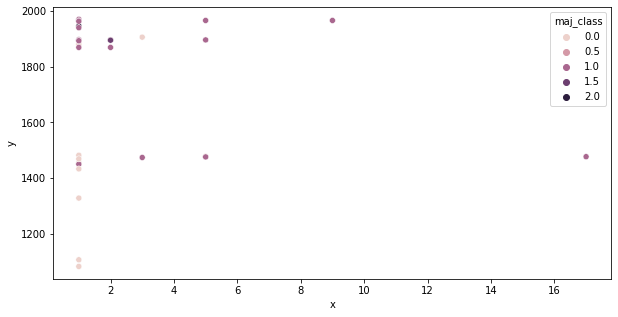

In [ ]:
x_arr=[]
y_arr=[]
for i in range(1,32):
  x=len(globals()['line3_{}_df'.format(i)])
  x_arr.append(x)
  y=len(globals()['non_null_cols3_{}'.format(i)])
  y_arr.append(y)
dfsss = pd.DataFrame({'x': x_arr, 'y': y_arr,'maj_class': maj_clss})
plt.figure(figsize=(10,5))
sns.scatterplot(x='x',y='y',hue='maj_class',data=dfsss)

In [ ]:
train_x = train_df[non_null_cols3_31]
test_x=test_df[non_null_cols3_31]
train_x

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,X_135,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,month
0,1,0.533433,T050304,A_31,7813.0,7813.0,0.19,0.20,0.19,0.2,...,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,NaN,6
1,2,0.541819,T050307,A_31,NaN,NaN,0.20,0.21,0.20,0.2,...,383.0,367.735849,353.0,38.89,42.82,43.92,35.34,72.55,NaN,6
2,1,0.531267,T050304,A_31,7815.0,7815.0,0.19,0.20,0.19,0.2,...,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,NaN,6
3,2,0.537325,T050307,A_31,NaN,NaN,0.20,0.21,0.20,0.2,...,384.0,369.188679,353.0,37.74,39.17,52.17,30.58,71.78,NaN,6
4,1,0.531590,T050304,A_31,7817.0,7817.0,0.19,0.20,0.18,0.2,...,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,0.526546,T100306,T_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
594,0,0.524022,T050304,A_31,14810.0,14810.0,0.19,0.20,0.19,0.2,...,384.0,369.811321,353.0,49.47,53.07,50.89,55.10,66.49,1.0,9
595,0,0.521289,T050304,A_31,14813.0,14813.0,0.19,0.20,0.19,0.2,...,383.0,367.018868,352.0,NaN,NaN,NaN,NaN,NaN,1.0,9
596,1,0.531375,T100304,O_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [ ]:
train_x3 = train_x[train_x['LINE']=='T050304']
train_x3

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,X_135,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,month
0,1,0.533433,T050304,A_31,7813.0,7813.0,0.19,0.2,0.19,0.2,...,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,NaN,6
2,1,0.531267,T050304,A_31,7815.0,7815.0,0.19,0.2,0.19,0.2,...,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,NaN,6
4,1,0.531590,T050304,A_31,7817.0,7817.0,0.19,0.2,0.18,0.2,...,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,NaN,6
6,1,0.533665,T050304,A_31,7820.0,7820.0,0.19,0.2,0.19,0.2,...,384.0,368.425926,353.0,32.50,41.42,38.36,30.83,76.93,NaN,6
8,1,0.531821,T050304,A_31,7822.0,7822.0,0.19,0.2,0.19,0.2,...,393.0,373.500000,353.0,42.25,43.17,55.60,33.26,78.50,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0,0.523465,T050304,A_31,11864.0,11864.0,0.19,0.2,0.19,0.2,...,384.0,367.333333,352.0,NaN,NaN,NaN,NaN,NaN,1.0,9
582,0,0.522233,T050304,A_31,11898.0,11898.0,0.18,0.2,0.18,0.2,...,384.0,367.037037,352.0,50.88,53.23,52.44,56.28,66.83,1.0,9
583,0,0.522340,T050304,A_31,11920.0,11920.0,0.19,0.2,0.19,0.2,...,394.0,371.943396,353.0,51.71,59.64,54.61,57.05,63.18,1.0,9
594,0,0.524022,T050304,A_31,14810.0,14810.0,0.19,0.2,0.19,0.2,...,384.0,369.811321,353.0,49.47,53.07,50.89,55.10,66.49,1.0,9


In [ ]:
train_x3['month']

0      6
2      6
4      6
6      6
8      6
      ..
581    9
582    9
583    9
594    9
595    9
Name: month, Length: 78, dtype: int64

ValueError: ignored

In [ ]:
non_null_cols3_31

['Y_Class',
 'Y_Quality',
 'LINE',
 'PRODUCT_CODE',
 'X_128',
 'X_129',
 'X_132',
 'X_133',
 'X_134',
 'X_135',
 'X_136',
 'X_137',
 'X_138',
 'X_139',
 'X_140',
 'X_141',
 'X_142',
 'X_143',
 'X_144',
 'X_145',
 'X_146',
 'X_147',
 'X_148',
 'X_149',
 'X_150',
 'X_151',
 'X_152',
 'X_153',
 'X_154',
 'X_155',
 'X_156',
 'X_157',
 'X_158',
 'X_159',
 'X_160',
 'X_161',
 'X_162',
 'X_163',
 'X_164',
 'X_165',
 'X_166',
 'X_167',
 'X_168',
 'X_169',
 'X_170',
 'X_171',
 'X_172',
 'X_173',
 'X_174',
 'X_175',
 'X_176',
 'X_177',
 'X_178',
 'X_179',
 'X_180',
 'X_181',
 'X_182',
 'X_183',
 'X_184',
 'X_185',
 'X_186',
 'X_187',
 'X_188',
 'X_189',
 'X_190',
 'X_191',
 'X_192',
 'X_193',
 'X_194',
 'X_195',
 'X_196',
 'X_197',
 'X_198',
 'X_199',
 'X_200',
 'X_201',
 'X_202',
 'X_203',
 'X_204',
 'X_205',
 'X_206',
 'X_207',
 'X_208',
 'X_209',
 'X_210',
 'X_211',
 'X_212',
 'X_213',
 'X_214',
 'X_215',
 'X_216',
 'X_217',
 'X_218',
 'X_219',
 'X_220',
 'X_221',
 'X_222',
 'X_223',
 'X_224'

In [ ]:
train_x3

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,X_135,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,month
0,1,0.533433,T050304,A_31,7813.0,7813.0,0.19,0.2,0.19,0.2,...,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,NaN,6
2,1,0.531267,T050304,A_31,7815.0,7815.0,0.19,0.2,0.19,0.2,...,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,NaN,6
4,1,0.531590,T050304,A_31,7817.0,7817.0,0.19,0.2,0.18,0.2,...,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,NaN,6
6,1,0.533665,T050304,A_31,7820.0,7820.0,0.19,0.2,0.19,0.2,...,384.0,368.425926,353.0,32.50,41.42,38.36,30.83,76.93,NaN,6
8,1,0.531821,T050304,A_31,7822.0,7822.0,0.19,0.2,0.19,0.2,...,393.0,373.500000,353.0,42.25,43.17,55.60,33.26,78.50,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0,0.523465,T050304,A_31,11864.0,11864.0,0.19,0.2,0.19,0.2,...,384.0,367.333333,352.0,NaN,NaN,NaN,NaN,NaN,1.0,9
582,0,0.522233,T050304,A_31,11898.0,11898.0,0.18,0.2,0.18,0.2,...,384.0,367.037037,352.0,50.88,53.23,52.44,56.28,66.83,1.0,9
583,0,0.522340,T050304,A_31,11920.0,11920.0,0.19,0.2,0.19,0.2,...,394.0,371.943396,353.0,51.71,59.64,54.61,57.05,63.18,1.0,9
594,0,0.524022,T050304,A_31,14810.0,14810.0,0.19,0.2,0.19,0.2,...,384.0,369.811321,353.0,49.47,53.07,50.89,55.10,66.49,1.0,9


In [ ]:
mode_list=[]
for c in train_x3.columns[5:]:
  mode_list.append(train_x3[c].median())

for i,c in enumerate(train_x3.columns[5:]):
  train_x3[c].fillna(mode_list[i],inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
x_train3, x_val3= train_test_split(train_x3[non_null_cols3_31], test_size=0.2,random_state=37,stratify=train_x3['Y_Class'])
x_val3

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,X_135,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,month
360,0,0.524606,T050304,A_31,24728.0,24728.0,0.20,0.20,0.20,0.2,...,384.0,369.698113,353.0,48.40,60.71,53.14,49.39,62.83,1.0,8
14,1,0.531254,T050304,A_31,7830.0,7830.0,0.19,0.20,0.19,0.2,...,394.0,372.830189,352.0,40.42,38.33,40.14,30.72,76.52,1.0,6
478,0,0.520252,T050304,A_31,5539.0,5539.0,0.19,0.20,0.19,0.2,...,384.0,367.407407,354.0,54.66,54.44,42.39,56.79,64.93,1.0,8
6,1,0.533665,T050304,A_31,7820.0,7820.0,0.19,0.20,0.19,0.2,...,384.0,368.425926,353.0,32.50,41.42,38.36,30.83,76.93,1.0,6
320,1,0.526868,T050304,A_31,22322.0,22322.0,0.20,0.21,0.20,0.2,...,383.0,366.481481,352.0,55.91,56.14,40.27,56.86,61.74,1.0,7
21,2,0.544129,T050304,A_31,8949.0,8949.0,0.19,0.20,0.18,0.2,...,384.0,368.407407,352.0,53.81,56.14,51.33,56.21,65.14,1.0,6
557,2,0.559463,T050304,A_31,851.0,851.0,0.19,0.20,0.19,0.2,...,393.0,376.698113,362.0,50.87,57.13,53.07,56.21,67.22,1.0,8
574,1,0.529416,T050304,A_31,9423.0,9423.0,0.19,0.20,0.19,0.2,...,384.0,369.433962,352.0,52.19,60.88,52.97,45.46,62.83,1.0,9
367,0,0.525046,T050304,A_31,25105.0,25105.0,0.20,0.21,0.20,0.2,...,384.0,368.849057,353.0,52.39,57.23,36.81,51.47,65.14,1.0,8
368,1,0.528186,T050304,A_31,25153.0,25153.0,0.20,0.21,0.20,0.2,...,384.0,360.358491,342.0,50.23,59.32,40.60,53.06,65.26,1.0,8


In [ ]:
x_val3['Y_Quality']

360    0.524606
14     0.531254
478    0.520252
6      0.533665
320    0.526868
21     0.544129
557    0.559463
574    0.529416
367    0.525046
368    0.528186
540    0.513751
573    0.526948
337    0.530900
111    0.518960
361    0.517494
97     0.531679
Name: Y_Quality, dtype: float64

In [ ]:
x_train3, x_val3= train_test_split(x_train3, test_size=0.2,random_state=37)
yy_train3 = x_train3['Y_Class']
y_train3 = x_train3['Y_Quality']
x_train3 = x_train3.drop(columns=['Y_Quality','Y_Class'])

yy_val3 = x_val3['Y_Class']
y_val3 = x_val3['Y_Quality']
x_val3 = x_val3.drop(columns=['Y_Quality','Y_Class'])

In [ ]:
x_train3

,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,X_135,X_136,X_137,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,month
433,T050304,A_31,2095.0,2095.0,0.19,0.21,0.19,0.2,61.0,62.0,...,384.0,368.333333,353.0,53.81,56.14,51.33,56.21,65.14,1.0,8
453,T050304,A_31,3538.0,3538.0,0.20,0.21,0.20,0.2,107.0,107.0,...,383.0,363.641509,342.0,49.79,53.00,53.74,50.09,62.77,1.0,8
304,T050304,A_31,21873.0,21873.0,0.19,0.21,0.19,0.2,705.0,705.0,...,384.0,368.407407,352.0,54.41,54.78,40.34,55.31,61.67,1.0,7
576,T050304,A_31,9467.0,9467.0,0.19,0.20,0.19,0.2,192.0,192.0,...,383.0,359.462963,342.0,55.74,56.61,40.51,57.22,62.05,1.0,9
20,T050304,A_31,7837.0,7837.0,0.19,0.20,0.19,0.2,228.0,228.0,...,384.0,367.851852,352.0,53.81,56.14,51.33,56.21,65.14,1.0,6
132,T050304,A_31,5595.0,5595.0,0.20,0.21,0.20,0.2,200.0,200.0,...,384.0,367.000000,352.0,53.81,56.14,51.33,56.21,65.14,1.0,7
250,T050304,A_31,16669.0,16669.0,0.20,0.21,0.20,0.2,550.0,550.0,...,373.0,358.490566,343.0,53.81,56.14,51.33,56.21,65.14,1.0,7
303,T050304,A_31,21863.0,21863.0,0.20,0.21,0.20,0.2,705.0,705.0,...,384.0,367.886793,354.0,58.07,55.23,51.33,56.78,63.48,1.0,7
357,T050304,A_31,24448.0,24448.0,0.19,0.21,0.19,0.2,811.0,811.0,...,384.0,367.555556,352.0,54.53,59.33,50.85,55.33,65.87,1.0,8
255,T050304,A_31,17441.0,17441.0,0.20,0.21,0.20,0.2,571.0,571.0,...,384.0,368.528302,352.0,60.24,56.16,54.52,56.42,66.85,1.0,7


In [ ]:
import catboost
clf3 = catboost.CatBoostRegressor(learning_rate=0.05, iterations=500, verbose=0)
clf3.fit(x_train3, y_train3, early_stopping_rounds=100, cat_features=['PRODUCT_CODE', 'LINE'])


In [ ]:
a = train_df[['Y_Class','Y_Quality']].groupby('Y_Class').agg(['mean', 'min', 'max', 'count'])
a

Y_Quality                          
             mean       min       max count
Y_Class                                    
0        0.520837  0.500856  0.525067    88
1        0.530253  0.525086  0.534843   407
2        0.542031  0.534951  0.578841   103

In [ ]:
from sklearn.metrics import f1_score

pre_preds = clf3.predict(x_val3)
print(clf3.score(x_val3,y_val3))

preds=[]
for p in pre_preds:
  if p<=a[('Y_Quality','max')][0]:
    preds.append(0)
  elif p<=a[('Y_Quality','min')][2]:
    preds.append(1)
  else:
    preds.append(2)
print(f1_score(yy_val3, preds, average='macro' ))

0.3417190717968107
0.3904761904761904


In [ ]:
non_null_cols3_1

['Y_Class',
 'Y_Quality',
 'LINE',
 'PRODUCT_CODE',
 'X_128',
 'X_129',
 'X_132',
 'X_133',
 'X_134',
 'X_135',
 'X_136',
 'X_137',
 'X_138',
 'X_139',
 'X_140',
 'X_141',
 'X_142',
 'X_143',
 'X_144',
 'X_145',
 'X_146',
 'X_147',
 'X_148',
 'X_149',
 'X_150',
 'X_151',
 'X_152',
 'X_153',
 'X_154',
 'X_155',
 'X_156',
 'X_157',
 'X_158',
 'X_159',
 'X_160',
 'X_161',
 'X_162',
 'X_163',
 'X_164',
 'X_165',
 'X_166',
 'X_167',
 'X_168',
 'X_169',
 'X_170',
 'X_171',
 'X_172',
 'X_173',
 'X_174',
 'X_175',
 'X_176',
 'X_177',
 'X_178',
 'X_179',
 'X_180',
 'X_181',
 'X_182',
 'X_183',
 'X_184',
 'X_185',
 'X_186',
 'X_187',
 'X_188',
 'X_189',
 'X_190',
 'X_191',
 'X_192',
 'X_193',
 'X_194',
 'X_195',
 'X_196',
 'X_197',
 'X_198',
 'X_199',
 'X_200',
 'X_201',
 'X_202',
 'X_203',
 'X_204',
 'X_205',
 'X_206',
 'X_207',
 'X_208',
 'X_209',
 'X_210',
 'X_211',
 'X_212',
 'X_213',
 'X_214',
 'X_215',
 'X_216',
 'X_217',
 'X_218',
 'X_219',
 'X_220',
 'X_221',
 'X_222',
 'X_223',
 'X_224'

In [ ]:
train_x

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,X_135,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,month
0,1,0.533433,T050304,A_31,7813.0,7813.0,0.19,0.20,0.19,0.2,...,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,NaN,6
1,2,0.541819,T050307,A_31,NaN,NaN,0.20,0.21,0.20,0.2,...,383.0,367.735849,353.0,38.89,42.82,43.92,35.34,72.55,NaN,6
2,1,0.531267,T050304,A_31,7815.0,7815.0,0.19,0.20,0.19,0.2,...,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,NaN,6
3,2,0.537325,T050307,A_31,NaN,NaN,0.20,0.21,0.20,0.2,...,384.0,369.188679,353.0,37.74,39.17,52.17,30.58,71.78,NaN,6
4,1,0.531590,T050304,A_31,7817.0,7817.0,0.19,0.20,0.18,0.2,...,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,0.526546,T100306,T_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
594,0,0.524022,T050304,A_31,14810.0,14810.0,0.19,0.20,0.19,0.2,...,384.0,369.811321,353.0,49.47,53.07,50.89,55.10,66.49,1.0,9
595,0,0.521289,T050304,A_31,14813.0,14813.0,0.19,0.20,0.19,0.2,...,383.0,367.018868,352.0,NaN,NaN,NaN,NaN,NaN,1.0,9
596,1,0.531375,T100304,O_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [ ]:
from sklearn.model_selection import train_test_split
import catboost
from sklearn.metrics import f1_score
f1score_list=[]
for k in range(1,32):
  colss = globals()['non_null_cols3_{}'.format(k)]
  train_x = train_df[colss]
  train_x3= train_x[train_x['LINE']=='T050304']#3번라인만 뽑기
  #결측대체
  mode_list=[]
  for c in train_x3.columns[4:]:
    mode_list.append(train_x3[c].median())
  for i,c in enumerate(train_x3.columns[4:]):
    train_x3[c].fillna(mode_list[i],inplace=True)
  #validation split
  x_train3, x_val3= train_test_split(train_x3[globals()['non_null_cols3_{}'.format(k)]], test_size=0.2,random_state=37,stratify=train_x3['Y_Class'])
  x_train3, x_val3= train_test_split(x_train3, test_size=0.2,random_state=37)
  yy_train3 = x_train3['Y_Class']
  y_train3 = x_train3['Y_Quality']
  x_train3 = x_train3.drop(columns=['Y_Quality','Y_Class'])
  yy_val3 = x_val3['Y_Class']
  y_val3 = x_val3['Y_Quality']
  x_val3 = x_val3.drop(columns=['Y_Quality','Y_Class'])
  #fit
  clf3 = catboost.CatBoostRegressor(learning_rate=0.05, iterations=500, verbose=0)
  clf3.fit(x_train3, y_train3, early_stopping_rounds=100, cat_features=['PRODUCT_CODE', 'LINE'])
  #threshold
  a = train_df[['Y_Class','Y_Quality']].groupby('Y_Class').agg(['mean', 'min', 'max', 'count'])
  #f1scoring
  pre_preds = clf3.predict(x_val3)
  preds=[]
  for p in pre_preds:
    if p<=a[('Y_Quality','max')][0]:
      preds.append(0)
    elif p<=a[('Y_Quality','min')][2]:
      preds.append(1)
    else:
      preds.append(2)

  f1score_list.append(f1_score(yy_val3, preds, average='macro'))


f1score_list




[0.3259259259259259,
 0.4444444444444444,
 0.3904761904761904,
 0.375,
 0.3904761904761904,
 0.3904761904761904,
 0.4444444444444444,
 0.4444444444444444,
 0.3904761904761904,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.3904761904761904,
 0.4444444444444444,
 0.3904761904761904,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.3904761904761904]

In [ ]:
colsss= list(set(non_null_cols3_1).intersection(non_null_cols3_2).intersection(non_null_cols3_3).intersection(non_null_cols3_4).intersection(non_null_cols3_5).intersection(non_null_cols3_6).intersection(non_null_cols3_7).intersection(non_null_cols3_8).intersection(non_null_cols3_9).intersection(non_null_cols3_10).intersection(non_null_cols3_11).intersection(non_null_cols3_12).intersection(non_null_cols3_13).intersection(non_null_cols3_14).intersection(non_null_cols3_15).intersection(non_null_cols3_16).intersection(non_null_cols3_17).intersection(non_null_cols3_18).intersection(non_null_cols3_19).intersection(non_null_cols3_20).intersection(non_null_cols3_21).intersection(non_null_cols3_22).intersection(non_null_cols3_23).intersection(non_null_cols3_24).intersection(non_null_cols3_25).intersection(non_null_cols3_26).intersection(non_null_cols3_27).intersection(non_null_cols3_28).intersection(non_null_cols3_29).intersection(non_null_cols3_30).intersection(non_null_cols3_31))
colsss

['X_1102',
 'X_2713',
 'X_1144',
 'X_2834',
 'X_1824',
 'X_1552',
 'X_1776',
 'X_1109',
 'X_1784',
 'X_168',
 'X_1116',
 'X_1783',
 'X_1786',
 'X_223',
 'X_1716',
 'X_1841',
 'X_2744',
 'X_2487',
 'X_166',
 'X_1881',
 'X_2428',
 'X_1932',
 'X_1484',
 'X_154',
 'X_1505',
 'X_2865',
 'X_230',
 'X_2741',
 'X_1119',
 'X_1135',
 'X_1082',
 'X_1945',
 'X_1322',
 'X_1327',
 'X_2709',
 'X_217',
 'X_1768',
 'X_1097',
 'X_1864',
 'X_2447',
 'X_2442',
 'X_2793',
 'X_1925',
 'X_2492',
 'X_2757',
 'X_240',
 'X_1478',
 'X_2493',
 'X_2809',
 'X_2413',
 'X_242',
 'X_1509',
 'X_1773',
 'X_2828',
 'X_1721',
 'X_1193',
 'X_1328',
 'X_172',
 'X_1497',
 'X_2772',
 'X_1215',
 'X_2502',
 'X_184',
 'X_1850',
 'X_2706',
 'X_1928',
 'X_1805',
 'X_244',
 'X_1771',
 'X_2410',
 'X_185',
 'X_1516',
 'X_1918',
 'X_2824',
 'X_1528',
 'X_1090',
 'X_128',
 'X_243',
 'X_1930',
 'X_1506',
 'X_1869',
 'X_1781',
 'X_229',
 'X_1729',
 'X_1208',
 'X_1742',
 'X_147',
 'X_1125',
 'X_1546',
 'X_2503',
 'X_2478',
 'X_170',
 'Y_Q

In [ ]:
non_null_cols3_2

['Y_Class',
 'Y_Quality',
 'LINE',
 'PRODUCT_CODE',
 'X_128',
 'X_129',
 'X_132',
 'X_133',
 'X_134',
 'X_135',
 'X_136',
 'X_137',
 'X_138',
 'X_139',
 'X_140',
 'X_141',
 'X_142',
 'X_143',
 'X_144',
 'X_145',
 'X_146',
 'X_147',
 'X_148',
 'X_149',
 'X_150',
 'X_151',
 'X_152',
 'X_153',
 'X_154',
 'X_155',
 'X_156',
 'X_157',
 'X_158',
 'X_159',
 'X_160',
 'X_161',
 'X_162',
 'X_163',
 'X_164',
 'X_165',
 'X_166',
 'X_167',
 'X_168',
 'X_169',
 'X_170',
 'X_171',
 'X_172',
 'X_173',
 'X_174',
 'X_175',
 'X_176',
 'X_177',
 'X_178',
 'X_179',
 'X_180',
 'X_181',
 'X_182',
 'X_183',
 'X_184',
 'X_185',
 'X_186',
 'X_187',
 'X_188',
 'X_189',
 'X_190',
 'X_191',
 'X_192',
 'X_193',
 'X_194',
 'X_195',
 'X_196',
 'X_197',
 'X_198',
 'X_199',
 'X_200',
 'X_201',
 'X_202',
 'X_203',
 'X_204',
 'X_205',
 'X_206',
 'X_207',
 'X_208',
 'X_209',
 'X_210',
 'X_211',
 'X_212',
 'X_213',
 'X_214',
 'X_215',
 'X_216',
 'X_217',
 'X_218',
 'X_219',
 'X_220',
 'X_221',
 'X_222',
 'X_223',
 'X_224'

In [ ]:
train_df

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,...,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875,month
0,TRAIN_000,1,0.533433,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN,6
1,TRAIN_001,2,0.541819,T050307,A_31,NaN,NaN,NaN,NaN,NaN,...,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN,6
2,TRAIN_002,1,0.531267,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN,6
3,TRAIN_003,2,0.537325,T050307,A_31,NaN,NaN,NaN,NaN,NaN,...,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN,6
4,TRAIN_004,1,0.531590,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,T100306,T_31,2.0,95.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
594,TRAIN_594,0,0.524022,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN,9
595,TRAIN_595,0,0.521289,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,9
596,TRAIN_596,1,0.531375,T100304,O_31,40.0,94.0,0.0,45.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [ ]:
train_x['LINE']

0      T050304
1      T050307
2      T050304
3      T050307
4      T050304
        ...   
593    T100306
594    T050304
595    T050304
596    T100304
597    T100306
Name: LINE, Length: 598, dtype: object

In [ ]:
train_x = train_df[non_null_cols3_2]
train_x3= train_x[train_x['LINE']=='T050304']
train_x3

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,X_135,...,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,month
0,1,0.533433,T050304,A_31,7813.0,7813.0,0.19,0.2,0.19,0.2,...,189.0,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,6
2,1,0.531267,T050304,A_31,7815.0,7815.0,0.19,0.2,0.19,0.2,...,165.5,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,6
4,1,0.531590,T050304,A_31,7817.0,7817.0,0.19,0.2,0.18,0.2,...,182.6,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,6
6,1,0.533665,T050304,A_31,7820.0,7820.0,0.19,0.2,0.19,0.2,...,176.9,384.0,368.425926,353.0,32.50,41.42,38.36,30.83,76.93,6
8,1,0.531821,T050304,A_31,7822.0,7822.0,0.19,0.2,0.19,0.2,...,173.8,393.0,373.500000,353.0,42.25,43.17,55.60,33.26,78.50,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0,0.523465,T050304,A_31,11864.0,11864.0,0.19,0.2,0.19,0.2,...,176.0,384.0,367.333333,352.0,NaN,NaN,NaN,NaN,NaN,9
582,0,0.522233,T050304,A_31,11898.0,11898.0,0.18,0.2,0.18,0.2,...,174.0,384.0,367.037037,352.0,50.88,53.23,52.44,56.28,66.83,9
583,0,0.522340,T050304,A_31,11920.0,11920.0,0.19,0.2,0.19,0.2,...,181.6,394.0,371.943396,353.0,51.71,59.64,54.61,57.05,63.18,9
594,0,0.524022,T050304,A_31,14810.0,14810.0,0.19,0.2,0.19,0.2,...,168.7,384.0,369.811321,353.0,49.47,53.07,50.89,55.10,66.49,9


In [ ]:
colsss

['X_1102',
 'X_2713',
 'X_1144',
 'X_2834',
 'X_1824',
 'X_1552',
 'X_1776',
 'X_1109',
 'X_1784',
 'X_168',
 'X_1116',
 'X_1783',
 'X_1786',
 'X_223',
 'X_1716',
 'X_1841',
 'X_2744',
 'X_2487',
 'X_166',
 'X_1881',
 'X_2428',
 'X_1932',
 'X_1484',
 'X_154',
 'X_1505',
 'X_2865',
 'X_230',
 'X_2741',
 'X_1119',
 'X_1135',
 'X_1082',
 'X_1945',
 'X_1322',
 'X_1327',
 'X_2709',
 'X_217',
 'X_1768',
 'X_1097',
 'X_1864',
 'X_2447',
 'X_2442',
 'X_2793',
 'X_1925',
 'X_2492',
 'X_2757',
 'X_240',
 'X_1478',
 'X_2493',
 'X_2809',
 'X_2413',
 'X_242',
 'X_1509',
 'X_1773',
 'X_2828',
 'X_1721',
 'X_1193',
 'X_1328',
 'X_172',
 'X_1497',
 'X_2772',
 'X_1215',
 'X_2502',
 'X_184',
 'X_1850',
 'X_2706',
 'X_1928',
 'X_1805',
 'X_244',
 'X_1771',
 'X_2410',
 'X_185',
 'X_1516',
 'X_1918',
 'X_2824',
 'X_1528',
 'X_1090',
 'X_128',
 'X_243',
 'X_1930',
 'X_1506',
 'X_1869',
 'X_1781',
 'X_229',
 'X_1729',
 'X_1208',
 'X_1742',
 'X_147',
 'X_1125',
 'X_1546',
 'X_2503',
 'X_2478',
 'X_170',
 'Y_Q

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_x = train_df[non_null_cols3_14]

train_x3= train_x[train_x['LINE']=='T050304']#3번라인만 뽑기
  #결측대체
mode_list=[]
for c in train_x3.columns[~train_x3.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]:
  mode_list.append(train_x3[c].median())
for i,c in enumerate(train_x3.columns[~train_x3.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]):
  train_x3[c].fillna(mode_list[i],inplace=True)
  #validation split
x_train3, x_val3= train_test_split(train_x3[colsss], test_size=0.2,random_state=37,stratify=train_x3['Y_Class'])
x_train3, x_val3= train_test_split(x_train3, test_size=0.2,random_state=37)
yy_train3 = x_train3['Y_Class']
y_train3 = x_train3['Y_Quality']
x_train3 = x_train3.drop(columns=['Y_Quality','Y_Class'])
yy_val3 = x_val3['Y_Class']
y_val3 = x_val3['Y_Quality']
x_val3 = x_val3.drop(columns=['Y_Quality','Y_Class'])
#fit
clf3 = catboost.CatBoostClassifier(learning_rate=0.05, iterations=500, verbose=0)
clf3.fit(x_train3, yy_train3, early_stopping_rounds=100, cat_features=['PRODUCT_CODE', 'LINE'])
#threshold
a = train_df[['Y_Class','Y_Quality']].groupby('Y_Class').agg(['mean', 'min', 'max', 'count'])
#f1scoring
pre_preds = clf3.predict(x_val3)
preds=[]
for p in pre_preds:
  if p<=a[('Y_Quality','max')][0]:
    preds.append(0)
  elif p<=a[('Y_Quality','min')][2]:
    preds.append(1)
  else:
    preds.append(2)

f1_score(yy_val3, pre_preds, average='macro')

0.4444444444444444

In [ ]:
train_x = train_df[colsss]


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier


rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
train_x3= train_x[train_x['LINE']=='T050304']#3번라인만 뽑기

#결측대체
mode_list=[]
for c in train_x3.columns[~train_x3.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]:
  mode_list.append(train_x3[c].median())
for i,c in enumerate(train_x3.columns[~train_x3.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]):
  train_x3[c].fillna(mode_list[i],inplace=True)

yy_train3 = train_x3['Y_Class']
train_x3 = train_x3.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x3, yy_train3))):
    x_trn, x_val, y_trn, y_val = train_x3.iloc[train_index], train_x3.iloc[val_index], yy_train3.iloc[train_index], yy_train3.iloc[val_index]

    xgb = XGBClassifier(verbose=0) # cpu -> thread_count=5
    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier


rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
train_x3= train_x[train_x['LINE']=='T050304']#3번라인만 뽑기

#결측대체
mode_list=[]
for c in train_x3.columns[~train_x3.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]:
  mode_list.append(train_x3[c].mode())
for i,c in enumerate(train_x3.columns[~train_x3.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]):
  train_x3[c].fillna(mode_list[i],inplace=True)

yy_train3 = train_x3['Y_Class']
train_x3 = train_x3.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x3, yy_train3))):
    x_trn, x_val, y_trn, y_val = train_x3.iloc[train_index], train_x3.iloc[val_index], yy_train3.iloc[train_index], yy_train3.iloc[val_index]

    xgb = XGBClassifier(verbose=0) # cpu -> thread_count=5
    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

0it [00:00, ?it/s]

[0]	validation_0-merror:0	validation_1-merror:0.5
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0	validation_1-merror:0.5625
[2]	validation_0-merror:0	validation_1-merror:0.5625
[3]	validation_0-merror:0	validation_1-merror:0.5625
[4]	validation_0-merror:0	validation_1-merror:0.5
[5]	validation_0-merror:0	validation_1-merror:0.5
[6]	validation_0-merror:0	validation_1-merror:0.5
[7]	validation_0-merror:0	validation_1-merror:0.5
[8]	validation_0-merror:0	validation_1-merror:0.4375
[9]	validation_0-merror:0	validation_1-merror:0.4375
[10]	validation_0-merror:0	validation_1-merror:0.4375
[11]	validation_0-merror:0	validation_1-merror:0.4375
[12]	validation_0-merror:0	validation_1-merror:0.4375
[13]	validation_0-merror:0	validation_1-merror:0.4375
[14]	validation_0-merror:0	validation_1-merror:0.4375
[15]	validation_0-merror:0	validation_1-merror:0.37

1it [00:02,  2.27s/it]

[0]	validation_0-merror:0.016129	validation_1-merror:0.3125
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0	validation_1-merror:0.375
[2]	validation_0-merror:0	validation_1-merror:0.375
[3]	validation_0-merror:0	validation_1-merror:0.375
[4]	validation_0-merror:0	validation_1-merror:0.375
[5]	validation_0-merror:0	validation_1-merror:0.375
[6]	validation_0-merror:0	validation_1-merror:0.375
[7]	validation_0-merror:0	validation_1-merror:0.3125
[8]	validation_0-merror:0	validation_1-merror:0.3125
[9]	validation_0-merror:0	validation_1-merror:0.3125
[10]	validation_0-merror:0	validation_1-merror:0.3125
[11]	validation_0-merror:0	validation_1-merror:0.25
[12]	validation_0-merror:0	validation_1-merror:0.25
[13]	validation_0-merror:0	validation_1-merror:0.25
[14]	validation_0-merror:0	validation_1-merror:0.25
[15]	validation_0-merror:0	validation_1-mer

2it [00:04,  2.51s/it]

[0]	validation_0-merror:0.032258	validation_1-merror:0.375
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0	validation_1-merror:0.25
[2]	validation_0-merror:0	validation_1-merror:0.25
[3]	validation_0-merror:0	validation_1-merror:0.25
[4]	validation_0-merror:0	validation_1-merror:0.25
[5]	validation_0-merror:0	validation_1-merror:0.25
[6]	validation_0-merror:0	validation_1-merror:0.25
[7]	validation_0-merror:0	validation_1-merror:0.25
[8]	validation_0-merror:0	validation_1-merror:0.25
[9]	validation_0-merror:0	validation_1-merror:0.1875
[10]	validation_0-merror:0	validation_1-merror:0.25
[11]	validation_0-merror:0	validation_1-merror:0.1875
[12]	validation_0-merror:0	validation_1-merror:0.1875
[13]	validation_0-merror:0	validation_1-merror:0.1875
[14]	validation_0-merror:0	validation_1-merror:0.1875
[15]	validation_0-merror:0	validation_1-merror:0

3it [00:07,  2.61s/it]

[0]	validation_0-merror:0.015873	validation_1-merror:0.333333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.015873	validation_1-merror:0.333333
[2]	validation_0-merror:0.015873	validation_1-merror:0.333333
[3]	validation_0-merror:0.015873	validation_1-merror:0.333333
[4]	validation_0-merror:0.015873	validation_1-merror:0.333333
[5]	validation_0-merror:0.015873	validation_1-merror:0.333333
[6]	validation_0-merror:0	validation_1-merror:0.333333
[7]	validation_0-merror:0	validation_1-merror:0.333333
[8]	validation_0-merror:0	validation_1-merror:0.333333
[9]	validation_0-merror:0	validation_1-merror:0.333333
[10]	validation_0-merror:0	validation_1-merror:0.333333
[11]	validation_0-merror:0	validation_1-merror:0.266667
[12]	validation_0-merror:0	validation_1-merror:0.266667
[13]	validation_0-merror:0	validation_1-merror:0.266667
[14]	validation_0-me

4it [00:09,  2.18s/it]

[0]	validation_0-merror:0.031746	validation_1-merror:0.333333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.015873	validation_1-merror:0.333333
[2]	validation_0-merror:0.015873	validation_1-merror:0.333333
[3]	validation_0-merror:0.015873	validation_1-merror:0.333333
[4]	validation_0-merror:0.015873	validation_1-merror:0.333333
[5]	validation_0-merror:0.015873	validation_1-merror:0.333333
[6]	validation_0-merror:0.015873	validation_1-merror:0.333333
[7]	validation_0-merror:0.015873	validation_1-merror:0.333333
[8]	validation_0-merror:0.015873	validation_1-merror:0.333333
[9]	validation_0-merror:0.015873	validation_1-merror:0.333333
[10]	validation_0-merror:0	validation_1-merror:0.333333
[11]	validation_0-merror:0	validation_1-merror:0.333333
[12]	validation_0-merror:0	validation_1-merror:0.333333
[13]	validation_0-merror:0	validation_1-merror:0

5it [00:11,  2.07s/it]

[0]	validation_0-merror:0.032258	validation_1-merror:0.4375
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0	validation_1-merror:0.5
[2]	validation_0-merror:0.016129	validation_1-merror:0.5
[3]	validation_0-merror:0	validation_1-merror:0.5
[4]	validation_0-merror:0	validation_1-merror:0.5
[5]	validation_0-merror:0	validation_1-merror:0.5
[6]	validation_0-merror:0	validation_1-merror:0.5
[7]	validation_0-merror:0	validation_1-merror:0.5
[8]	validation_0-merror:0	validation_1-merror:0.5
[9]	validation_0-merror:0	validation_1-merror:0.5
[10]	validation_0-merror:0	validation_1-merror:0.5
[11]	validation_0-merror:0	validation_1-merror:0.5
[12]	validation_0-merror:0	validation_1-merror:0.5
[13]	validation_0-merror:0	validation_1-merror:0.5
[14]	validation_0-merror:0	validation_1-merror:0.5
[15]	validation_0-merror:0	validation_1-merror:0.5
[16]	validati

6it [00:13,  2.05s/it]

[0]	validation_0-merror:0	validation_1-merror:0.4375
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.016129	validation_1-merror:0.4375
[2]	validation_0-merror:0	validation_1-merror:0.375
[3]	validation_0-merror:0	validation_1-merror:0.375
[4]	validation_0-merror:0	validation_1-merror:0.375
[5]	validation_0-merror:0	validation_1-merror:0.375
[6]	validation_0-merror:0	validation_1-merror:0.375
[7]	validation_0-merror:0	validation_1-merror:0.3125
[8]	validation_0-merror:0	validation_1-merror:0.3125
[9]	validation_0-merror:0	validation_1-merror:0.375
[10]	validation_0-merror:0	validation_1-merror:0.3125
[11]	validation_0-merror:0	validation_1-merror:0.375
[12]	validation_0-merror:0	validation_1-merror:0.375
[13]	validation_0-merror:0	validation_1-merror:0.375
[14]	validation_0-merror:0	validation_1-merror:0.375
[15]	validation_0-merror:0	validation_1

7it [00:15,  2.05s/it]

[0]	validation_0-merror:0.032258	validation_1-merror:0.625
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.032258	validation_1-merror:0.375
[2]	validation_0-merror:0.032258	validation_1-merror:0.375
[3]	validation_0-merror:0.016129	validation_1-merror:0.4375
[4]	validation_0-merror:0.016129	validation_1-merror:0.4375
[5]	validation_0-merror:0.016129	validation_1-merror:0.4375
[6]	validation_0-merror:0.016129	validation_1-merror:0.4375
[7]	validation_0-merror:0.016129	validation_1-merror:0.4375
[8]	validation_0-merror:0	validation_1-merror:0.375
[9]	validation_0-merror:0	validation_1-merror:0.375
[10]	validation_0-merror:0	validation_1-merror:0.375
[11]	validation_0-merror:0	validation_1-merror:0.375
[12]	validation_0-merror:0	validation_1-merror:0.375
[13]	validation_0-merror:0	validation_1-merror:0.375
[14]	validation_0-merror:0	validation_1-mer

8it [00:16,  1.91s/it]

[0]	validation_0-merror:0.031746	validation_1-merror:0.4
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.015873	validation_1-merror:0.333333
[2]	validation_0-merror:0.015873	validation_1-merror:0.333333
[3]	validation_0-merror:0.015873	validation_1-merror:0.333333
[4]	validation_0-merror:0.015873	validation_1-merror:0.4
[5]	validation_0-merror:0.015873	validation_1-merror:0.4
[6]	validation_0-merror:0	validation_1-merror:0.333333
[7]	validation_0-merror:0	validation_1-merror:0.333333
[8]	validation_0-merror:0	validation_1-merror:0.333333
[9]	validation_0-merror:0	validation_1-merror:0.333333
[10]	validation_0-merror:0	validation_1-merror:0.333333
[11]	validation_0-merror:0	validation_1-merror:0.333333
[12]	validation_0-merror:0	validation_1-merror:0.333333
[13]	validation_0-merror:0	validation_1-merror:0.333333
[14]	validation_0-merror:0	validati

9it [00:19,  2.24s/it]

[0]	validation_0-merror:0.063492	validation_1-merror:0.333333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.063492	validation_1-merror:0.333333
[2]	validation_0-merror:0.063492	validation_1-merror:0.333333
[3]	validation_0-merror:0.063492	validation_1-merror:0.333333
[4]	validation_0-merror:0.047619	validation_1-merror:0.266667
[5]	validation_0-merror:0.047619	validation_1-merror:0.266667
[6]	validation_0-merror:0.047619	validation_1-merror:0.266667
[7]	validation_0-merror:0.015873	validation_1-merror:0.266667
[8]	validation_0-merror:0.015873	validation_1-merror:0.266667
[9]	validation_0-merror:0.015873	validation_1-merror:0.266667
[10]	validation_0-merror:0.015873	validation_1-merror:0.266667
[11]	validation_0-merror:0.015873	validation_1-merror:0.266667
[12]	validation_0-merror:0.015873	validation_1-merror:0.266667
[13]	validation_0-merror:0	

10it [00:22,  2.50s/it]

[0]	validation_0-merror:0	validation_1-merror:0.25
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0	validation_1-merror:0.375
[2]	validation_0-merror:0	validation_1-merror:0.375
[3]	validation_0-merror:0	validation_1-merror:0.3125
[4]	validation_0-merror:0	validation_1-merror:0.3125
[5]	validation_0-merror:0	validation_1-merror:0.3125
[6]	validation_0-merror:0	validation_1-merror:0.3125
[7]	validation_0-merror:0	validation_1-merror:0.375
[8]	validation_0-merror:0	validation_1-merror:0.375
[9]	validation_0-merror:0	validation_1-merror:0.375
[10]	validation_0-merror:0	validation_1-merror:0.375
[11]	validation_0-merror:0	validation_1-merror:0.375
[12]	validation_0-merror:0	validation_1-merror:0.375
[13]	validation_0-merror:0	validation_1-merror:0.375
[14]	validation_0-merror:0	validation_1-merror:0.375
[15]	validation_0-merror:0	validation_1-merror:0

11it [00:24,  2.31s/it]

[0]	validation_0-merror:0.016129	validation_1-merror:0.5
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.016129	validation_1-merror:0.5625
[2]	validation_0-merror:0.016129	validation_1-merror:0.5625
[3]	validation_0-merror:0.016129	validation_1-merror:0.5625
[4]	validation_0-merror:0.016129	validation_1-merror:0.5625
[5]	validation_0-merror:0.016129	validation_1-merror:0.5625
[6]	validation_0-merror:0.016129	validation_1-merror:0.5625
[7]	validation_0-merror:0.016129	validation_1-merror:0.5625
[8]	validation_0-merror:0.016129	validation_1-merror:0.5625
[9]	validation_0-merror:0.016129	validation_1-merror:0.5625
[10]	validation_0-merror:0.016129	validation_1-merror:0.5625
[11]	validation_0-merror:0.016129	validation_1-merror:0.5
[12]	validation_0-merror:0	validation_1-merror:0.5625
[13]	validation_0-merror:0	validation_1-merror:0.5625
[14]	validat

12it [00:26,  2.16s/it]

[0]	validation_0-merror:0.048387	validation_1-merror:0.4375
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.016129	validation_1-merror:0.375
[2]	validation_0-merror:0.016129	validation_1-merror:0.3125
[3]	validation_0-merror:0.016129	validation_1-merror:0.3125
[4]	validation_0-merror:0.016129	validation_1-merror:0.3125
[5]	validation_0-merror:0	validation_1-merror:0.375
[6]	validation_0-merror:0	validation_1-merror:0.3125
[7]	validation_0-merror:0	validation_1-merror:0.375
[8]	validation_0-merror:0	validation_1-merror:0.375
[9]	validation_0-merror:0	validation_1-merror:0.3125
[10]	validation_0-merror:0	validation_1-merror:0.3125
[11]	validation_0-merror:0	validation_1-merror:0.3125
[12]	validation_0-merror:0	validation_1-merror:0.3125
[13]	validation_0-merror:0	validation_1-merror:0.3125
[14]	validation_0-merror:0	validation_1-merror:0.3125
[15]	

13it [00:28,  2.10s/it]

[0]	validation_0-merror:0.079365	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.015873	validation_1-merror:0.2
[2]	validation_0-merror:0.015873	validation_1-merror:0.2
[3]	validation_0-merror:0	validation_1-merror:0.2
[4]	validation_0-merror:0.015873	validation_1-merror:0.2
[5]	validation_0-merror:0	validation_1-merror:0.2
[6]	validation_0-merror:0	validation_1-merror:0.2
[7]	validation_0-merror:0	validation_1-merror:0.2
[8]	validation_0-merror:0	validation_1-merror:0.2
[9]	validation_0-merror:0	validation_1-merror:0.133333
[10]	validation_0-merror:0	validation_1-merror:0.133333
[11]	validation_0-merror:0	validation_1-merror:0.133333
[12]	validation_0-merror:0	validation_1-merror:0.133333
[13]	validation_0-merror:0	validation_1-merror:0.133333
[14]	validation_0-merror:0	validation_1-merror:0.133333
[15]	validation_0-merro

14it [00:30,  2.11s/it]

[0]	validation_0-merror:0.031746	validation_1-merror:0.266667
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.015873	validation_1-merror:0.333333
[2]	validation_0-merror:0.015873	validation_1-merror:0.266667
[3]	validation_0-merror:0.015873	validation_1-merror:0.333333
[4]	validation_0-merror:0.015873	validation_1-merror:0.266667
[5]	validation_0-merror:0.015873	validation_1-merror:0.266667
[6]	validation_0-merror:0	validation_1-merror:0.266667
[7]	validation_0-merror:0	validation_1-merror:0.266667
[8]	validation_0-merror:0	validation_1-merror:0.266667
[9]	validation_0-merror:0	validation_1-merror:0.266667
[10]	validation_0-merror:0	validation_1-merror:0.266667
[11]	validation_0-merror:0	validation_1-merror:0.266667
[12]	validation_0-merror:0	validation_1-merror:0.266667
[13]	validation_0-merror:0	validation_1-merror:0.266667
[14]	validation_0-me

15it [00:32,  2.16s/it]

0.3571428571428572 ~ 0.811111111111111
mean : 0.6352423166406655


#4번 T050307, 42개, A_31

In [ ]:
non_null_counts_4 = group_line4_df.notnull().sum()

# select only those columns with non-null values
non_null_cols_4 = non_null_counts_4[non_null_counts_4 > 0].index.tolist()

# print the resulting list of non-null columns
print(non_null_cols_4)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_130', 'X_131', 'X_132', 'X_133', 'X_134', 'X_135', 'X_136', 'X_137', 'X_138', 'X_139', 'X_140', 'X_141', 'X_142', 'X_143', 'X_144', 'X_145', 'X_146', 'X_147', 'X_148', 'X_149', 'X_150', 'X_151', 'X_152', 'X_153', 'X_154', 'X_155', 'X_156', 'X_157', 'X_158', 'X_159', 'X_160', 'X_161', 'X_162', 'X_163', 'X_164', 'X_165', 'X_166', 'X_167', 'X_168', 'X_169', 'X_170', 'X_171', 'X_172', 'X_173', 'X_174', 'X_175', 'X_176', 'X_177', 'X_178', 'X_179', 'X_180', 'X_181', 'X_182', 'X_183', 'X_184', 'X_185', 'X_186', 'X_187', 'X_188', 'X_189', 'X_190', 'X_191', 'X_192', 'X_193', 'X_194', 'X_195', 'X_196', 'X_197', 'X_198', 'X_199', 'X_200', 'X_201', 'X_202', 'X_203', 'X_204', 'X_205', 'X_206', 'X_207', 'X_208', 'X_209', 'X_210', 'X_211', 'X_212', 'X_213', 'X_214', 'X_215', 'X_216', 'X_217', 'X_218', 'X_219', 'X_220', 'X_221', 'X_222', 'X_223', 'X_224', 'X_225', 'X_226', 'X_227', 'X_228', 'X_229', 'X_230', 'X_231', 'X_232', 'X_233', '

In [ ]:
len(non_null_cols_4)

1981

In [ ]:
len(list(set(non_null_cols_4).intersection(non_null_cols_3)))

1962

In [ ]:
group_line4_df.loc[:,non_null_cols_4]

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_130,X_131,X_132,X_133,X_134,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,month
1,TRAIN_001,2,0.541819,T050307,A_31,19854.0,19854.0,0.20,0.21,0.20,...,383.0,367.735849,353.0,38.89,42.82,43.92,35.34,72.55,NaN,6
3,TRAIN_003,2,0.537325,T050307,A_31,19856.0,19856.0,0.20,0.21,0.20,...,384.0,369.188679,353.0,37.74,39.17,52.17,30.58,71.78,NaN,6
5,TRAIN_005,2,0.537833,T050307,A_31,19859.0,19859.0,0.20,0.21,0.20,...,384.0,368.622641,352.0,38.16,51.25,56.01,37.41,71.37,NaN,6
7,TRAIN_007,2,0.540003,T050307,A_31,19861.0,19861.0,0.20,0.21,0.20,...,393.0,370.283019,353.0,39.00,35.95,59.51,30.49,72.77,NaN,6
9,TRAIN_009,2,0.538049,T050307,A_31,19864.0,19864.0,0.20,0.21,0.20,...,393.0,372.870370,353.0,34.40,35.88,50.36,38.45,71.42,NaN,6
11,TRAIN_011,2,0.539149,T050307,A_31,19866.0,19866.0,0.20,0.21,0.20,...,394.0,374.425926,352.0,39.16,35.49,52.27,31.45,72.46,NaN,6
13,TRAIN_013,2,0.538508,T050307,A_31,19869.0,19869.0,0.20,0.21,0.20,...,393.0,374.075472,354.0,40.42,34.33,41.98,40.34,72.77,NaN,6
15,TRAIN_015,2,0.539254,T050307,A_31,19871.0,19871.0,0.20,0.21,0.20,...,387.0,369.264151,353.0,38.03,44.53,41.54,37.20,72.46,NaN,6
17,TRAIN_017,2,0.538854,T050307,A_31,19874.0,19874.0,0.20,0.21,0.20,...,384.0,369.169811,353.0,33.16,33.26,55.97,35.17,71.40,NaN,6
19,TRAIN_019,2,0.539235,T050307,A_31,19876.0,19876.0,0.20,0.21,0.20,...,384.0,369.037736,353.0,NaN,NaN,NaN,NaN,NaN,NaN,6


In [ ]:
grouped4 = group_line4_df.groupby(group_line4_df.isnull().apply(tuple, axis=1))
cnt=0
for name, group in grouped4:
    cnt+=1
    globals()['line4_{}_df'.format(cnt)] = grouped4.get_group(name)

In [ ]:
cnt

18

In [ ]:
non_null_cols4_1 = line4_1_df.columns[line4_1_df.notnull().any()].tolist()

# print the resulting list of non-null columns
print(non_null_cols3_1)

['Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_128', 'X_129', 'X_132', 'X_133', 'X_134', 'X_135', 'X_136', 'X_137', 'X_138', 'X_139', 'X_140', 'X_141', 'X_142', 'X_143', 'X_144', 'X_145', 'X_146', 'X_147', 'X_148', 'X_149', 'X_150', 'X_151', 'X_152', 'X_153', 'X_154', 'X_155', 'X_156', 'X_157', 'X_158', 'X_159', 'X_160', 'X_161', 'X_162', 'X_163', 'X_164', 'X_165', 'X_166', 'X_167', 'X_168', 'X_169', 'X_170', 'X_171', 'X_172', 'X_173', 'X_174', 'X_175', 'X_176', 'X_177', 'X_178', 'X_179', 'X_180', 'X_181', 'X_182', 'X_183', 'X_184', 'X_185', 'X_186', 'X_187', 'X_188', 'X_189', 'X_190', 'X_191', 'X_192', 'X_193', 'X_194', 'X_195', 'X_196', 'X_197', 'X_198', 'X_199', 'X_200', 'X_201', 'X_202', 'X_203', 'X_204', 'X_205', 'X_206', 'X_207', 'X_208', 'X_209', 'X_210', 'X_211', 'X_212', 'X_213', 'X_214', 'X_215', 'X_216', 'X_217', 'X_218', 'X_219', 'X_220', 'X_221', 'X_222', 'X_223', 'X_224', 'X_225', 'X_226', 'X_227', 'X_228', 'X_229', 'X_230', 'X_231', 'X_232', 'X_233', 'X_234', 'X_235

In [ ]:
for i in range(1,19):
  globals()['non_null_cols4_{}'.format(i)] = globals()['line4_{}_df'.format(i)].columns[globals()['line4_{}_df'.format(i)].notnull().any()].tolist()
  del globals()['non_null_cols4_{}'.format(i)][globals()['non_null_cols4_{}'.format(i)].index('PRODUCT_ID')]

In [ ]:
non_null_cols4_1

In [ ]:
for i in range(1,19):
  print('{}번째 그룹의 비결측열개수는 : '.format(i),len(globals()['non_null_cols4_{}'.format(i)]))

1번째 그룹의 비결측열개수는 :  1979
2번째 그룹의 비결측열개수는 :  1954
3번째 그룹의 비결측열개수는 :  1953
4번째 그룹의 비결측열개수는 :  1979
5번째 그룹의 비결측열개수는 :  1953
6번째 그룹의 비결측열개수는 :  1979
7번째 그룹의 비결측열개수는 :  1910
8번째 그룹의 비결측열개수는 :  1488
9번째 그룹의 비결측열개수는 :  1884
10번째 그룹의 비결측열개수는 :  1487
11번째 그룹의 비결측열개수는 :  1883
12번째 그룹의 비결측열개수는 :  1461
13번째 그룹의 비결측열개수는 :  1909
14번째 그룹의 비결측열개수는 :  1908
15번째 그룹의 비결측열개수는 :  1486
16번째 그룹의 비결측열개수는 :  1460
17번째 그룹의 비결측열개수는 :  1485
18번째 그룹의 비결측열개수는 :  1458


In [ ]:
for i in range(1,19):
  print('{}번째 그룹의 데이터수는'.format(i), len(globals()['line4_{}_df'.format(i)]))

1번째 그룹의 데이터수는 9
2번째 그룹의 데이터수는 1
3번째 그룹의 데이터수는 1
4번째 그룹의 데이터수는 1
5번째 그룹의 데이터수는 1
6번째 그룹의 데이터수는 1
7번째 그룹의 데이터수는 4
8번째 그룹의 데이터수는 5
9번째 그룹의 데이터수는 1
10번째 그룹의 데이터수는 7
11번째 그룹의 데이터수는 1
12번째 그룹의 데이터수는 2
13번째 그룹의 데이터수는 2
14번째 그룹의 데이터수는 1
15번째 그룹의 데이터수는 1
16번째 그룹의 데이터수는 1
17번째 그룹의 데이터수는 2
18번째 그룹의 데이터수는 1


In [ ]:
cols3= list(set(non_null_cols3_1).intersection(non_null_cols3_2).intersection(non_null_cols3_3).intersection(non_null_cols3_4).intersection(non_null_cols3_5).intersection(non_null_cols3_6).intersection(non_null_cols3_7).intersection(non_null_cols3_8).intersection(non_null_cols3_9).intersection(non_null_cols3_10).intersection(non_null_cols3_11).intersection(non_null_cols3_12).intersection(non_null_cols3_13).intersection(non_null_cols3_14).intersection(non_null_cols3_15).intersection(non_null_cols3_16).intersection(non_null_cols3_17).intersection(non_null_cols3_18).intersection(non_null_cols3_19).intersection(non_null_cols3_20).intersection(non_null_cols3_21).intersection(non_null_cols3_22).intersection(non_null_cols3_23).intersection(non_null_cols3_24).intersection(non_null_cols3_25).intersection(non_null_cols3_26).intersection(non_null_cols3_27).intersection(non_null_cols3_28).intersection(non_null_cols3_29).intersection(non_null_cols3_30).intersection(non_null_cols3_31))
cols4= list(set(non_null_cols4_1).intersection(non_null_cols4_2).intersection(non_null_cols4_3).intersection(non_null_cols4_4).intersection(non_null_cols4_5).intersection(non_null_cols4_6).intersection(non_null_cols4_7).intersection(non_null_cols4_8).intersection(non_null_cols4_9).intersection(non_null_cols4_10).intersection(non_null_cols4_11).intersection(non_null_cols4_12).intersection(non_null_cols4_13).intersection(non_null_cols4_14).intersection(non_null_cols4_15).intersection(non_null_cols4_16).intersection(non_null_cols4_17).intersection(non_null_cols4_18))

In [ ]:
len(list(set(non_null_cols4_1).intersection(non_null_cols4_10)))

1486

In [ ]:
cols_34 = list(set(non_null_cols3_3).union(non_null_cols4_1))

In [ ]:
#가장 많이 가지고 있는 친구들을 각 그룹에서 뽑고, 그다음에 두 그룹간의 교집합
len(list(set(non_null_cols3_3).intersection(non_null_cols4_1)))

1960

In [ ]:
col_34 = list(set(non_null_cols3_3).intersection(non_null_cols4_1))

In [ ]:
train_x = train_df[col_34]
test_x=test_df[col_34]
train_x

,X_1102,X_1952,X_1664,X_1657,X_969,X_1588,X_2206,X_2834,X_1566,X_1824,...,X_1964,X_1690,X_2296,X_1247,X_197,X_2536,X_1207,X_1371,X_1564,X_2517
0,383.0,0.000023,12.900000,10.1,1.0,507.0,54.9,50.5,0.0,0.370735,...,0.000020,4.50,47.3,22.0,51.4,50.5,2.0,18.0,8.0,50.2
1,383.0,0.000016,12.928125,10.1,1.0,507.0,56.9,52.0,0.0,0.000000,...,0.000020,4.00,57.4,22.0,53.8,52.0,3.0,12.0,8.0,53.6
2,383.0,0.000019,13.003226,9.9,1.0,506.0,54.9,50.5,0.0,0.358298,...,0.000018,3.99,47.3,21.0,51.4,50.5,3.0,13.0,8.0,50.2
3,384.0,0.000016,13.168750,9.8,1.0,507.0,56.9,52.0,0.0,0.000000,...,0.000020,3.49,57.4,22.0,53.8,52.0,3.0,14.0,0.0,53.6
4,383.0,0.000018,12.806452,9.6,1.0,499.0,54.9,50.5,0.0,0.344788,...,0.000020,4.52,47.3,22.0,51.4,50.5,4.0,22.0,9.0,50.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,384.0,0.000015,15.277419,8.8,1.0,506.0,NaN,50.5,0.0,0.216576,...,0.000017,3.99,NaN,24.0,51.4,50.5,4.0,18.0,9.0,50.2
595,383.0,NaN,14.822581,9.0,1.0,507.0,NaN,50.5,0.0,0.227609,...,NaN,4.01,NaN,24.0,51.4,50.5,3.0,10.0,9.0,50.2
596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_x34 = train_x[train_x['LINE'].isin(['T050304','T050307'])]
train_x34

,X_1102,X_1952,X_1664,X_1657,X_969,X_1588,X_2206,X_2834,X_1566,X_1824,...,X_1964,X_1690,X_2296,X_1247,X_197,X_2536,X_1207,X_1371,X_1564,X_2517
0,383.0,0.000023,12.900000,10.1,1.0,507.0,54.9,50.5,0.0,0.370735,...,0.000020,4.50,47.3,22.0,51.4,50.5,2.0,18.0,8.0,50.2
1,383.0,0.000016,12.928125,10.1,1.0,507.0,56.9,52.0,0.0,0.000000,...,0.000020,4.00,57.4,22.0,53.8,52.0,3.0,12.0,8.0,53.6
2,383.0,0.000019,13.003226,9.9,1.0,506.0,54.9,50.5,0.0,0.358298,...,0.000018,3.99,47.3,21.0,51.4,50.5,3.0,13.0,8.0,50.2
3,384.0,0.000016,13.168750,9.8,1.0,507.0,56.9,52.0,0.0,0.000000,...,0.000020,3.49,57.4,22.0,53.8,52.0,3.0,14.0,0.0,53.6
4,383.0,0.000018,12.806452,9.6,1.0,499.0,54.9,50.5,0.0,0.344788,...,0.000020,4.52,47.3,22.0,51.4,50.5,4.0,22.0,9.0,50.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,384.0,NaN,NaN,NaN,NaN,NaN,NaN,50.5,NaN,0.197242,...,NaN,4.00,NaN,NaN,51.4,50.5,4.0,NaN,8.0,50.2
582,384.0,0.000016,14.387097,9.0,1.0,506.0,NaN,50.5,0.0,0.196818,...,0.000019,NaN,NaN,23.0,51.4,50.5,3.0,15.0,NaN,50.2
583,394.0,0.000016,NaN,NaN,NaN,NaN,NaN,50.5,NaN,0.161818,...,0.000017,4.01,NaN,NaN,51.4,50.5,3.0,NaN,8.0,50.2
594,384.0,0.000015,15.277419,8.8,1.0,506.0,NaN,50.5,0.0,0.216576,...,0.000017,3.99,NaN,24.0,51.4,50.5,4.0,18.0,9.0,50.2


In [ ]:
train_x34['month']

0      6
1      6
2      6
3      6
4      6
      ..
581    9
582    9
583    9
594    9
595    9
Name: month, Length: 120, dtype: int64

In [ ]:
cols_34

['X_1102',
 'X_1952',
 'X_1664',
 'X_1657',
 'X_969',
 'X_1069',
 'X_1977',
 'X_1588',
 'X_2206',
 'X_2065',
 'X_2834',
 'X_2245',
 'X_1566',
 'X_1824',
 'X_982',
 'X_1109',
 'X_1786',
 'X_1783',
 'X_2258',
 'X_1683',
 'X_1841',
 'X_998',
 'X_1170',
 'X_166',
 'X_1881',
 'X_2557',
 'X_1484',
 'X_154',
 'X_1505',
 'X_951',
 'X_230',
 'X_2213',
 'X_1135',
 'X_2270',
 'X_1559',
 'X_1638',
 'X_1082',
 'X_2543',
 'X_1945',
 'X_1322',
 'X_1327',
 'X_2617',
 'X_1768',
 'X_1658',
 'X_984',
 'X_1864',
 'X_2447',
 'X_2234',
 'X_2202',
 'X_1925',
 'X_2492',
 'X_2259',
 'X_2870',
 'X_2757',
 'X_1449',
 'X_2295',
 'X_1436',
 'X_1478',
 'X_1640',
 'X_2205',
 'X_1773',
 'X_1317',
 'X_2544',
 'X_2186',
 'X_2007',
 'X_2773',
 'X_1328',
 'X_1596',
 'X_2204',
 'X_2772',
 'X_172',
 'X_1497',
 'X_2582',
 'X_1215',
 'X_2502',
 'X_1850',
 'X_1928',
 'X_1805',
 'X_2545',
 'X_244',
 'X_1918',
 'X_1528',
 'X_2175',
 'X_2034',
 'X_1930',
 'X_2016',
 'X_2561',
 'X_1781',
 'X_2387',
 'X_1208',
 'X_2393',
 'X_1742'

In [ ]:
train_x34

,X_1102,X_1952,X_1664,X_1657,X_969,X_1588,X_2206,X_2834,X_1566,X_1824,...,X_1964,X_1690,X_2296,X_1247,X_197,X_2536,X_1207,X_1371,X_1564,X_2517
0,383.0,0.000023,12.900000,10.1,1.0,507.0,54.9,50.5,0.0,0.370735,...,0.000020,4.50,47.3,22.0,51.4,50.5,2.0,18.0,8.0,50.2
1,383.0,0.000016,12.928125,10.1,1.0,507.0,56.9,52.0,0.0,0.000000,...,0.000020,4.00,57.4,22.0,53.8,52.0,3.0,12.0,8.0,53.6
2,383.0,0.000019,13.003226,9.9,1.0,506.0,54.9,50.5,0.0,0.358298,...,0.000018,3.99,47.3,21.0,51.4,50.5,3.0,13.0,8.0,50.2
3,384.0,0.000016,13.168750,9.8,1.0,507.0,56.9,52.0,0.0,0.000000,...,0.000020,3.49,57.4,22.0,53.8,52.0,3.0,14.0,0.0,53.6
4,383.0,0.000018,12.806452,9.6,1.0,499.0,54.9,50.5,0.0,0.344788,...,0.000020,4.52,47.3,22.0,51.4,50.5,4.0,22.0,9.0,50.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,384.0,NaN,NaN,NaN,NaN,NaN,NaN,50.5,NaN,0.197242,...,NaN,4.00,NaN,NaN,51.4,50.5,4.0,NaN,8.0,50.2
582,384.0,0.000016,14.387097,9.0,1.0,506.0,NaN,50.5,0.0,0.196818,...,0.000019,NaN,NaN,23.0,51.4,50.5,3.0,15.0,NaN,50.2
583,394.0,0.000016,NaN,NaN,NaN,NaN,NaN,50.5,NaN,0.161818,...,0.000017,4.01,NaN,NaN,51.4,50.5,3.0,NaN,8.0,50.2
594,384.0,0.000015,15.277419,8.8,1.0,506.0,NaN,50.5,0.0,0.216576,...,0.000017,3.99,NaN,24.0,51.4,50.5,4.0,18.0,9.0,50.2


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier


rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
train_x34 = train_x[train_x['LINE'].isin(['T050304','T050307'])]

#결측대체
mode_list=[]
for c in train_x34.columns[~train_x34.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]:
  mode_list.append(train_x34[c].mode())
for i,c in enumerate(train_x34.columns[~train_x34.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]):
  train_x34[c].fillna(mode_list[i],inplace=True)

yy_train34 = train_x34['Y_Class']
train_x34 = train_x34.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x34, yy_train34))):
    x_trn, x_val, y_trn, y_val = train_x34.iloc[train_index], train_x34.iloc[val_index], yy_train34.iloc[train_index], yy_train34.iloc[val_index]

    xgb = XGBClassifier(verbose=0) # cpu -> thread_count=5
    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

0it [00:00, ?it/s]

[0]	validation_0-merror:0.0625	validation_1-merror:0.125
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.041667	validation_1-merror:0.125
[2]	validation_0-merror:0.03125	validation_1-merror:0.166667
[3]	validation_0-merror:0.03125	validation_1-merror:0.208333
[4]	validation_0-merror:0.03125	validation_1-merror:0.25
[5]	validation_0-merror:0	validation_1-merror:0.25
[6]	validation_0-merror:0	validation_1-merror:0.208333
[7]	validation_0-merror:0	validation_1-merror:0.208333
[8]	validation_0-merror:0	validation_1-merror:0.208333
[9]	validation_0-merror:0	validation_1-merror:0.208333
[10]	validation_0-merror:0	validation_1-merror:0.083333
[11]	validation_0-merror:0	validation_1-merror:0.125
[12]	validation_0-merror:0	validation_1-merror:0.125
[13]	validation_0-merror:0	validation_1-merror:0.125
[14]	validation_0-merror:0	validation_1-merror:0.166667

1it [00:07,  7.75s/it]

[0]	validation_0-merror:0.03125	validation_1-merror:0.375
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.020833	validation_1-merror:0.375
[2]	validation_0-merror:0.010417	validation_1-merror:0.291667
[3]	validation_0-merror:0	validation_1-merror:0.291667
[4]	validation_0-merror:0	validation_1-merror:0.291667
[5]	validation_0-merror:0	validation_1-merror:0.291667
[6]	validation_0-merror:0	validation_1-merror:0.291667
[7]	validation_0-merror:0	validation_1-merror:0.291667
[8]	validation_0-merror:0	validation_1-merror:0.291667
[9]	validation_0-merror:0	validation_1-merror:0.291667
[10]	validation_0-merror:0	validation_1-merror:0.25
[11]	validation_0-merror:0	validation_1-merror:0.25
[12]	validation_0-merror:0	validation_1-merror:0.25
[13]	validation_0-merror:0	validation_1-merror:0.25
[14]	validation_0-merror:0	validation_1-merror:0.25
[15]	validat

2it [00:11,  5.52s/it]

[0]	validation_0-merror:0.072917	validation_1-merror:0.333333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.0625	validation_1-merror:0.333333
[2]	validation_0-merror:0.052083	validation_1-merror:0.375
[3]	validation_0-merror:0.041667	validation_1-merror:0.375
[4]	validation_0-merror:0.041667	validation_1-merror:0.333333
[5]	validation_0-merror:0.03125	validation_1-merror:0.416667
[6]	validation_0-merror:0.03125	validation_1-merror:0.416667
[7]	validation_0-merror:0.010417	validation_1-merror:0.375
[8]	validation_0-merror:0.010417	validation_1-merror:0.416667
[9]	validation_0-merror:0	validation_1-merror:0.416667
[10]	validation_0-merror:0	validation_1-merror:0.375
[11]	validation_0-merror:0	validation_1-merror:0.416667
[12]	validation_0-merror:0	validation_1-merror:0.375
[13]	validation_0-merror:0	validation_1-merror:0.375
[14]	validation_0-mer

3it [00:15,  4.85s/it]

[0]	validation_0-merror:0.083333	validation_1-merror:0.291667
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.0625	validation_1-merror:0.291667
[2]	validation_0-merror:0.052083	validation_1-merror:0.25
[3]	validation_0-merror:0.052083	validation_1-merror:0.291667
[4]	validation_0-merror:0.041667	validation_1-merror:0.291667
[5]	validation_0-merror:0.020833	validation_1-merror:0.291667
[6]	validation_0-merror:0.010417	validation_1-merror:0.25
[7]	validation_0-merror:0.010417	validation_1-merror:0.291667
[8]	validation_0-merror:0	validation_1-merror:0.25
[9]	validation_0-merror:0	validation_1-merror:0.291667
[10]	validation_0-merror:0	validation_1-merror:0.291667
[11]	validation_0-merror:0	validation_1-merror:0.291667
[12]	validation_0-merror:0	validation_1-merror:0.291667
[13]	validation_0-merror:0	validation_1-merror:0.291667
[14]	validation_0-me

4it [00:21,  5.03s/it]

[0]	validation_0-merror:0	validation_1-merror:0.291667
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.010417	validation_1-merror:0.333333
[2]	validation_0-merror:0.010417	validation_1-merror:0.333333
[3]	validation_0-merror:0.010417	validation_1-merror:0.375
[4]	validation_0-merror:0.010417	validation_1-merror:0.333333
[5]	validation_0-merror:0.010417	validation_1-merror:0.333333
[6]	validation_0-merror:0.010417	validation_1-merror:0.333333
[7]	validation_0-merror:0.010417	validation_1-merror:0.375
[8]	validation_0-merror:0.010417	validation_1-merror:0.375
[9]	validation_0-merror:0.010417	validation_1-merror:0.333333
[10]	validation_0-merror:0	validation_1-merror:0.333333
[11]	validation_0-merror:0	validation_1-merror:0.333333
[12]	validation_0-merror:0	validation_1-merror:0.291667
[13]	validation_0-merror:0	validation_1-merror:0.25
[14]	validat

5it [00:25,  4.76s/it]

[0]	validation_0-merror:0.052083	validation_1-merror:0.458333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.03125	validation_1-merror:0.5
[2]	validation_0-merror:0.041667	validation_1-merror:0.416667
[3]	validation_0-merror:0.03125	validation_1-merror:0.5
[4]	validation_0-merror:0.020833	validation_1-merror:0.416667
[5]	validation_0-merror:0.010417	validation_1-merror:0.458333
[6]	validation_0-merror:0.010417	validation_1-merror:0.458333
[7]	validation_0-merror:0.010417	validation_1-merror:0.375
[8]	validation_0-merror:0.010417	validation_1-merror:0.375
[9]	validation_0-merror:0.010417	validation_1-merror:0.291667
[10]	validation_0-merror:0.010417	validation_1-merror:0.291667
[11]	validation_0-merror:0	validation_1-merror:0.333333
[12]	validation_0-merror:0	validation_1-merror:0.333333
[13]	validation_0-merror:0	validation_1-merror:0.375
[14]	v

6it [00:29,  4.52s/it]

[0]	validation_0-merror:0.03125	validation_1-merror:0.416667
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.03125	validation_1-merror:0.458333
[2]	validation_0-merror:0.03125	validation_1-merror:0.375
[3]	validation_0-merror:0.020833	validation_1-merror:0.458333
[4]	validation_0-merror:0.020833	validation_1-merror:0.458333
[5]	validation_0-merror:0.020833	validation_1-merror:0.416667
[6]	validation_0-merror:0.020833	validation_1-merror:0.375
[7]	validation_0-merror:0.010417	validation_1-merror:0.416667
[8]	validation_0-merror:0.010417	validation_1-merror:0.416667
[9]	validation_0-merror:0.010417	validation_1-merror:0.416667
[10]	validation_0-merror:0.010417	validation_1-merror:0.416667
[11]	validation_0-merror:0.010417	validation_1-merror:0.375
[12]	validation_0-merror:0.010417	validation_1-merror:0.375
[13]	validation_0-merror:0	validation_1-me

7it [00:34,  4.57s/it]

[0]	validation_0-merror:0.0625	validation_1-merror:0.375
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.041667	validation_1-merror:0.291667
[2]	validation_0-merror:0.052083	validation_1-merror:0.291667
[3]	validation_0-merror:0.03125	validation_1-merror:0.333333
[4]	validation_0-merror:0.03125	validation_1-merror:0.25
[5]	validation_0-merror:0.03125	validation_1-merror:0.25
[6]	validation_0-merror:0.010417	validation_1-merror:0.291667
[7]	validation_0-merror:0.010417	validation_1-merror:0.291667
[8]	validation_0-merror:0.010417	validation_1-merror:0.291667
[9]	validation_0-merror:0.010417	validation_1-merror:0.291667
[10]	validation_0-merror:0.010417	validation_1-merror:0.291667
[11]	validation_0-merror:0.010417	validation_1-merror:0.25
[12]	validation_0-merror:0.010417	validation_1-merror:0.25
[13]	validation_0-merror:0	validation_1-merror:0.25

8it [00:39,  4.71s/it]

[0]	validation_0-merror:0.072917	validation_1-merror:0.416667
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.0625	validation_1-merror:0.375
[2]	validation_0-merror:0.0625	validation_1-merror:0.375
[3]	validation_0-merror:0.041667	validation_1-merror:0.416667
[4]	validation_0-merror:0.03125	validation_1-merror:0.375
[5]	validation_0-merror:0.03125	validation_1-merror:0.416667
[6]	validation_0-merror:0.03125	validation_1-merror:0.416667
[7]	validation_0-merror:0.03125	validation_1-merror:0.416667
[8]	validation_0-merror:0.03125	validation_1-merror:0.416667
[9]	validation_0-merror:0.010417	validation_1-merror:0.416667
[10]	validation_0-merror:0.010417	validation_1-merror:0.416667
[11]	validation_0-merror:0.010417	validation_1-merror:0.416667
[12]	validation_0-merror:0	validation_1-merror:0.416667
[13]	validation_0-merror:0	validation_1-merror:0.375

9it [00:43,  4.52s/it]

[0]	validation_0-merror:0.072917	validation_1-merror:0.333333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.0625	validation_1-merror:0.375
[2]	validation_0-merror:0.052083	validation_1-merror:0.416667
[3]	validation_0-merror:0.052083	validation_1-merror:0.416667
[4]	validation_0-merror:0.041667	validation_1-merror:0.375
[5]	validation_0-merror:0.03125	validation_1-merror:0.333333
[6]	validation_0-merror:0.020833	validation_1-merror:0.333333
[7]	validation_0-merror:0.020833	validation_1-merror:0.333333
[8]	validation_0-merror:0	validation_1-merror:0.333333
[9]	validation_0-merror:0	validation_1-merror:0.333333
[10]	validation_0-merror:0	validation_1-merror:0.333333
[11]	validation_0-merror:0	validation_1-merror:0.333333
[12]	validation_0-merror:0	validation_1-merror:0.333333
[13]	validation_0-merror:0	validation_1-merror:0.333333
[14]	validation

10it [00:47,  4.46s/it]

[0]	validation_0-merror:0.041667	validation_1-merror:0.291667
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.010417	validation_1-merror:0.166667
[2]	validation_0-merror:0.010417	validation_1-merror:0.125
[3]	validation_0-merror:0.010417	validation_1-merror:0.166667
[4]	validation_0-merror:0.020833	validation_1-merror:0.208333
[5]	validation_0-merror:0.020833	validation_1-merror:0.208333
[6]	validation_0-merror:0.020833	validation_1-merror:0.208333
[7]	validation_0-merror:0.010417	validation_1-merror:0.208333
[8]	validation_0-merror:0	validation_1-merror:0.208333
[9]	validation_0-merror:0	validation_1-merror:0.208333
[10]	validation_0-merror:0	validation_1-merror:0.208333
[11]	validation_0-merror:0	validation_1-merror:0.208333
[12]	validation_0-merror:0	validation_1-merror:0.208333
[13]	validation_0-merror:0	validation_1-merror:0.208333
[14]	vali

11it [00:53,  4.78s/it]

[0]	validation_0-merror:0.03125	validation_1-merror:0.458333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.03125	validation_1-merror:0.375
[2]	validation_0-merror:0.020833	validation_1-merror:0.416667
[3]	validation_0-merror:0.020833	validation_1-merror:0.333333
[4]	validation_0-merror:0.020833	validation_1-merror:0.25
[5]	validation_0-merror:0.03125	validation_1-merror:0.25
[6]	validation_0-merror:0.03125	validation_1-merror:0.291667
[7]	validation_0-merror:0.010417	validation_1-merror:0.291667
[8]	validation_0-merror:0.010417	validation_1-merror:0.291667
[9]	validation_0-merror:0.010417	validation_1-merror:0.291667
[10]	validation_0-merror:0	validation_1-merror:0.291667
[11]	validation_0-merror:0	validation_1-merror:0.291667
[12]	validation_0-merror:0	validation_1-merror:0.291667
[13]	validation_0-merror:0	validation_1-merror:0.291667
[14]	va

12it [00:57,  4.57s/it]

[0]	validation_0-merror:0.010417	validation_1-merror:0.291667
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0	validation_1-merror:0.333333
[2]	validation_0-merror:0	validation_1-merror:0.291667
[3]	validation_0-merror:0	validation_1-merror:0.291667
[4]	validation_0-merror:0	validation_1-merror:0.291667
[5]	validation_0-merror:0	validation_1-merror:0.291667
[6]	validation_0-merror:0	validation_1-merror:0.333333
[7]	validation_0-merror:0	validation_1-merror:0.291667
[8]	validation_0-merror:0	validation_1-merror:0.333333
[9]	validation_0-merror:0	validation_1-merror:0.25
[10]	validation_0-merror:0	validation_1-merror:0.25
[11]	validation_0-merror:0	validation_1-merror:0.291667
[12]	validation_0-merror:0	validation_1-merror:0.333333
[13]	validation_0-merror:0	validation_1-merror:0.25
[14]	validation_0-merror:0	validation_1-merror:0.208333
[15]	valida

13it [01:01,  4.41s/it]

[0]	validation_0-merror:0.03125	validation_1-merror:0.458333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.041667	validation_1-merror:0.416667
[2]	validation_0-merror:0.052083	validation_1-merror:0.416667
[3]	validation_0-merror:0.03125	validation_1-merror:0.416667
[4]	validation_0-merror:0.020833	validation_1-merror:0.416667
[5]	validation_0-merror:0.010417	validation_1-merror:0.416667
[6]	validation_0-merror:0.010417	validation_1-merror:0.375
[7]	validation_0-merror:0.010417	validation_1-merror:0.375
[8]	validation_0-merror:0	validation_1-merror:0.375
[9]	validation_0-merror:0	validation_1-merror:0.333333
[10]	validation_0-merror:0	validation_1-merror:0.333333
[11]	validation_0-merror:0	validation_1-merror:0.333333
[12]	validation_0-merror:0	validation_1-merror:0.333333
[13]	validation_0-merror:0	validation_1-merror:0.333333
[14]	validation_0

14it [01:06,  4.82s/it]

[0]	validation_0-merror:0.041667	validation_1-merror:0.25
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.03125	validation_1-merror:0.333333
[2]	validation_0-merror:0.020833	validation_1-merror:0.333333
[3]	validation_0-merror:0.020833	validation_1-merror:0.333333
[4]	validation_0-merror:0.010417	validation_1-merror:0.416667
[5]	validation_0-merror:0.010417	validation_1-merror:0.375
[6]	validation_0-merror:0	validation_1-merror:0.291667
[7]	validation_0-merror:0	validation_1-merror:0.291667
[8]	validation_0-merror:0	validation_1-merror:0.291667
[9]	validation_0-merror:0	validation_1-merror:0.333333
[10]	validation_0-merror:0	validation_1-merror:0.333333
[11]	validation_0-merror:0	validation_1-merror:0.333333
[12]	validation_0-merror:0	validation_1-merror:0.333333
[13]	validation_0-merror:0	validation_1-merror:0.291667
[14]	validation_0-merror:0	v

15it [01:10,  4.72s/it]

0.6563279857397505 ~ 0.9177140941846824
mean : 0.7842316562388801


#5번 T100304, 175개, T/O_31

In [ ]:
non_null_counts_5 = group_line5_df.notnull().sum()

# select only those columns with non-null values
non_null_cols_5 = non_null_counts_5[non_null_counts_5 > 0].index.tolist()

# print the resulting list of non-null columns
print(non_null_cols_5)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56', 'X_57', 'X_58', 'X_59', 'X_60', 'X_61', 'X_62', 'X_63', 'X_64', 'X_65', 'X_66', 'X_67', 'X_68', 'X_69', 'X_70', 'X_71', 'X_72', 'X_73', 'X_74', 'X_75', 'X_76', 'X_77', 'X_78', 'X_79', 'X_80', 'X_81', 'X_82', 'X_83', 'X_84', 'X_85', 'X_86', 'X_87', 'X_88', 'X_89', 'X_90', 'X_91', 'X_92', 'X_96', 'X_97', 'X_98', 'X_99', 'X_100', 'X_101', 'X_102', 'X_103', 'X_105', 'X_106', 'X_107', 'X_108', 'X_109', 'X_110', 'X_111', 'X_112', 'X_113', 'X_114', 'X_115', 'X_116', 'X_117', 'X_118', 'X_119', 'X_120'

In [ ]:
train_df = pd.read_csv('./drive/MyDrive/open/train.csv')
train_df['month'] = pd.to_datetime(train_df['TIMESTAMP']).dt.strftime('%m')
train_df=train_df.drop(columns=['TIMESTAMP'])
train_df['month']=train_df['month'].astype(int)


In [ ]:
train_df['month'].dtype

dtype('int64')

In [ ]:
len(non_null_cols_5)

677

In [ ]:
group_line5_df.loc[:,non_null_cols_5]

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,...,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933,month
22,TRAIN_022,0,0.517719,T100304,T_31,2.0,102.0,0.0,45.0,11.0,...,162.8,157.235484,150.9,326.0,309.290909,290.0,13.7,13.443333,13.2,6
23,TRAIN_023,0,0.519090,T100304,T_31,2.0,102.0,0.0,45.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
25,TRAIN_025,1,0.529362,T100304,T_31,2.0,97.0,0.0,45.0,11.0,...,157.1,154.074194,150.9,327.0,310.854546,298.0,13.7,13.454839,13.2,6
29,TRAIN_029,1,0.532405,T100304,T_31,2.0,100.0,0.0,45.0,11.0,...,161.3,156.038710,149.1,327.0,312.109091,298.0,13.7,13.422581,13.2,6
37,TRAIN_037,1,0.533110,T100304,T_31,2.0,100.0,0.0,45.0,11.0,...,162.9,155.829032,148.4,327.0,312.254546,298.0,13.7,13.456667,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,TRAIN_561,0,0.522148,T100304,T_31,2.0,98.0,0.0,45.0,11.0,...,162.6,156.932258,151.1,317.0,303.527273,289.0,13.7,13.470000,13.3,9
569,TRAIN_569,1,0.530533,T100304,O_31,4.0,98.0,0.0,45.0,11.0,...,160.0,155.541935,149.8,327.0,312.018182,298.0,13.6,13.458065,13.3,9
571,TRAIN_571,1,0.525916,T100304,O_31,4.0,100.0,0.0,45.0,11.0,...,165.7,159.864516,148.7,326.0,311.763636,298.0,13.7,13.425806,13.2,9
592,TRAIN_592,1,0.528349,T100304,T_31,2.0,98.0,0.0,45.0,10.0,...,156.6,152.535484,147.6,326.0,312.472727,298.0,13.6,13.361290,13.2,9


In [ ]:
grouped5 = group_line5_df.groupby(group_line5_df.isnull().apply(tuple, axis=1))
cnt=0
for name, group in grouped5:
    cnt+=1
    globals()['line5_{}_df'.format(cnt)] = grouped5.get_group(name)

In [ ]:
cnt

5

In [ ]:
for i in range(1,6):
  globals()['non_null_cols5_{}'.format(i)] = globals()['line5_{}_df'.format(i)].columns[globals()['line5_{}_df'.format(i)].notnull().any()].tolist()
  del globals()['non_null_cols5_{}'.format(i)][globals()['non_null_cols5_{}'.format(i)].index('PRODUCT_ID')]

In [ ]:
for i in range(1,6):
  print('{}번째 그룹의 비결측열개수는 : '.format(i),len(globals()['non_null_cols5_{}'.format(i)]))

1번째 그룹의 비결측열개수는 :  671
2번째 그룹의 비결측열개수는 :  666
3번째 그룹의 비결측열개수는 :  661
4번째 그룹의 비결측열개수는 :  655
5번째 그룹의 비결측열개수는 :  257


In [ ]:
for i in range(1,6):
  print('{}번째 그룹의 데이터수는'.format(i), len(globals()['line5_{}_df'.format(i)]))

1번째 그룹의 데이터수는 48
2번째 그룹의 데이터수는 2
3번째 그룹의 데이터수는 123
4번째 그룹의 데이터수는 1
5번째 그룹의 데이터수는 1


In [ ]:
len(list(set(non_null_cols5_1).intersection(non_null_cols5_3)))

661

In [ ]:
cols_5 = non_null_cols5_1

#del non_null_cols_5[non_null_cols_5.index('PRODUCT_ID')]

In [ ]:
train_x = train_df[cols_5]
train_x

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933,month
0,1,0.533433,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,2,0.541819,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2,1,0.531267,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,2,0.537325,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,1,0.531590,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,0.526546,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,...,161.2,155.438710,149.0,327.0,313.363636,298.0,13.6,13.351613,13.2,9
594,0,0.524022,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
595,0,0.521289,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
596,1,0.531375,T100304,O_31,40.0,94.0,0.0,45.0,11.0,0.0,...,179.5,173.190323,168.6,321.0,303.036364,289.0,13.6,13.406667,13.2,9


In [ ]:
train_x5 = train_x[train_x['LINE']=='T100304']
train_x5

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933,month
22,0,0.517719,T100304,T_31,2.0,102.0,0.0,45.0,11.0,0.0,...,162.8,157.235484,150.9,326.0,309.290909,290.0,13.7,13.443333,13.2,6
23,0,0.519090,T100304,T_31,2.0,102.0,0.0,45.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
25,1,0.529362,T100304,T_31,2.0,97.0,0.0,45.0,11.0,0.0,...,157.1,154.074194,150.9,327.0,310.854546,298.0,13.7,13.454839,13.2,6
29,1,0.532405,T100304,T_31,2.0,100.0,0.0,45.0,11.0,0.0,...,161.3,156.038710,149.1,327.0,312.109091,298.0,13.7,13.422581,13.2,6
37,1,0.533110,T100304,T_31,2.0,100.0,0.0,45.0,11.0,0.0,...,162.9,155.829032,148.4,327.0,312.254546,298.0,13.7,13.456667,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,0,0.522148,T100304,T_31,2.0,98.0,0.0,45.0,11.0,0.0,...,162.6,156.932258,151.1,317.0,303.527273,289.0,13.7,13.470000,13.3,9
569,1,0.530533,T100304,O_31,4.0,98.0,0.0,45.0,11.0,0.0,...,160.0,155.541935,149.8,327.0,312.018182,298.0,13.6,13.458065,13.3,9
571,1,0.525916,T100304,O_31,4.0,100.0,0.0,45.0,11.0,0.0,...,165.7,159.864516,148.7,326.0,311.763636,298.0,13.7,13.425806,13.2,9
592,1,0.528349,T100304,T_31,2.0,98.0,0.0,45.0,10.0,0.0,...,156.6,152.535484,147.6,326.0,312.472727,298.0,13.6,13.361290,13.2,9


In [ ]:
train_x5['month']

22     6
23     6
25     6
29     6
37     6
      ..
561    9
569    9
571    9
592    9
596    9
Name: month, Length: 175, dtype: int64

In [ ]:
train_x5['Y_Class'].value_counts()

1    144
0     17
2     14
Name: Y_Class, dtype: int64

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier


rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
train_x5 = train_x[train_x['LINE']=='T100304']

#결측대체
mode_list=[]
for c in train_x5.columns[~train_x5.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]:
  mode_list.append(train_x5[c].median())
for i,c in enumerate(train_x5.columns[~train_x5.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]):
  train_x5[c].fillna(mode_list[i],inplace=True)

yy_train5 = train_x5['Y_Class']
train_x5 = train_x5.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                   classes=np.unique(yy_train5),
                                                   y=yy_train5)

class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}


f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x5, yy_train5))):
    x_trn, x_val, y_trn, y_val = train_x5.iloc[train_index], train_x5.iloc[val_index], yy_train5.iloc[train_index], yy_train5.iloc[val_index]

    xgb = XGBClassifier(verbose=0,scale_pos_weight = 5 ) # cpu -> thread_count=5
    xgb.set_params(class_weight=class_weights_dict)

    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

0it [00:00, ?it/s]

[0]	validation_0-merror:0.1	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.107143	validation_1-merror:0.171429
[2]	validation_0-merror:0.092857	validation_1-merror:0.171429
[3]	validation_0-merror:0.078571	validation_1-merror:0.171429
[4]	validation_0-merror:0.071429	validation_1-merror:0.171429
[5]	validation_0-merror:0.071429	validation_1-merror:0.2
[6]	validation_0-merror:0.064286	validation_1-merror:0.2
[7]	validation_0-merror:0.064286	validation_1-merror:0.2
[8]	validation_0-merror:0.064286	validation_1-merror:0.2
[9]	validation_0-merror:0.042857	validation_1-merror:0.2
[10]	validation_0-merror:0.05	validation_1-merror:0.2
[11]	validation_0-merror:0.042857	validation_1-merror:0.2
[12]	validation_0-merror:0.042857	validation_1-merror:0.2
[13]	validation_0-merror:0.042857	validation_1-merror:0.2
[14]	validation_0-

1it [00:04,  4.53s/it]

[0]	validation_0-merror:0.107143	validation_1-merror:0.285714
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.1	validation_1-merror:0.257143
[2]	validation_0-merror:0.085714	validation_1-merror:0.257143
[3]	validation_0-merror:0.085714	validation_1-merror:0.2
[4]	validation_0-merror:0.092857	validation_1-merror:0.171429
[5]	validation_0-merror:0.092857	validation_1-merror:0.2
[6]	validation_0-merror:0.085714	validation_1-merror:0.171429
[7]	validation_0-merror:0.085714	validation_1-merror:0.171429
[8]	validation_0-merror:0.085714	validation_1-merror:0.171429
[9]	validation_0-merror:0.078571	validation_1-merror:0.2
[10]	validation_0-merror:0.057143	validation_1-merror:0.2
[11]	validation_0-merror:0.057143	validation_1-merror:0.2
[12]	validation_0-merror:0.057143	validation_1-merror:0.2
[13]	validation_0-merror:0.042857	validation_1-merror:0.2
[14]

2it [00:07,  3.86s/it]

[0]	validation_0-merror:0.092857	validation_1-merror:0.228571
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.1	validation_1-merror:0.228571
[2]	validation_0-merror:0.1	validation_1-merror:0.228571
[3]	validation_0-merror:0.107143	validation_1-merror:0.171429
[4]	validation_0-merror:0.1	validation_1-merror:0.171429
[5]	validation_0-merror:0.1	validation_1-merror:0.171429
[6]	validation_0-merror:0.085714	validation_1-merror:0.142857
[7]	validation_0-merror:0.064286	validation_1-merror:0.171429
[8]	validation_0-merror:0.064286	validation_1-merror:0.171429
[9]	validation_0-merror:0.035714	validation_1-merror:0.171429
[10]	validation_0-merror:0.035714	validation_1-merror:0.142857
[11]	validation_0-merror:0.035714	validation_1-merror:0.142857
[12]	validation_0-merror:0.035714	validation_1-merror:0.171429
[13]	validation_0-merror:0.035714	validation_1-

3it [00:09,  3.03s/it]

[0]	validation_0-merror:0.092857	validation_1-merror:0.228571
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.071429	validation_1-merror:0.2
[2]	validation_0-merror:0.064286	validation_1-merror:0.2
[3]	validation_0-merror:0.064286	validation_1-merror:0.171429
[4]	validation_0-merror:0.057143	validation_1-merror:0.171429
[5]	validation_0-merror:0.064286	validation_1-merror:0.171429
[6]	validation_0-merror:0.057143	validation_1-merror:0.171429
[7]	validation_0-merror:0.064286	validation_1-merror:0.228571
[8]	validation_0-merror:0.064286	validation_1-merror:0.228571
[9]	validation_0-merror:0.057143	validation_1-merror:0.228571
[10]	validation_0-merror:0.057143	validation_1-merror:0.257143
[11]	validation_0-merror:0.057143	validation_1-merror:0.257143
[12]	validation_0-merror:0.042857	validation_1-merror:0.228571
[13]	validation_0-merror:0.021429	val

4it [00:11,  2.57s/it]

[0]	validation_0-merror:0.107143	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.107143	validation_1-merror:0.171429
[2]	validation_0-merror:0.107143	validation_1-merror:0.171429
[3]	validation_0-merror:0.092857	validation_1-merror:0.171429
[4]	validation_0-merror:0.092857	validation_1-merror:0.171429
[5]	validation_0-merror:0.092857	validation_1-merror:0.171429
[6]	validation_0-merror:0.085714	validation_1-merror:0.171429
[7]	validation_0-merror:0.078571	validation_1-merror:0.171429
[8]	validation_0-merror:0.064286	validation_1-merror:0.171429
[9]	validation_0-merror:0.064286	validation_1-merror:0.171429
[10]	validation_0-merror:0.042857	validation_1-merror:0.171429
[11]	validation_0-merror:0.042857	validation_1-merror:0.171429
[12]	validation_0-merror:0.035714	validation_1-merror:0.171429
[13]	validation_0-merror:0.

5it [00:13,  2.32s/it]

[0]	validation_0-merror:0.107143	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.085714	validation_1-merror:0.228571
[2]	validation_0-merror:0.078571	validation_1-merror:0.228571
[3]	validation_0-merror:0.078571	validation_1-merror:0.228571
[4]	validation_0-merror:0.064286	validation_1-merror:0.2
[5]	validation_0-merror:0.057143	validation_1-merror:0.2
[6]	validation_0-merror:0.057143	validation_1-merror:0.2
[7]	validation_0-merror:0.05	validation_1-merror:0.2
[8]	validation_0-merror:0.05	validation_1-merror:0.2
[9]	validation_0-merror:0.042857	validation_1-merror:0.2
[10]	validation_0-merror:0.035714	validation_1-merror:0.2
[11]	validation_0-merror:0.021429	validation_1-merror:0.2
[12]	validation_0-merror:0.021429	validation_1-merror:0.2
[13]	validation_0-merror:0.021429	validation_1-merror:0.2
[14]	validation_0-merr

6it [00:16,  2.34s/it]

[0]	validation_0-merror:0.092857	validation_1-merror:0.228571
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.078571	validation_1-merror:0.285714
[2]	validation_0-merror:0.064286	validation_1-merror:0.285714
[3]	validation_0-merror:0.071429	validation_1-merror:0.285714
[4]	validation_0-merror:0.064286	validation_1-merror:0.285714
[5]	validation_0-merror:0.078571	validation_1-merror:0.257143
[6]	validation_0-merror:0.064286	validation_1-merror:0.257143
[7]	validation_0-merror:0.071429	validation_1-merror:0.228571
[8]	validation_0-merror:0.064286	validation_1-merror:0.228571
[9]	validation_0-merror:0.064286	validation_1-merror:0.228571
[10]	validation_0-merror:0.057143	validation_1-merror:0.228571
[11]	validation_0-merror:0.057143	validation_1-merror:0.228571
[12]	validation_0-merror:0.05	validation_1-merror:0.257143
[13]	validation_0-merror:0.0428

7it [00:18,  2.42s/it]

[0]	validation_0-merror:0.1	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.1	validation_1-merror:0.2
[2]	validation_0-merror:0.085714	validation_1-merror:0.2
[3]	validation_0-merror:0.085714	validation_1-merror:0.2
[4]	validation_0-merror:0.078571	validation_1-merror:0.2
[5]	validation_0-merror:0.078571	validation_1-merror:0.2
[6]	validation_0-merror:0.071429	validation_1-merror:0.2
[7]	validation_0-merror:0.064286	validation_1-merror:0.2
[8]	validation_0-merror:0.064286	validation_1-merror:0.2
[9]	validation_0-merror:0.064286	validation_1-merror:0.2
[10]	validation_0-merror:0.057143	validation_1-merror:0.2
[11]	validation_0-merror:0.057143	validation_1-merror:0.2
[12]	validation_0-merror:0.057143	validation_1-merror:0.2
[13]	validation_0-merror:0.057143	validation_1-merror:0.2
[14]	validation_0-merror:0.05	validation_1-m

8it [00:20,  2.34s/it]

[0]	validation_0-merror:0.078571	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.078571	validation_1-merror:0.171429
[2]	validation_0-merror:0.071429	validation_1-merror:0.2
[3]	validation_0-merror:0.071429	validation_1-merror:0.2
[4]	validation_0-merror:0.071429	validation_1-merror:0.2
[5]	validation_0-merror:0.064286	validation_1-merror:0.228571
[6]	validation_0-merror:0.057143	validation_1-merror:0.228571
[7]	validation_0-merror:0.057143	validation_1-merror:0.228571
[8]	validation_0-merror:0.05	validation_1-merror:0.228571
[9]	validation_0-merror:0.05	validation_1-merror:0.228571
[10]	validation_0-merror:0.05	validation_1-merror:0.228571
[11]	validation_0-merror:0.05	validation_1-merror:0.228571
[12]	validation_0-merror:0.05	validation_1-merror:0.228571
[13]	validation_0-merror:0.042857	validation_1-merror:0.228571

9it [00:22,  2.19s/it]

[0]	validation_0-merror:0.1	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.1	validation_1-merror:0.171429
[2]	validation_0-merror:0.078571	validation_1-merror:0.171429
[3]	validation_0-merror:0.071429	validation_1-merror:0.171429
[4]	validation_0-merror:0.064286	validation_1-merror:0.171429
[5]	validation_0-merror:0.057143	validation_1-merror:0.171429
[6]	validation_0-merror:0.057143	validation_1-merror:0.171429
[7]	validation_0-merror:0.042857	validation_1-merror:0.171429
[8]	validation_0-merror:0.05	validation_1-merror:0.171429
[9]	validation_0-merror:0.028571	validation_1-merror:0.171429
[10]	validation_0-merror:0.035714	validation_1-merror:0.171429
[11]	validation_0-merror:0.028571	validation_1-merror:0.171429
[12]	validation_0-merror:0.021429	validation_1-merror:0.171429
[13]	validation_0-merror:0.021429	validat

10it [00:24,  2.09s/it]

[0]	validation_0-merror:0.121429	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.128571	validation_1-merror:0.2
[2]	validation_0-merror:0.128571	validation_1-merror:0.2
[3]	validation_0-merror:0.128571	validation_1-merror:0.2
[4]	validation_0-merror:0.114286	validation_1-merror:0.171429
[5]	validation_0-merror:0.092857	validation_1-merror:0.171429
[6]	validation_0-merror:0.085714	validation_1-merror:0.171429
[7]	validation_0-merror:0.078571	validation_1-merror:0.171429
[8]	validation_0-merror:0.078571	validation_1-merror:0.171429
[9]	validation_0-merror:0.071429	validation_1-merror:0.142857
[10]	validation_0-merror:0.071429	validation_1-merror:0.142857
[11]	validation_0-merror:0.071429	validation_1-merror:0.142857
[12]	validation_0-merror:0.071429	validation_1-merror:0.142857
[13]	validation_0-merror:0.064286	validation_1-

11it [00:26,  2.04s/it]

[0]	validation_0-merror:0.107143	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.085714	validation_1-merror:0.171429
[2]	validation_0-merror:0.071429	validation_1-merror:0.2
[3]	validation_0-merror:0.078571	validation_1-merror:0.2
[4]	validation_0-merror:0.064286	validation_1-merror:0.2
[5]	validation_0-merror:0.064286	validation_1-merror:0.171429
[6]	validation_0-merror:0.057143	validation_1-merror:0.2
[7]	validation_0-merror:0.05	validation_1-merror:0.2
[8]	validation_0-merror:0.05	validation_1-merror:0.171429
[9]	validation_0-merror:0.042857	validation_1-merror:0.171429
[10]	validation_0-merror:0.035714	validation_1-merror:0.171429
[11]	validation_0-merror:0.021429	validation_1-merror:0.171429
[12]	validation_0-merror:0.021429	validation_1-merror:0.171429
[13]	validation_0-merror:0.014286	validation_1-merror:0.171429
[1

12it [00:28,  1.99s/it]

[0]	validation_0-merror:0.085714	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.078571	validation_1-merror:0.228571
[2]	validation_0-merror:0.071429	validation_1-merror:0.228571
[3]	validation_0-merror:0.057143	validation_1-merror:0.257143
[4]	validation_0-merror:0.05	validation_1-merror:0.257143
[5]	validation_0-merror:0.042857	validation_1-merror:0.257143
[6]	validation_0-merror:0.028571	validation_1-merror:0.257143
[7]	validation_0-merror:0.021429	validation_1-merror:0.257143
[8]	validation_0-merror:0.014286	validation_1-merror:0.257143
[9]	validation_0-merror:0.014286	validation_1-merror:0.257143
[10]	validation_0-merror:0.014286	validation_1-merror:0.257143
[11]	validation_0-merror:0.014286	validation_1-merror:0.228571
[12]	validation_0-merror:0.014286	validation_1-merror:0.228571
[13]	validation_0-merror:0.007143	va

13it [00:30,  2.02s/it]

[0]	validation_0-merror:0.085714	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.078571	validation_1-merror:0.171429
[2]	validation_0-merror:0.078571	validation_1-merror:0.171429
[3]	validation_0-merror:0.078571	validation_1-merror:0.171429
[4]	validation_0-merror:0.085714	validation_1-merror:0.171429
[5]	validation_0-merror:0.071429	validation_1-merror:0.171429
[6]	validation_0-merror:0.071429	validation_1-merror:0.171429
[7]	validation_0-merror:0.064286	validation_1-merror:0.171429
[8]	validation_0-merror:0.05	validation_1-merror:0.171429
[9]	validation_0-merror:0.035714	validation_1-merror:0.171429
[10]	validation_0-merror:0.042857	validation_1-merror:0.171429
[11]	validation_0-merror:0.035714	validation_1-merror:0.171429
[12]	validation_0-merror:0.035714	validation_1-merror:0.171429
[13]	validation_0-merror:0.0285

14it [00:32,  2.17s/it]

[0]	validation_0-merror:0.114286	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.085714	validation_1-merror:0.285714
[2]	validation_0-merror:0.085714	validation_1-merror:0.285714
[3]	validation_0-merror:0.085714	validation_1-merror:0.285714
[4]	validation_0-merror:0.092857	validation_1-merror:0.171429
[5]	validation_0-merror:0.1	validation_1-merror:0.171429
[6]	validation_0-merror:0.092857	validation_1-merror:0.171429
[7]	validation_0-merror:0.085714	validation_1-merror:0.171429
[8]	validation_0-merror:0.085714	validation_1-merror:0.171429
[9]	validation_0-merror:0.085714	validation_1-merror:0.171429
[10]	validation_0-merror:0.071429	validation_1-merror:0.171429
[11]	validation_0-merror:0.057143	validation_1-merror:0.171429
[12]	validation_0-merror:0.05	validation_1-merror:0.2
[13]	validation_0-merror:0.05	validation_

15it [00:35,  2.37s/it]

0.2903225806451613 ~ 0.578494623655914
mean : 0.3812280963759458


#6번 T100306, 174개, T/O_31

In [ ]:
non_null_counts_6 = group_line6_df.notnull().sum()

# select only those columns with non-null values
non_null_cols_6 = non_null_counts_6[non_null_counts_6 > 0].index.tolist()

# print the resulting list of non-null columns
print(non_null_cols_6)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56', 'X_57', 'X_58', 'X_59', 'X_60', 'X_61', 'X_62', 'X_63', 'X_64', 'X_65', 'X_66', 'X_67', 'X_68', 'X_69', 'X_70', 'X_71', 'X_72', 'X_73', 'X_74', 'X_75', 'X_76', 'X_77', 'X_78', 'X_79', 'X_80', 'X_81', 'X_82', 'X_83', 'X_84', 'X_85', 'X_86', 'X_87', 'X_88', 'X_89', 'X_90', 'X_91', 'X_93', 'X_94', 'X_95', 'X_96', 'X_97', 'X_98', 'X_99', 'X_100', 'X_101', 'X_102', 'X_103', 'X_104', 'X_105', 'X_106', 'X_107', 'X_108', 'X_109', 'X_110', 'X_111', 'X_112', 'X_116', 'X_117', 'X_118', 'X_119', 'X_120', 

In [ ]:
len(non_null_cols_5)

677

In [ ]:
len(non_null_cols_6)

677

In [ ]:
list(set(non_null_cols_6)-set(non_null_cols_5))

['X_104', 'X_95', 'X_126', 'X_127', 'X_94', 'X_93']

In [ ]:
group_line6_df.loc[:,non_null_cols_6]

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,...,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933,month
26,TRAIN_026,1,0.531992,T100306,T_31,2.0,95.0,0.0,45.0,10.0,...,158.5,151.096774,146.5,327.0,313.618182,299.0,13.7,13.461290,13.3,6
30,TRAIN_030,1,0.528646,T100306,T_31,2.0,88.0,0.0,45.0,10.0,...,161.1,153.574194,147.6,327.0,313.109091,297.0,13.7,13.376667,13.2,6
36,TRAIN_036,1,0.529633,T100306,T_31,2.0,91.0,0.0,45.0,10.0,...,157.7,151.890323,146.1,327.0,309.636364,292.0,13.7,13.454839,13.3,6
42,TRAIN_042,1,0.530965,T100306,T_31,2.0,95.0,0.0,45.0,10.0,...,160.3,155.129032,151.0,327.0,312.553571,298.0,13.7,13.503333,13.3,6
43,TRAIN_043,1,0.529498,T100306,T_31,2.0,95.0,0.0,45.0,10.0,...,165.1,159.100000,155.0,326.0,305.370370,288.0,13.7,13.446667,13.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,TRAIN_589,1,0.529510,T100306,T_31,1.0,94.0,0.0,45.0,10.0,...,159.9,154.309677,149.1,326.0,311.272727,298.0,13.7,13.483871,13.3,9
590,TRAIN_590,1,0.529948,T100306,T_31,1.0,89.0,0.0,45.0,10.0,...,158.1,154.812903,150.0,327.0,313.400000,299.0,13.6,13.393548,13.2,9
591,TRAIN_591,1,0.529308,T100306,T_31,1.0,87.0,0.0,45.0,10.0,...,159.6,154.777419,147.7,326.0,313.472727,298.0,13.6,13.400000,13.2,9
593,TRAIN_593,1,0.526546,T100306,T_31,2.0,95.0,0.0,45.0,10.0,...,161.2,155.438710,149.0,327.0,313.363636,298.0,13.6,13.351613,13.2,9


In [ ]:
grouped6 = group_line6_df.groupby(group_line6_df.isnull().apply(tuple, axis=1))
cnt=0
for name, group in grouped6:
    cnt+=1
    globals()['line6_{}_df'.format(cnt)] = grouped6.get_group(name)

In [ ]:
cnt

3

In [ ]:
for i in range(1,4):
  globals()['non_null_cols6_{}'.format(i)] = globals()['line6_{}_df'.format(i)].columns[globals()['line6_{}_df'.format(i)].notnull().any()].tolist()
  del globals()['non_null_cols6_{}'.format(i)][globals()['non_null_cols6_{}'.format(i)].index('PRODUCT_ID')]

In [ ]:
for i in range(1,4):
  print('{}번째 그룹의 비결측열개수는 : '.format(i),len(globals()['non_null_cols6_{}'.format(i)]))

1번째 그룹의 비결측열개수는 :  671
2번째 그룹의 비결측열개수는 :  666
3번째 그룹의 비결측열개수는 :  661


In [ ]:
for i in range(1,4):
  print('{}번째 그룹의 데이터수는'.format(i), len(globals()['line6_{}_df'.format(i)]))

1번째 그룹의 데이터수는 38
2번째 그룹의 데이터수는 8
3번째 그룹의 데이터수는 128


In [ ]:
len(list(set(non_null_cols6_1).intersection(non_null_cols6_3)))

661

In [ ]:
len(list(set(non_null_cols5_3).intersection(non_null_cols6_3)))

655

In [ ]:
cols_6 = list(set(non_null_cols6_1).intersection(non_null_cols6_3))

In [ ]:
train_x = train_df[cols_6]
test_x=test_df[cols_6]
train_x

,X_461,X_689,X_127,X_431,X_34,X_630,X_405,X_728,X_476,X_433,...,X_829,X_29,X_598,X_773,X_58,X_448,X_39,X_641,X_65,X_560
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,408.306122,0.0,6608.0,1.0,155.0,0.04,34.0,8.122449,25.0,1.0,...,7.4,155.0,0.2,0.0,73.7,2556.0,2.0,0.0,67.6,12.0
594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,408.800000,0.1,NaN,1.0,155.0,0.03,33.0,8.560000,20.0,1.0,...,7.4,155.0,0.4,0.0,75.0,2553.0,1.0,0.0,64.3,14.0


In [ ]:
train_x6 = train_x[train_x['LINE']=='T100306']
train_x6

,X_461,X_689,X_127,X_431,X_34,X_630,X_405,X_728,X_476,X_433,...,X_829,X_29,X_598,X_773,X_58,X_448,X_39,X_641,X_65,X_560
26,411.306122,0.0,6047.0,1.0,155.0,0.03,35.0,10.285714,22.0,1.0,...,6.9,155.0,0.3,0.0,80.2,2534.0,2.0,0.0,66.0,11.0
30,412.204082,0.0,6269.0,1.0,155.0,0.04,33.0,10.306122,19.0,1.0,...,7.4,155.0,0.4,0.0,80.2,2540.0,2.0,0.0,66.0,12.0
36,409.530612,0.0,6573.0,1.0,155.0,0.03,32.0,10.224490,19.0,1.0,...,7.4,155.0,0.2,0.0,80.2,2539.0,2.0,0.0,66.0,12.0
42,409.571429,0.0,6817.0,1.0,155.0,0.04,34.0,10.122449,20.0,1.0,...,7.4,155.0,0.2,0.0,80.2,2536.0,2.0,0.0,66.0,12.0
43,409.489796,0.1,6844.0,1.0,155.0,0.04,32.0,10.510204,19.0,1.0,...,6.9,155.0,0.3,0.0,79.7,2531.0,2.0,0.0,66.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,409.163265,0.0,5738.0,1.0,155.0,0.03,33.0,8.489796,20.0,1.0,...,6.9,155.0,0.2,0.0,73.7,2533.0,2.0,0.0,67.6,14.0
590,408.875000,0.0,6199.0,1.0,155.0,0.04,34.0,8.791667,20.0,1.0,...,7.4,155.0,0.4,0.0,73.7,2545.0,2.0,0.0,67.6,12.0
591,409.489796,0.0,6230.0,1.0,155.0,0.03,35.0,8.346939,22.0,1.0,...,7.4,155.0,0.3,0.0,73.7,2550.0,2.0,0.0,67.6,12.0
593,408.306122,0.0,6608.0,1.0,155.0,0.04,34.0,8.122449,25.0,1.0,...,7.4,155.0,0.2,0.0,73.7,2556.0,2.0,0.0,67.6,12.0


In [ ]:
train_x6['month']

26     6
30     6
36     6
42     6
43     6
      ..
589    9
590    9
591    9
593    9
597    9
Name: month, Length: 174, dtype: int64

In [ ]:
train_x6

,X_461,X_689,X_127,X_431,X_34,X_630,X_405,X_728,X_476,X_433,...,X_829,X_29,X_598,X_773,X_58,X_448,X_39,X_641,X_65,X_560
26,411.306122,0.0,6047.0,1.0,155.0,0.03,35.0,10.285714,22.0,1.0,...,6.9,155.0,0.3,0.0,80.2,2534.0,2.0,0.0,66.0,11.0
30,412.204082,0.0,6269.0,1.0,155.0,0.04,33.0,10.306122,19.0,1.0,...,7.4,155.0,0.4,0.0,80.2,2540.0,2.0,0.0,66.0,12.0
36,409.530612,0.0,6573.0,1.0,155.0,0.03,32.0,10.224490,19.0,1.0,...,7.4,155.0,0.2,0.0,80.2,2539.0,2.0,0.0,66.0,12.0
42,409.571429,0.0,6817.0,1.0,155.0,0.04,34.0,10.122449,20.0,1.0,...,7.4,155.0,0.2,0.0,80.2,2536.0,2.0,0.0,66.0,12.0
43,409.489796,0.1,6844.0,1.0,155.0,0.04,32.0,10.510204,19.0,1.0,...,6.9,155.0,0.3,0.0,79.7,2531.0,2.0,0.0,66.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,409.163265,0.0,5738.0,1.0,155.0,0.03,33.0,8.489796,20.0,1.0,...,6.9,155.0,0.2,0.0,73.7,2533.0,2.0,0.0,67.6,14.0
590,408.875000,0.0,6199.0,1.0,155.0,0.04,34.0,8.791667,20.0,1.0,...,7.4,155.0,0.4,0.0,73.7,2545.0,2.0,0.0,67.6,12.0
591,409.489796,0.0,6230.0,1.0,155.0,0.03,35.0,8.346939,22.0,1.0,...,7.4,155.0,0.3,0.0,73.7,2550.0,2.0,0.0,67.6,12.0
593,408.306122,0.0,6608.0,1.0,155.0,0.04,34.0,8.122449,25.0,1.0,...,7.4,155.0,0.2,0.0,73.7,2556.0,2.0,0.0,67.6,12.0


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier


rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
train_x6 = train_x[train_x['LINE']=='T100306']

#결측대체
mode_list=[]
for c in train_x6.columns[~train_x6.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]:
  mode_list.append(train_x6[c].mode())
for i,c in enumerate(train_x6.columns[~train_x6.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]):
  train_x6[c].fillna(mode_list[i],inplace=True)

yy_train6 = train_x6['Y_Class']
train_x6= train_x6.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x6, yy_train6))):
    x_trn, x_val, y_trn, y_val = train_x6.iloc[train_index], train_x6.iloc[val_index], yy_train6.iloc[train_index], yy_train6.iloc[val_index]

    xgb = XGBClassifier(verbose=0) # cpu -> thread_count=5
    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

0it [00:00, ?it/s]

[0]	validation_0-merror:0.086331	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.093525	validation_1-merror:0.2
[2]	validation_0-merror:0.093525	validation_1-merror:0.2
[3]	validation_0-merror:0.093525	validation_1-merror:0.2
[4]	validation_0-merror:0.093525	validation_1-merror:0.2
[5]	validation_0-merror:0.093525	validation_1-merror:0.2
[6]	validation_0-merror:0.093525	validation_1-merror:0.2
[7]	validation_0-merror:0.086331	validation_1-merror:0.2
[8]	validation_0-merror:0.086331	validation_1-merror:0.2
[9]	validation_0-merror:0.079137	validation_1-merror:0.2
[10]	validation_0-merror:0.079137	validation_1-merror:0.2
[11]	validation_0-merror:0.071942	validation_1-merror:0.2
[12]	validation_0-merror:0.071942	validation_1-merror:0.2
[13]	validation_0-merror:0.064748	validation_1-merror:0.2
[14]	validation_0-merror:0.064748	

1it [00:04,  4.49s/it]

[0]	validation_0-merror:0.093525	validation_1-merror:0.142857
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.093525	validation_1-merror:0.142857
[2]	validation_0-merror:0.093525	validation_1-merror:0.142857
[3]	validation_0-merror:0.079137	validation_1-merror:0.142857
[4]	validation_0-merror:0.071942	validation_1-merror:0.142857
[5]	validation_0-merror:0.071942	validation_1-merror:0.142857
[6]	validation_0-merror:0.064748	validation_1-merror:0.142857
[7]	validation_0-merror:0.064748	validation_1-merror:0.142857
[8]	validation_0-merror:0.064748	validation_1-merror:0.142857
[9]	validation_0-merror:0.057554	validation_1-merror:0.142857
[10]	validation_0-merror:0.05036	validation_1-merror:0.142857
[11]	validation_0-merror:0.05036	validation_1-merror:0.142857
[12]	validation_0-merror:0.05036	validation_1-merror:0.142857
[13]	validation_0-merror:0.043

2it [00:08,  4.22s/it]

[0]	validation_0-merror:0.071942	validation_1-merror:0.257143
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.071942	validation_1-merror:0.285714
[2]	validation_0-merror:0.05036	validation_1-merror:0.2
[3]	validation_0-merror:0.05036	validation_1-merror:0.2
[4]	validation_0-merror:0.043165	validation_1-merror:0.171429
[5]	validation_0-merror:0.043165	validation_1-merror:0.171429
[6]	validation_0-merror:0.05036	validation_1-merror:0.2
[7]	validation_0-merror:0.043165	validation_1-merror:0.2
[8]	validation_0-merror:0.035971	validation_1-merror:0.2
[9]	validation_0-merror:0.028777	validation_1-merror:0.2
[10]	validation_0-merror:0.021583	validation_1-merror:0.2
[11]	validation_0-merror:0.021583	validation_1-merror:0.2
[12]	validation_0-merror:0.021583	validation_1-merror:0.2
[13]	validation_0-merror:0.014388	validation_1-merror:0.2
[14]	validation_0

3it [00:12,  4.02s/it]

[0]	validation_0-merror:0.100719	validation_1-merror:0.114286
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.093525	validation_1-merror:0.114286
[2]	validation_0-merror:0.093525	validation_1-merror:0.114286
[3]	validation_0-merror:0.079137	validation_1-merror:0.142857
[4]	validation_0-merror:0.057554	validation_1-merror:0.142857
[5]	validation_0-merror:0.057554	validation_1-merror:0.142857
[6]	validation_0-merror:0.057554	validation_1-merror:0.142857
[7]	validation_0-merror:0.05036	validation_1-merror:0.142857
[8]	validation_0-merror:0.05036	validation_1-merror:0.142857
[9]	validation_0-merror:0.05036	validation_1-merror:0.142857
[10]	validation_0-merror:0.035971	validation_1-merror:0.142857
[11]	validation_0-merror:0.035971	validation_1-merror:0.142857
[12]	validation_0-merror:0.021583	validation_1-merror:0.142857
[13]	validation_0-merror:0.021

4it [00:14,  3.17s/it]

[0]	validation_0-merror:0.1	validation_1-merror:0.117647
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.1	validation_1-merror:0.117647
[2]	validation_0-merror:0.1	validation_1-merror:0.117647
[3]	validation_0-merror:0.092857	validation_1-merror:0.117647
[4]	validation_0-merror:0.092857	validation_1-merror:0.117647
[5]	validation_0-merror:0.092857	validation_1-merror:0.117647
[6]	validation_0-merror:0.092857	validation_1-merror:0.117647
[7]	validation_0-merror:0.071429	validation_1-merror:0.147059
[8]	validation_0-merror:0.078571	validation_1-merror:0.147059
[9]	validation_0-merror:0.064286	validation_1-merror:0.176471
[10]	validation_0-merror:0.057143	validation_1-merror:0.147059
[11]	validation_0-merror:0.05	validation_1-merror:0.176471
[12]	validation_0-merror:0.05	validation_1-merror:0.147059
[13]	validation_0-merror:0.042857	validation_1-mer

5it [00:16,  2.71s/it]

[0]	validation_0-merror:0.100719	validation_1-merror:0.142857
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.071942	validation_1-merror:0.2
[2]	validation_0-merror:0.064748	validation_1-merror:0.171429
[3]	validation_0-merror:0.079137	validation_1-merror:0.171429
[4]	validation_0-merror:0.079137	validation_1-merror:0.171429
[5]	validation_0-merror:0.057554	validation_1-merror:0.142857
[6]	validation_0-merror:0.057554	validation_1-merror:0.171429
[7]	validation_0-merror:0.05036	validation_1-merror:0.171429
[8]	validation_0-merror:0.05036	validation_1-merror:0.171429
[9]	validation_0-merror:0.05036	validation_1-merror:0.171429
[10]	validation_0-merror:0.035971	validation_1-merror:0.171429
[11]	validation_0-merror:0.035971	validation_1-merror:0.171429
[12]	validation_0-merror:0.035971	validation_1-merror:0.171429
[13]	validation_0-merror:0.035971	v

6it [00:18,  2.45s/it]

[0]	validation_0-merror:0.093525	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.071942	validation_1-merror:0.142857
[2]	validation_0-merror:0.071942	validation_1-merror:0.142857
[3]	validation_0-merror:0.071942	validation_1-merror:0.142857
[4]	validation_0-merror:0.071942	validation_1-merror:0.142857
[5]	validation_0-merror:0.071942	validation_1-merror:0.142857
[6]	validation_0-merror:0.071942	validation_1-merror:0.142857
[7]	validation_0-merror:0.071942	validation_1-merror:0.142857
[8]	validation_0-merror:0.064748	validation_1-merror:0.142857
[9]	validation_0-merror:0.064748	validation_1-merror:0.142857
[10]	validation_0-merror:0.064748	validation_1-merror:0.142857
[11]	validation_0-merror:0.05036	validation_1-merror:0.142857
[12]	validation_0-merror:0.05036	validation_1-merror:0.171429
[13]	validation_0-merror:0.03

7it [00:20,  2.48s/it]

[0]	validation_0-merror:0.071942	validation_1-merror:0.371429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.071942	validation_1-merror:0.371429
[2]	validation_0-merror:0.071942	validation_1-merror:0.371429
[3]	validation_0-merror:0.071942	validation_1-merror:0.371429
[4]	validation_0-merror:0.057554	validation_1-merror:0.342857
[5]	validation_0-merror:0.05036	validation_1-merror:0.342857
[6]	validation_0-merror:0.05036	validation_1-merror:0.342857
[7]	validation_0-merror:0.05036	validation_1-merror:0.342857
[8]	validation_0-merror:0.05036	validation_1-merror:0.342857
[9]	validation_0-merror:0.05036	validation_1-merror:0.342857
[10]	validation_0-merror:0.05036	validation_1-merror:0.342857
[11]	validation_0-merror:0.05036	validation_1-merror:0.342857
[12]	validation_0-merror:0.043165	validation_1-merror:0.342857
[13]	validation_0-merror:0.043165	

8it [00:23,  2.54s/it]

[0]	validation_0-merror:0.093525	validation_1-merror:0.142857
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.093525	validation_1-merror:0.142857
[2]	validation_0-merror:0.086331	validation_1-merror:0.171429
[3]	validation_0-merror:0.086331	validation_1-merror:0.171429
[4]	validation_0-merror:0.086331	validation_1-merror:0.171429
[5]	validation_0-merror:0.086331	validation_1-merror:0.171429
[6]	validation_0-merror:0.086331	validation_1-merror:0.171429
[7]	validation_0-merror:0.086331	validation_1-merror:0.171429
[8]	validation_0-merror:0.079137	validation_1-merror:0.171429
[9]	validation_0-merror:0.071942	validation_1-merror:0.171429
[10]	validation_0-merror:0.071942	validation_1-merror:0.171429
[11]	validation_0-merror:0.071942	validation_1-merror:0.171429
[12]	validation_0-merror:0.064748	validation_1-merror:0.171429
[13]	validation_0-merror:0.

9it [00:25,  2.33s/it]

[0]	validation_0-merror:0.1	validation_1-merror:0.147059
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.085714	validation_1-merror:0.147059
[2]	validation_0-merror:0.085714	validation_1-merror:0.147059
[3]	validation_0-merror:0.078571	validation_1-merror:0.147059
[4]	validation_0-merror:0.078571	validation_1-merror:0.147059
[5]	validation_0-merror:0.085714	validation_1-merror:0.147059
[6]	validation_0-merror:0.071429	validation_1-merror:0.147059
[7]	validation_0-merror:0.064286	validation_1-merror:0.147059
[8]	validation_0-merror:0.05	validation_1-merror:0.147059
[9]	validation_0-merror:0.05	validation_1-merror:0.147059
[10]	validation_0-merror:0.035714	validation_1-merror:0.147059
[11]	validation_0-merror:0.035714	validation_1-merror:0.147059
[12]	validation_0-merror:0.035714	validation_1-merror:0.147059
[13]	validation_0-merror:0.028571	valida

10it [00:26,  2.20s/it]

[0]	validation_0-merror:0.093525	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.071942	validation_1-merror:0.228571
[2]	validation_0-merror:0.079137	validation_1-merror:0.2
[3]	validation_0-merror:0.064748	validation_1-merror:0.228571
[4]	validation_0-merror:0.064748	validation_1-merror:0.228571
[5]	validation_0-merror:0.064748	validation_1-merror:0.257143
[6]	validation_0-merror:0.064748	validation_1-merror:0.257143
[7]	validation_0-merror:0.064748	validation_1-merror:0.257143
[8]	validation_0-merror:0.057554	validation_1-merror:0.228571
[9]	validation_0-merror:0.057554	validation_1-merror:0.228571
[10]	validation_0-merror:0.057554	validation_1-merror:0.228571
[11]	validation_0-merror:0.057554	validation_1-merror:0.228571
[12]	validation_0-merror:0.057554	validation_1-merror:0.228571
[13]	validation_0-merror:0.043165	val

11it [00:28,  2.10s/it]

[0]	validation_0-merror:0.093525	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.086331	validation_1-merror:0.171429
[2]	validation_0-merror:0.086331	validation_1-merror:0.171429
[3]	validation_0-merror:0.079137	validation_1-merror:0.171429
[4]	validation_0-merror:0.086331	validation_1-merror:0.171429
[5]	validation_0-merror:0.079137	validation_1-merror:0.171429
[6]	validation_0-merror:0.079137	validation_1-merror:0.171429
[7]	validation_0-merror:0.079137	validation_1-merror:0.171429
[8]	validation_0-merror:0.079137	validation_1-merror:0.171429
[9]	validation_0-merror:0.071942	validation_1-merror:0.171429
[10]	validation_0-merror:0.057554	validation_1-merror:0.171429
[11]	validation_0-merror:0.057554	validation_1-merror:0.171429
[12]	validation_0-merror:0.043165	validation_1-merror:0.171429
[13]	validation_0-merror:0.

12it [00:30,  2.04s/it]

[0]	validation_0-merror:0.086331	validation_1-merror:0.142857
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.086331	validation_1-merror:0.142857
[2]	validation_0-merror:0.079137	validation_1-merror:0.142857
[3]	validation_0-merror:0.064748	validation_1-merror:0.142857
[4]	validation_0-merror:0.064748	validation_1-merror:0.142857
[5]	validation_0-merror:0.064748	validation_1-merror:0.142857
[6]	validation_0-merror:0.064748	validation_1-merror:0.142857
[7]	validation_0-merror:0.064748	validation_1-merror:0.142857
[8]	validation_0-merror:0.064748	validation_1-merror:0.142857
[9]	validation_0-merror:0.057554	validation_1-merror:0.171429
[10]	validation_0-merror:0.064748	validation_1-merror:0.171429
[11]	validation_0-merror:0.064748	validation_1-merror:0.142857
[12]	validation_0-merror:0.057554	validation_1-merror:0.142857
[13]	validation_0-merror:0.

13it [00:32,  2.05s/it]

[0]	validation_0-merror:0.093525	validation_1-merror:0.142857
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.093525	validation_1-merror:0.142857
[2]	validation_0-merror:0.093525	validation_1-merror:0.142857
[3]	validation_0-merror:0.086331	validation_1-merror:0.142857
[4]	validation_0-merror:0.079137	validation_1-merror:0.142857
[5]	validation_0-merror:0.079137	validation_1-merror:0.142857
[6]	validation_0-merror:0.064748	validation_1-merror:0.142857
[7]	validation_0-merror:0.064748	validation_1-merror:0.142857
[8]	validation_0-merror:0.064748	validation_1-merror:0.171429
[9]	validation_0-merror:0.064748	validation_1-merror:0.142857
[10]	validation_0-merror:0.05036	validation_1-merror:0.142857
[11]	validation_0-merror:0.043165	validation_1-merror:0.142857
[12]	validation_0-merror:0.028777	validation_1-merror:0.142857
[13]	validation_0-merror:0.0

14it [00:35,  2.23s/it]

[0]	validation_0-merror:0.085714	validation_1-merror:0.147059
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.064286	validation_1-merror:0.147059
[2]	validation_0-merror:0.064286	validation_1-merror:0.147059
[3]	validation_0-merror:0.064286	validation_1-merror:0.147059
[4]	validation_0-merror:0.078571	validation_1-merror:0.147059
[5]	validation_0-merror:0.064286	validation_1-merror:0.147059
[6]	validation_0-merror:0.064286	validation_1-merror:0.147059
[7]	validation_0-merror:0.064286	validation_1-merror:0.147059
[8]	validation_0-merror:0.064286	validation_1-merror:0.147059
[9]	validation_0-merror:0.064286	validation_1-merror:0.147059
[10]	validation_0-merror:0.05	validation_1-merror:0.147059
[11]	validation_0-merror:0.042857	validation_1-merror:0.147059
[12]	validation_0-merror:0.028571	validation_1-merror:0.147059
[13]	validation_0-merror:0.0285

15it [00:38,  2.55s/it]

0.3020833333333333 ~ 0.5340501792114695
mean : 0.4070155437853304


# 5번,6번

In [ ]:
cols_56 = list(set(non_null_cols6_3).union(non_null_cols5_3))

In [ ]:
len(list(set(non_null_cols3_1)))

In [ ]:
len(cols_56)

665

In [ ]:
train_x = train_df[cols_56]


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier


rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
train_x56 = train_x[train_x['LINE'].isin(['T100304','T100306'])]

#결측대체
mode_list=[]
for c in train_x56.columns[~train_x56.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]:
  mode_list.append(train_x56[c].mode())
for i,c in enumerate(train_x56.columns[~train_x56.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]):
  train_x56[c].fillna(mode_list[i],inplace=True)

yy_train56 = train_x56['Y_Class']
train_x56= train_x56.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x6, yy_train6))):
    x_trn, x_val, y_trn, y_val = train_x56.iloc[train_index], train_x56.iloc[val_index], yy_train56.iloc[train_index], yy_train56.iloc[val_index]

    xgb = XGBClassifier(verbose=0) # cpu -> thread_count=5
    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

0it [00:00, ?it/s]

[0]	validation_0-merror:0.093525	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.093525	validation_1-merror:0.114286
[2]	validation_0-merror:0.093525	validation_1-merror:0.114286
[3]	validation_0-merror:0.093525	validation_1-merror:0.114286
[4]	validation_0-merror:0.086331	validation_1-merror:0.114286
[5]	validation_0-merror:0.086331	validation_1-merror:0.114286
[6]	validation_0-merror:0.086331	validation_1-merror:0.114286
[7]	validation_0-merror:0.079137	validation_1-merror:0.114286
[8]	validation_0-merror:0.079137	validation_1-merror:0.114286
[9]	validation_0-merror:0.079137	validation_1-merror:0.114286
[10]	validation_0-merror:0.079137	validation_1-merror:0.114286
[11]	validation_0-merror:0.071942	validation_1-merror:0.085714
[12]	validation_0-merror:0.071942	validation_1-merror:0.085714
[13]	validation_0-merror:0.

1it [00:02,  2.50s/it]

[0]	validation_0-merror:0.071942	validation_1-merror:0.142857
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.071942	validation_1-merror:0.142857
[2]	validation_0-merror:0.064748	validation_1-merror:0.142857
[3]	validation_0-merror:0.064748	validation_1-merror:0.171429
[4]	validation_0-merror:0.064748	validation_1-merror:0.171429
[5]	validation_0-merror:0.064748	validation_1-merror:0.171429
[6]	validation_0-merror:0.064748	validation_1-merror:0.171429
[7]	validation_0-merror:0.064748	validation_1-merror:0.171429
[8]	validation_0-merror:0.064748	validation_1-merror:0.171429
[9]	validation_0-merror:0.064748	validation_1-merror:0.171429
[10]	validation_0-merror:0.043165	validation_1-merror:0.171429
[11]	validation_0-merror:0.035971	validation_1-merror:0.2
[12]	validation_0-merror:0.035971	validation_1-merror:0.2
[13]	validation_0-merror:0.035971	val

2it [00:04,  2.46s/it]

[0]	validation_0-merror:0.071942	validation_1-merror:0.228571
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.064748	validation_1-merror:0.228571
[2]	validation_0-merror:0.064748	validation_1-merror:0.228571
[3]	validation_0-merror:0.064748	validation_1-merror:0.228571
[4]	validation_0-merror:0.064748	validation_1-merror:0.228571
[5]	validation_0-merror:0.064748	validation_1-merror:0.228571
[6]	validation_0-merror:0.064748	validation_1-merror:0.228571
[7]	validation_0-merror:0.064748	validation_1-merror:0.228571
[8]	validation_0-merror:0.064748	validation_1-merror:0.228571
[9]	validation_0-merror:0.064748	validation_1-merror:0.228571
[10]	validation_0-merror:0.05036	validation_1-merror:0.2
[11]	validation_0-merror:0.05036	validation_1-merror:0.2
[12]	validation_0-merror:0.05036	validation_1-merror:0.2
[13]	validation_0-merror:0.05036	validation_1

3it [00:08,  2.90s/it]

[0]	validation_0-merror:0.064748	validation_1-merror:0.228571
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.064748	validation_1-merror:0.228571
[2]	validation_0-merror:0.057554	validation_1-merror:0.2
[3]	validation_0-merror:0.064748	validation_1-merror:0.2
[4]	validation_0-merror:0.064748	validation_1-merror:0.2
[5]	validation_0-merror:0.064748	validation_1-merror:0.2
[6]	validation_0-merror:0.064748	validation_1-merror:0.2
[7]	validation_0-merror:0.064748	validation_1-merror:0.2
[8]	validation_0-merror:0.064748	validation_1-merror:0.2
[9]	validation_0-merror:0.057554	validation_1-merror:0.2
[10]	validation_0-merror:0.057554	validation_1-merror:0.2
[11]	validation_0-merror:0.05036	validation_1-merror:0.2
[12]	validation_0-merror:0.043165	validation_1-merror:0.2
[13]	validation_0-merror:0.043165	validation_1-merror:0.228571
[14]	validation_0-me

4it [00:10,  2.71s/it]

[0]	validation_0-merror:0.1	validation_1-merror:0.088235
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.1	validation_1-merror:0.088235
[2]	validation_0-merror:0.1	validation_1-merror:0.088235
[3]	validation_0-merror:0.1	validation_1-merror:0.088235
[4]	validation_0-merror:0.085714	validation_1-merror:0.088235
[5]	validation_0-merror:0.078571	validation_1-merror:0.058824
[6]	validation_0-merror:0.078571	validation_1-merror:0.058824
[7]	validation_0-merror:0.078571	validation_1-merror:0.058824
[8]	validation_0-merror:0.078571	validation_1-merror:0.058824
[9]	validation_0-merror:0.064286	validation_1-merror:0.029412
[10]	validation_0-merror:0.064286	validation_1-merror:0.029412
[11]	validation_0-merror:0.064286	validation_1-merror:0.029412
[12]	validation_0-merror:0.057143	validation_1-merror:0.029412
[13]	validation_0-merror:0.05	validation_1-merr

5it [00:13,  2.63s/it]

[0]	validation_0-merror:0.079137	validation_1-merror:0.085714
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.086331	validation_1-merror:0.085714
[2]	validation_0-merror:0.079137	validation_1-merror:0.085714
[3]	validation_0-merror:0.079137	validation_1-merror:0.085714
[4]	validation_0-merror:0.079137	validation_1-merror:0.085714
[5]	validation_0-merror:0.079137	validation_1-merror:0.085714
[6]	validation_0-merror:0.079137	validation_1-merror:0.085714
[7]	validation_0-merror:0.071942	validation_1-merror:0.085714
[8]	validation_0-merror:0.071942	validation_1-merror:0.085714
[9]	validation_0-merror:0.071942	validation_1-merror:0.085714
[10]	validation_0-merror:0.071942	validation_1-merror:0.085714
[11]	validation_0-merror:0.071942	validation_1-merror:0.085714
[12]	validation_0-merror:0.071942	validation_1-merror:0.085714
[13]	validation_0-merror:0.

6it [00:15,  2.56s/it]

[0]	validation_0-merror:0.086331	validation_1-merror:0.057143
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.086331	validation_1-merror:0.057143
[2]	validation_0-merror:0.086331	validation_1-merror:0.057143
[3]	validation_0-merror:0.086331	validation_1-merror:0.057143
[4]	validation_0-merror:0.086331	validation_1-merror:0.057143
[5]	validation_0-merror:0.086331	validation_1-merror:0.057143
[6]	validation_0-merror:0.086331	validation_1-merror:0.057143
[7]	validation_0-merror:0.086331	validation_1-merror:0.057143
[8]	validation_0-merror:0.079137	validation_1-merror:0.057143
[9]	validation_0-merror:0.071942	validation_1-merror:0.057143
[10]	validation_0-merror:0.071942	validation_1-merror:0.057143
[11]	validation_0-merror:0.071942	validation_1-merror:0.057143
[12]	validation_0-merror:0.064748	validation_1-merror:0.057143
[13]	validation_0-merror:0.

7it [00:18,  2.54s/it]

[0]	validation_0-merror:0.086331	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.086331	validation_1-merror:0.171429
[2]	validation_0-merror:0.079137	validation_1-merror:0.171429
[3]	validation_0-merror:0.079137	validation_1-merror:0.171429
[4]	validation_0-merror:0.071942	validation_1-merror:0.171429
[5]	validation_0-merror:0.071942	validation_1-merror:0.171429
[6]	validation_0-merror:0.064748	validation_1-merror:0.171429
[7]	validation_0-merror:0.071942	validation_1-merror:0.171429
[8]	validation_0-merror:0.064748	validation_1-merror:0.171429
[9]	validation_0-merror:0.057554	validation_1-merror:0.171429
[10]	validation_0-merror:0.064748	validation_1-merror:0.171429
[11]	validation_0-merror:0.064748	validation_1-merror:0.171429
[12]	validation_0-merror:0.057554	validation_1-merror:0.171429
[13]	validation_0-merror:0.

8it [00:21,  2.86s/it]

[0]	validation_0-merror:0.057554	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.057554	validation_1-merror:0.171429
[2]	validation_0-merror:0.057554	validation_1-merror:0.171429
[3]	validation_0-merror:0.057554	validation_1-merror:0.171429
[4]	validation_0-merror:0.057554	validation_1-merror:0.171429
[5]	validation_0-merror:0.057554	validation_1-merror:0.171429
[6]	validation_0-merror:0.057554	validation_1-merror:0.171429
[7]	validation_0-merror:0.057554	validation_1-merror:0.171429
[8]	validation_0-merror:0.057554	validation_1-merror:0.171429
[9]	validation_0-merror:0.05036	validation_1-merror:0.171429
[10]	validation_0-merror:0.043165	validation_1-merror:0.2
[11]	validation_0-merror:0.043165	validation_1-merror:0.2
[12]	validation_0-merror:0.043165	validation_1-merror:0.2
[13]	validation_0-merror:0.035971	validatio

9it [00:23,  2.67s/it]

[0]	validation_0-merror:0.078571	validation_1-merror:0.147059
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.064286	validation_1-merror:0.147059
[2]	validation_0-merror:0.071429	validation_1-merror:0.147059
[3]	validation_0-merror:0.071429	validation_1-merror:0.147059
[4]	validation_0-merror:0.064286	validation_1-merror:0.147059
[5]	validation_0-merror:0.057143	validation_1-merror:0.147059
[6]	validation_0-merror:0.064286	validation_1-merror:0.147059
[7]	validation_0-merror:0.057143	validation_1-merror:0.147059
[8]	validation_0-merror:0.057143	validation_1-merror:0.147059
[9]	validation_0-merror:0.057143	validation_1-merror:0.147059
[10]	validation_0-merror:0.05	validation_1-merror:0.147059
[11]	validation_0-merror:0.05	validation_1-merror:0.147059
[12]	validation_0-merror:0.05	validation_1-merror:0.147059
[13]	validation_0-merror:0.035714	valid

10it [00:26,  2.60s/it]

[0]	validation_0-merror:0.107914	validation_1-merror:0.114286
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.107914	validation_1-merror:0.114286
[2]	validation_0-merror:0.107914	validation_1-merror:0.114286
[3]	validation_0-merror:0.107914	validation_1-merror:0.114286
[4]	validation_0-merror:0.107914	validation_1-merror:0.114286
[5]	validation_0-merror:0.107914	validation_1-merror:0.114286
[6]	validation_0-merror:0.107914	validation_1-merror:0.114286
[7]	validation_0-merror:0.107914	validation_1-merror:0.114286
[8]	validation_0-merror:0.107914	validation_1-merror:0.114286
[9]	validation_0-merror:0.093525	validation_1-merror:0.114286
[10]	validation_0-merror:0.086331	validation_1-merror:0.114286
[11]	validation_0-merror:0.086331	validation_1-merror:0.114286
[12]	validation_0-merror:0.079137	validation_1-merror:0.114286
[13]	validation_0-merror:0.

11it [00:28,  2.42s/it]

[0]	validation_0-merror:0.100719	validation_1-merror:0.142857
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.086331	validation_1-merror:0.085714
[2]	validation_0-merror:0.086331	validation_1-merror:0.085714
[3]	validation_0-merror:0.086331	validation_1-merror:0.085714
[4]	validation_0-merror:0.079137	validation_1-merror:0.085714
[5]	validation_0-merror:0.086331	validation_1-merror:0.085714
[6]	validation_0-merror:0.086331	validation_1-merror:0.085714
[7]	validation_0-merror:0.086331	validation_1-merror:0.085714
[8]	validation_0-merror:0.079137	validation_1-merror:0.085714
[9]	validation_0-merror:0.064748	validation_1-merror:0.085714
[10]	validation_0-merror:0.064748	validation_1-merror:0.085714
[11]	validation_0-merror:0.057554	validation_1-merror:0.085714
[12]	validation_0-merror:0.057554	validation_1-merror:0.085714
[13]	validation_0-merror:0.

12it [00:30,  2.44s/it]

[0]	validation_0-merror:0.071942	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.043165	validation_1-merror:0.2
[2]	validation_0-merror:0.043165	validation_1-merror:0.2
[3]	validation_0-merror:0.043165	validation_1-merror:0.2
[4]	validation_0-merror:0.043165	validation_1-merror:0.2
[5]	validation_0-merror:0.043165	validation_1-merror:0.171429
[6]	validation_0-merror:0.043165	validation_1-merror:0.171429
[7]	validation_0-merror:0.05036	validation_1-merror:0.171429
[8]	validation_0-merror:0.043165	validation_1-merror:0.171429
[9]	validation_0-merror:0.05036	validation_1-merror:0.171429
[10]	validation_0-merror:0.05036	validation_1-merror:0.171429
[11]	validation_0-merror:0.043165	validation_1-merror:0.171429
[12]	validation_0-merror:0.043165	validation_1-merror:0.171429
[13]	validation_0-merror:0.043165	validation_1-merror:0

13it [00:33,  2.52s/it]

[0]	validation_0-merror:0.05036	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.057554	validation_1-merror:0.2
[2]	validation_0-merror:0.071942	validation_1-merror:0.171429
[3]	validation_0-merror:0.071942	validation_1-merror:0.171429
[4]	validation_0-merror:0.064748	validation_1-merror:0.171429
[5]	validation_0-merror:0.071942	validation_1-merror:0.171429
[6]	validation_0-merror:0.071942	validation_1-merror:0.171429
[7]	validation_0-merror:0.071942	validation_1-merror:0.171429
[8]	validation_0-merror:0.071942	validation_1-merror:0.171429
[9]	validation_0-merror:0.064748	validation_1-merror:0.171429
[10]	validation_0-merror:0.064748	validation_1-merror:0.171429
[11]	validation_0-merror:0.057554	validation_1-merror:0.171429
[12]	validation_0-merror:0.057554	validation_1-merror:0.171429
[13]	validation_0-merror:0.057554	vali

14it [00:37,  2.82s/it]

[0]	validation_0-merror:0.05	validation_1-merror:0.264706
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.042857	validation_1-merror:0.264706
[2]	validation_0-merror:0.035714	validation_1-merror:0.205882
[3]	validation_0-merror:0.05	validation_1-merror:0.205882
[4]	validation_0-merror:0.05	validation_1-merror:0.235294
[5]	validation_0-merror:0.042857	validation_1-merror:0.176471
[6]	validation_0-merror:0.042857	validation_1-merror:0.176471
[7]	validation_0-merror:0.042857	validation_1-merror:0.176471
[8]	validation_0-merror:0.042857	validation_1-merror:0.176471
[9]	validation_0-merror:0.042857	validation_1-merror:0.176471
[10]	validation_0-merror:0.042857	validation_1-merror:0.176471
[11]	validation_0-merror:0.042857	validation_1-merror:0.235294
[12]	validation_0-merror:0.035714	validation_1-merror:0.235294
[13]	validation_0-merror:0.028571	valid

15it [00:39,  2.65s/it]

0.3020833333333333 ~ 0.9278688524590164
mean : 0.5491869212158424
